In [ ]:
import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.neighbors import kneighbors_graph

In [ ]:
file = open("english_2.csv")
M = np.loadtxt(file, delimiter=";")

In [ ]:
print(M)

[[-1.00000e+00  4.40750e+04  2.28200e+03 ...  2.35117e+05  5.34500e+03
   1.79453e+05]
 [ 1.87240e+04 -1.00000e+00  1.86230e+04 ... -1.00000e+00  4.45070e+04
   8.40910e+04]
 [ 9.73000e+03  7.82770e+04 -1.00000e+00 ...  1.04210e+04  2.85000e+02
   1.63694e+05]
 ...
 [ 7.36148e+05  3.13900e+03 -1.00000e+00 ...  8.79717e+05  7.84118e+05
   2.93972e+05]
 [ 8.17870e+04  1.34573e+05  1.04715e+05 ... -1.00000e+00  4.55370e+04
  -1.00000e+00]
 [ 6.52330e+04  2.97139e+05  9.44550e+04 ...  9.13940e+05  1.68611e+05
   8.69682e+05]]


In [ ]:
k = 12
knn = kneighbors_graph(M, k, mode='connectivity', include_self=True)  # second parameter is the k (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)
knnmatrix = knn.toarray()

In [ ]:
print(knnmatrix) # same size as M

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


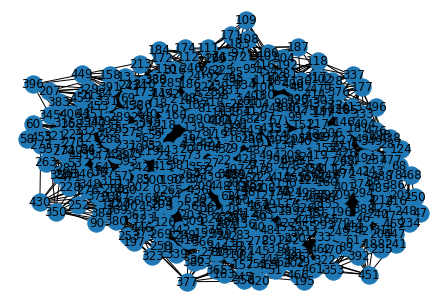

In [ ]:
G = nx.from_numpy_matrix(np.array(knnmatrix))
nx.draw(G, with_labels=True)

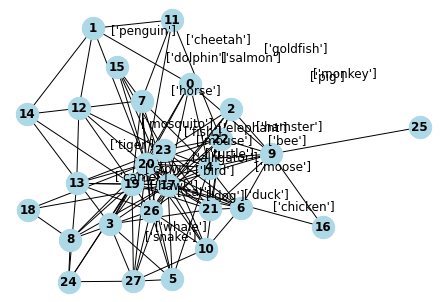

In [ ]:
# not working very well
animal_matrix = nx.subgraph(G, [*range(0, 28)])
nx.draw(animal_matrix, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500)
labels=nx.draw_networkx_labels(animal_matrix, labels = dict_animals, pos=nx.spring_layout(G))
# okay it prints the labels of the things not here not these nodes

In [ ]:
import csv
reader = csv.reader(open('animals.csv', 'r'))
dict_animals = {}
i = 0
for row in reader:
   dict_animals[i] = row
   i += 1

print(dict_animals)

{0: ['crow'], 1: ['horse'], 2: ['moose'], 3: ['snake'], 4: ['turtle'], 5: ['whale'], 6: ['hawk'], 7: ['duck'], 8: ['hamster'], 9: ['camel'], 10: ['cheetah'], 11: ['penguin'], 12: ['pig'], 13: ['monkey'], 14: ['dog'], 15: ['chicken'], 16: ['mosquito'], 17: ['alligator'], 18: ['bee'], 19: ['mouse'], 20: ['bird'], 21: ['tiger'], 22: ['dolphin'], 23: ['elephant'], 24: ['goldfish'], 25: ['salmon'], 26: ['fish'], 27: ['cat']}


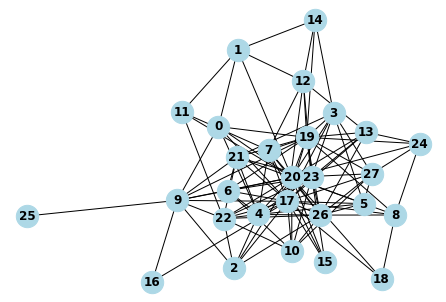

In [ ]:
# social events matrix
social_events = nx.subgraph(G, [*range(261, 291)])
nx.draw(animal_matrix, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500)

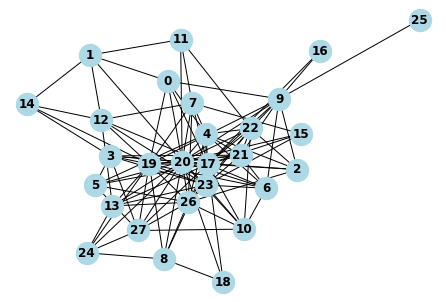

In [ ]:
# cognitive entities matrix
social_events = nx.subgraph(G, [*range(348, 359)])
nx.draw(animal_matrix, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500)

In [ ]:
import csv 

categories = []
with open('categories.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
print(categories)

counters = []
i = 0
count = "Animals"
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt

counters.append(i)  # for the last category

print(counters) # number of words / vertices per category
print(len(counters))  # number of categories

total = 0
for i in counters:
  total += i
print(total)

['Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Human Groups', 'Human Groups', 'Human Groups', 'Human Groups', 'Human Groups', 'Human Groups', 'Hu

In [ ]:
# counting a_c (modularity paper notation, changing l of languages for c of categories)
ac = []
for c in counters:  # for each category
  cjtotal = 0
  for i in range(c):  # how many words in that category
    for j in knnmatrix[i]:  # count degree of that word / node
      if (j == 1):
        cjtotal += 1
    cjtotal += 1  # do not count edge to self
  ac.append(cjtotal)

print(ac)

[308, 143, 451, 99, 308, 121, 77, 88, 286, 187, 198, 297, 209, 110, 319, 77, 99, 33, 418, 121, 220, 198, 110, 99, 121, 165, 99, 66, 44, 143, 286]


In [ ]:
# we need to divide by 2m according to the formula
m = 0 
for i in range(500):
  for j in range(500):
    if (knnmatrix[i, j] == 1):
      m += 1

m = m/2  # the above is double-counting
print(m)

# now the true ac
for i in range(len(ac)):
  ac[i] = ac[i]/(2*m)

print(ac)

2500.0
[0.0616, 0.0286, 0.0902, 0.0198, 0.0616, 0.0242, 0.0154, 0.0176, 0.0572, 0.0374, 0.0396, 0.0594, 0.0418, 0.022, 0.0638, 0.0154, 0.0198, 0.0066, 0.0836, 0.0242, 0.044, 0.0396, 0.022, 0.0198, 0.0242, 0.033, 0.0198, 0.0132, 0.0088, 0.0286, 0.0572]


In [ ]:
# now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
ecc = []
t = 0
for c in counters:
  ecctotal = 0
  for i in range(t, t+c):
    for j in range(t, t+c):
      if (knnmatrix[i, j] == 1):
        ecctotal += 1
  ecc.append(ecctotal)
  t += c

print(ecc)

# actually divided by 2m
for i in range(len(ecc)):
  ecc[i] = ecc[i]/(2*m)

print(ecc)

[152, 44, 198, 9, 155, 22, 13, 9, 88, 33, 34, 34, 34, 12, 42, 9, 15, 3, 51, 15, 35, 25, 13, 11, 13, 17, 10, 6, 4, 17, 81]
[0.0304, 0.0088, 0.0396, 0.0018, 0.031, 0.0044, 0.0026, 0.0018, 0.0176, 0.0066, 0.0068, 0.0068, 0.0068, 0.0024, 0.0084, 0.0018, 0.003, 0.0006, 0.0102, 0.003, 0.007, 0.005, 0.0026, 0.0022, 0.0026, 0.0034, 0.002, 0.0012, 0.0008, 0.0034, 0.0162]


In [ ]:
# Given C total categories, we calculate the overall modularity Q
Q = 0
for i in range(len(counters)):
  Q += ecc[i] - ac[i]*ac[i]

print(Q)

0.18762776


In [ ]:
# Finally, we normalize
Qmax = 0
for i in range(len(counters)):
  Qmax += ac[i]*ac[i]

Qmax = 1 - Qmax
Qnorm = Q/Qmax

print(Qnorm)

0.19816461655074413


In [ ]:
#print(counters)  # total: 500
tot = 0
for i in counters:
  tot += i
print(tot)

total = 0
for c in counters:
  print("{", end=" ")
  print(*range(total, total + c), sep=", ", end=" ")
  print("}", end=",")
  total += c

500
{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27 },{ 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 },{ 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81 },{ 82, 83, 84, 85, 86, 87, 88, 89, 90 },{ 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118 },{ 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129 },{ 130, 131, 132, 133, 134, 135, 136 },{ 137, 138, 139, 140, 141, 142, 143, 144 },{ 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170 },{ 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187 },{ 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205 },{ 206, 207, 208, 209, 210, 211, 212, 213, 2

In [ ]:
# doing it directly with the library networkx

G = nx.from_numpy_matrix(np.array(knnmatrix))
nx.algorithms.community.modularity(G, [{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27 },{ 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 },{ 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81 },{ 82, 83, 84, 85, 86, 87, 88, 89, 90 },{ 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118 },{ 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129 },{ 130, 131, 132, 133, 134, 135, 136 },{ 137, 138, 139, 140, 141, 142, 143, 144 },{ 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170 },{ 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187 },{ 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205 },{ 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232 },{ 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251 },{ 252, 253, 254, 255, 256, 257, 258, 259, 260, 261 },{ 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290 },{ 291, 292, 293, 294, 295, 296, 297 },{ 298, 299, 300, 301, 302, 303, 304, 305, 306 },{ 307, 308, 309 },{ 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347 },{ 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358 },{ 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378 },{ 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396 },{ 397, 398, 399, 400, 401, 402, 403, 404, 405, 406 },{ 407, 408, 409, 410, 411, 412, 413, 414, 415 },{ 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426 },{ 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441 },{ 442, 443, 444, 445, 446, 447, 448, 449, 450 },{ 451, 452, 453, 454, 455, 456 },{ 457, 458, 459, 460 },{ 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473 },{ 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499 },
])

0.1607269108971487

In [ ]:
# SUMMARY OF MODULARITY CODE; RUN HERE FOR EVERY LANGUAGE CSV
import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv 
from sklearn.neighbors import kneighbors_graph

categories = []
with open('categories_d.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Animals"  # change for b, c, d columns
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category
print('# of words per category:', counters) # number of words / vertices per category
print(len(counters))

file = open("arabic.csv")  # each language, upload without the category words
M = np.loadtxt(file, delimiter=";")
k = 10  # value of k
knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
knnmatrix = knn.toarray()

# counting a_c (modularity paper notation, changing l of languages for c of categories)
ac = []
for c in counters:  # for each category
  cjtotal = 0
  for i in range(c):  # how many words in that category
    for j in knnmatrix[i]:  # count degree of that word / node
      if (j == 1):
        cjtotal += 1
    cjtotal += 1  # old
  ac.append(cjtotal)

# we need to divide by 2m according to the formula
m = 0 
for i in range(len(knnmatrix[0])):
  for j in range(len(knnmatrix[0])):
    if (knnmatrix[i, j] == 1):
      m += 1
m = m/2  # the above was double-counting
# print(m)

# now the true ac
for i in range(len(ac)):
  ac[i] = ac[i]/(2*m)

# now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
ecc = []
t = 0
for c in counters:
  ecctotal = 0
  for i in range(t, t+c):
    for j in range(t, t+c):
      if (knnmatrix[i, j] == 1):
        ecctotal += 1
  ecc.append(ecctotal)
  t += c

# actually divided by 2m
for i in range(len(ecc)):
  ecc[i] = ecc[i]/(2*m)

# Given C total categories, we calculate the overall modularity Q
Q = 0
for i in range(len(counters)):
  Q += ecc[i] - ac[i]*ac[i]
print('modularity not normalized:', Q)

# finally, we normalize
Qmax = 0
for i in range(len(counters)):
  Qmax += ac[i]*ac[i]
Qmax = 1 - Qmax
Qnorm = Q/Qmax

print('final modularity:', Qnorm)
# for how to plot graphs, see some examples above

categories: ['Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Animals', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Body Parts', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Humans', 'Human Groups', 'Human Groups', 'Human Groups', 'Human Groups', 'Human Groups', 'Human 

In [ ]:
total = 0
for c in counters:
  print("{", end=" ")
  print(*range(total, total + c), sep=", ", end=" ")
  print("}", end=",")
  total += c

{  },{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27 },{ 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 },{ 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81 },{ 82, 83, 84, 85, 86, 87, 88, 89, 90 },{ 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118 },{ 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129 },{ 130, 131, 132, 133, 134, 135, 136 },{ 137, 138, 139, 140, 141, 142, 143, 144 },{ 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170 },{ 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187 },{ 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205 },{ 206, 207, 208, 209, 210, 211, 212, 213, 

In [ ]:
# doing it directly with the library networkx

G = nx.from_numpy_matrix(np.array(knnmatrix))
nx.algorithms.community.modularity(G, [{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118 },{ 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136 },{ 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261 },{ 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290 },{ 291, 292, 293, 294, 295, 296, 297 },{ 298, 299, 300, 301, 302, 303, 304, 305, 306 },{ 307, 308, 309 },{ 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347 },{ 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358 },{ 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378 },{ 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396 },{ 397, 398, 399, 400, 401, 402, 403, 404, 405, 406 },{ 407, 408, 409, 410, 411, 412, 413, 414, 415 },{ 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426 },{ 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441 },{ 442, 443, 444, 445, 446, 447, 448, 449, 450 },{ 451, 452, 453, 454, 455, 456 },{ 457, 458, 459, 460 },{ 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473 },{ 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499 }
])

0.05095961128933069

In [ ]:
# CODE FOR THE DIFFERENT K VALUES; nx package
import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv 
from sklearn.neighbors import kneighbors_graph

categories = []
with open('categories_d.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Concrete Objects"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

file = open("spanish.csv")  # each language, upload without the category words
M = np.loadtxt(file, delimiter=";")

list = [1, 2, 3, 5, 10, 50, 100, 150]
for k in list:
  #print('k:', k)
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()
  G = nx.from_numpy_matrix(np.array(knnmatrix))
  print(nx.algorithms.community.modularity(G, [{ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27 },{ 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 },{ 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81 },{ 82, 83, 84, 85, 86, 87, 88, 89, 90 },{ 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118 },{ 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129 },{ 130, 131, 132, 133, 134, 135, 136 },{ 137, 138, 139, 140, 141, 142, 143, 144 },{ 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170 },{ 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187 },{ 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205 },{ 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232 },{ 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251 },{ 252, 253, 254, 255, 256, 257, 258, 259, 260, 261 },{ 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290 },{ 291, 292, 293, 294, 295, 296, 297 },{ 298, 299, 300, 301, 302, 303, 304, 305, 306 },{ 307, 308, 309 },{ 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347 },{ 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358 },{ 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378 },{ 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396 },{ 397, 398, 399, 400, 401, 402, 403, 404, 405, 406 },{ 407, 408, 409, 410, 411, 412, 413, 414, 415 },{ 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426 },{ 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441 },{ 442, 443, 444, 445, 446, 447, 448, 449, 450 },{ 451, 452, 453, 454, 455, 456 },{ 457, 458, 459, 460 },{ 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473 },{ 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499 }
  ]))

0.949888
0.7612562070864339
0.6556381650013502
0.5424688813291881
0.41924289843708673
0.16373699627267807
0.09372186157716124
0.06151217639599639


In [ ]:
# Karina this is the snippet
# CODE FOR THE DIFFERENT K VALUES; our formula
import community
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv 
from sklearn.neighbors import kneighbors_graph

categories = []
with open('categories_c.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Living Things"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

file = open("bulgarian.csv")  # each language, upload without the category words
M = np.loadtxt(file, delimiter=";")

list = [1, 2, 3, 4, 5, 10, 50, 100, 150]
for k in list:
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1
  #m += len(knnmatrix[0])
  # print(m)

  # now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]

  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  print(Qnorm)
  #print()
  # for how to plot graphs, see some examples above

0.9953513453206643
0.7524591383253688
0.6490265717101472
0.58510756986928
0.5490804961044276
0.43518845646070037
0.2122854645865487
0.13472266126183083
0.09619306172793594


In [29]:
# RUNNING THIS, 2/1/21, FINAL
# MODIFIED 7/1 TO DO CATEGORICAL MODULARITY
# FIXED K
# do all categories at once
import community
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv 
from sklearn.neighbors import kneighbors_graph

file = open("vietnamese.csv")  # each language, upload without the category words; LANGUAGE
M = np.loadtxt(file, delimiter=";")

# CATEGORIES D
categories = []
with open('categories_d.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Animals"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [1, 2, 3, 4, 5, 10, 50, 100, 150]
for k in list:
  categories_modularity = []
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
    categories_modularity.append(ecc[i] - ac[i]*ac[i])  # currently not normalized
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  #print(Qnorm)
  print(categories_modularity)  # the whole array, UNNORMALIZED
  for i in range(len(counters)):
    categories_modularity[i] = categories_modularity[i]/Qmax
  # if we want it normalized, divide every element in the array by Qnorm
  print(categories_modularity) # NORMALIZED

# CATEGORIES C
print()
categories = []
with open('categories_c.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])     

# get csv of the category names
counters = []
i = 0
count = "Living Things"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [1, 2, 3, 4, 5, 10, 50, 100, 150]
for k in list:
  categories_modularity = []
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
    categories_modularity.append(ecc[i] - ac[i]*ac[i]) 
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  #print(Qnorm)
  print(categories_modularity)  # the whole array, UNNORMALIZED
  for i in range(len(counters)):
    categories_modularity[i] = categories_modularity[i]/Qmax
  # if we want it normalized, divide every element in the array by Qnorm
  print(categories_modularity) # NORMALIZED

# CATEGORIES B
print()
categories = []
with open('categories_b.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Concrete Objects"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [1, 2, 3, 4, 5, 10, 50, 100, 150]
for k in list:
  categories_modularity = []
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
    categories_modularity.append(ecc[i] - ac[i]*ac[i]) 
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  #print(Qnorm)
  print(categories_modularity)  # the whole array, UNNORMALIZED
  for i in range(len(counters)):
    categories_modularity[i] = categories_modularity[i]/Qmax
  # if we want it normalized, divide every element in the array by Qnorm
  print(categories_modularity) # NORMALIZED

[0.052864, 0.025324, 0.07527600000000001, 0.017675999999999997, 0.052864, 0.021516, 0.013804, 0.015744, 0.049296, 0.032844000000000005, 0.034704, 0.051084, 0.036556, 0.0196, 0.054636000000000004, 0.013804, 0.017675999999999997, 0.0059640000000000006, 0.06822399999999999, 0.021516, 0.038400000000000004, 0.034704, 0.0196, 0.017675999999999997, 0.021516, 0.029099999999999997, 0.017675999999999997, 0.011856, 0.007936, 0.023324, 0.047296000000000005]
[0.05529383216045922, 0.026487988151321678, 0.07873597362497595, 0.018488456743119646, 0.05529383216045922, 0.022504957868576737, 0.014438484774950421, 0.016467654614374053, 0.051561833198055344, 0.034353636188675145, 0.03629912892131842, 0.0534320165345963, 0.03823625394328366, 0.02050089116118721, 0.05714728007564411, 0.014438484774950421, 0.018488456743119646, 0.0062381283104755375, 0.07135983666228755, 0.022504957868576737, 0.040165011254570865, 0.03629912892131842, 0.02050089116118721, 0.018488456743119646, 0.022504957868576737, 0.03043754

In [2]:
# RUNNING THIS, 2/1/21, FINAL
# PERCENTAGES
# do all categories at once
import community
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv 
from sklearn.neighbors import kneighbors_graph

file = open("arabic.csv")  # each language, upload without the category words; LANGUAGE
M = np.loadtxt(file, delimiter=";")

size = 325033

# CATEGORIES D
categories = []
with open('categories_d.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Animals"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05]
for elt in list:
  k = math.ceil(elt*size/100)
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  print(Qnorm)

# CATEGORIES C
print()
categories = []
with open('categories_c.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])     

# get csv of the category names
counters = []
i = 0
count = "Living Things"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05]
for elt in list:
  k = math.ceil(elt*size/100)
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  print(Qnorm)

# CATEGORIES B
print()
categories = []
with open('categories_b.csv') as csvfile:    
	csvReader = csv.reader(csvfile)    
	for row in csvReader:        
		categories.append(row[0])        
#print('categories:', categories)

# get csv of the category names
counters = []
i = 0
count = "Concrete Objects"  # first elt in categories file
for elt in categories:
  if elt == count:
    i += 1
  else:
    counters.append(i)
    i = 1
    count = elt
counters.append(i)  # for the last category

list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.05]
for elt in list:
  k = math.ceil(elt*size/100)
  knn = kneighbors_graph(M, k, mode='connectivity', include_self=True) 
  knnmatrix = knn.toarray()

  # counting a_c (modularity paper notation, changing l of languages for c of categories)
  ac = []
  t = 0
  for c in counters:  # for each category
    cjtotal = 0
    for i in range(t, t+c):  # how many words in that category
      for j in knnmatrix[i]:  # count degree of that word / node
        if (j == 1):
          cjtotal += 1
      #cjtotal -= 1  # when we subtract the results are really weird
    ac.append(cjtotal)
    t += c

  # we need to divide by 2m according to the formula
  m = 0 
  for i in range(len(knnmatrix[0])):
    for j in range(len(knnmatrix[0])):
      if ((knnmatrix[i, j] == 1)):
        m += 1

# now the true ac
  for i in range(len(ac)):
    ac[i] = ac[i]/(m)

  # now we compute ell (modularity paper), called ecc here (fraction of edges within the same category)
  ecc = []
  t = 0
  for c in counters:
    ecctotal = 0
    for i in range(t, t+c):
      for j in range(t, t+c):
        if (knnmatrix[i, j] == 1):
          ecctotal += 1
      #ecctotal -= 1   # when we subtract the results are really weird
    ecc.append(ecctotal)
    t += c

  # actually divided by 2m
  for i in range(len(ecc)):
    ecc[i] = ecc[i]/(m)

  # Given C total categories, we calculate the overall modularity Q
  Q = 0
  for i in range(len(counters)):
    Q += ecc[i] - ac[i]*ac[i]
  
  # finally, we normalize
  Qmax = 0
  for i in range(len(counters)):
    Qmax += ac[i]*ac[i]
  Qmax = 1 - Qmax
  Qnorm = Q/Qmax
  #print(Q)

  print(Qnorm)

0.5230404913519712
0.41934064830631557
0.3648907595370981
0.3184798499549936
0.2887445923669744
0.19803100160736117
0.12189751278674939
0.056052932392337204

0.5328102047267522


KeyboardInterrupt: ignored

In [ ]:
hi = 0
for i in range(500):
  if (knnmatrix[i, i] == 1):
    hi += 1
print(hi)

500


In [ ]:
A = knnmatrix.transpose()
print(A == knnmatrix)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
# 1 trial
# fasttext column d
from scipy import stats
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318,
0.746876752, 0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945,
0.7541984988, 0.7751177755, 0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049,
0.7688419925, 0.8012668714, 0.6035797066]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331,
0.6659888821, 0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175,
0.7008543433, 0.4449418584]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384,
0.60724058, 0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524,
0.6428033504, 0.3588241693]
svmaccd = [0.4848484848, 0.5555555556, 0.6868686869, 0.5656565657, 0.6060606061, 0.5252525253, 0.6868686869, 0.696969697, 0.6060606061,
0.6363636364, 0.6666666667, 0.6262626263, 0.1919191919, 0.6464646465, 0.6161616162, 0.6262626263, 0.5252525253, 0.595959596,
0.6565656566, 0.6666666667, 0.4848484848, 0.7070707071, 0.5555555556, 0.6565656566, 0.7575757576, 0.5353535354, 0.6161616162,
0.7070707071, 0.3333333333]
svmprecd = [0.3703703704, 0.4315608466, 0.5596646185, 0.5070060208, 0.4676245211, 0.4187566138, 0.6034482759, 0.6203571429,
0.5054689755, 0.5615608466, 0.5786706349, 0.5413793103, 0.1842063492, 0.5003456221, 0.5203149002, 0.525921659, 0.386687148,
0.4698941799, 0.5558730159, 0.5708730159, 0.3678391053, 0.5978878648, 0.3953612479, 0.5863300493, 0.6082949309, 0.3923963134,
0.5448823207, 0.6119047619, 0.2868815708]
knnaccd = [0.2929292929, 0.3535353535, 0.3838383838, 0.2626262626, 0.2727272727, 0.3636363636, 0.5555555556, 0.5353535354,
0.4242424242, 0.303030303, 0.4242424242, 0.4747474747, 0.06060606061, 0.4848484848, 0.3535353535, 0.4242424242, 0.2828282828,
0.3434343434, 0.5252525253, 0.4242424242, 0.2525252525, 0.5656565657, 0.202020202, 0.3333333333, 0.5656565657, 0.4141414141,
0.3333333333, 0.5252525253, 0.2424242424]
knnprecd = [0.2035476623, 0.4331691297, 0.3462876073, 0.3235188106, 0.3486774241, 0.3805850083, 0.5431034483, 0.473015873,
0.4319537742, 0.348316913, 0.4820507079, 0.4416095524, 0.06396103896, 0.4213464696, 0.3061725631, 0.5714285714, 0.2192620526,
0.3703812728, 0.4790801378, 0.4752739909, 0.2608136721, 0.5030952381, 0.1717109921, 0.3508570095, 0.5288050016, 0.4521570384,
0.3676058222, 0.50591133, 0.2467261905]
print("FASTTEXT")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

FASTTEXT
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.7123998887975862, pvalue=1.4564335776247606e-05)
svm macro precision
SpearmanrResult(correlation=0.683179427275485, pvalue=4.4225657267150974e-05)
knn accuracy
SpearmanrResult(correlation=0.5507965379142802, pvalue=0.0019594192963514833)
knn macro precision
SpearmanrResult(correlation=0.5239680600244161, pvalue=0.0035299720940775345)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6817174332354425, pvalue=4.659993768270303e-05)
svm macro precision
SpearmanrResult(correlation=0.6614096416900338, pvalue=9.35886502050298e-05)
knn accuracy
SpearmanrResult(correlation=0.6089858995613044, pvalue=0.0004550498831395837)
knn macro precision
SpearmanrResult(correlation=0.5263677327309657, pvalue=0.003355388610776858)
k = 4
svm accuracy
SpearmanrResult(correlation=0.637586454763603, pvalue=0.0001990509934709099)
svm macro precision
SpearmanrResult(correlation=0.6260785542131282, pvalue=0.0002803402378803656)
knn accuracy
Spearman

In [ ]:
# 30 trials
# fasttext column d
from scipy import stats
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318,
0.746876752, 0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945,
0.7541984988, 0.7751177755, 0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049,
0.7688419925, 0.8012668714, 0.6035797066]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331,
0.6659888821, 0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175,
0.7008543433, 0.4449418584]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384,
0.60724058, 0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524,
0.6428033504, 0.3588241693]
svmaccd = [0.5157643098, 0.590969697, 0.6291010101, 0.5291212121, 0.5973164983, 0.5461313131, 0.6431043771, 0.6672424242, 0.5789124579,
0.6260808081, 0.6485050505, 0.6107306397, 0.1818619529, 0.6317508418, 0.6258013468, 0.609020202, 0.5251313131, 0.5766329966,
0.6421582492, 0.615026936, 0.5091043771, 0.6665589226, 0.509020202, 0.5735892256, 0.6668956229, 0.5555353535, 0.5966464646,
0.6478316498, 0.3611784512]
svmprecd = [0.4102556406, 0.4667136909, 0.5446862207, 0.4291789973, 0.4996698388, 0.4405435036, 0.5493448149, 0.5662858518,
0.4758947154, 0.5064977119, 0.5487233569, 0.5242397881, 0.1497843112, 0.4962646326, 0.5227193425, 0.4973395611, 0.4272808454,
0.4628620906, 0.5411724042, 0.5217481426, 0.4136969768, 0.5701962427, 0.3988559828, 0.4897167993, 0.5781504414, 0.4519258581,
0.4956309342, 0.551043068, 0.3077475294]
knnaccd = [0.2933973064, 0.287026936, 0.3921818182, 0.298047138, 0.3131144781, 0.3861717172, 0.483979798, 0.535040404, 0.3581784512,
0.3495117845, 0.3704915825, 0.4459124579, 0.1114983165, 0.4876632997, 0.3594983165, 0.3738282828, 0.257973064, 0.2894309764,
0.4532323232, 0.3858720539, 0.2396531987, 0.513020202, 0.239986532, 0.2606868687, 0.490993266, 0.4396060606, 0.3347912458,
0.4586464646, 0.2382895623]
knnprecd = [0.23425166, 0.3357620147, 0.3865767002, 0.298621484, 0.356636744, 0.3725872415, 0.4455617603, 0.4722875259, 0.3550286873,
0.4060703119, 0.4115333121, 0.400303623, 0.1085219671, 0.4289063698, 0.3337637745, 0.4253443011, 0.2963472673, 0.3661890268,
0.456831716, 0.4182849598, 0.2600582535, 0.4702906378, 0.2223428806, 0.2777195035, 0.4633726798, 0.4077622391, 0.3263348868,
0.4658229502, 0.1905098606]
print("FASTTEXT")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

FASTTEXT
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.7263094416236848, pvalue=8.178254701207774e-06)
svm macro precision
SpearmanrResult(correlation=0.6839187989500255, pvalue=4.306654722716325e-05)
knn accuracy
SpearmanrResult(correlation=0.5673445315974627, pvalue=0.0013292103498585394)
knn macro precision
SpearmanrResult(correlation=0.648921873021772, pvalue=0.0001401200354926539)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7156235467465939, pvalue=1.2779099589395674e-05)
svm macro precision
SpearmanrResult(correlation=0.6545096901373807, pvalue=0.00011723244812813027)
knn accuracy
SpearmanrResult(correlation=0.6192706518506166, pvalue=0.00034114291823918657)
knn macro precision
SpearmanrResult(correlation=0.6619024953723661, pvalue=9.207485528252182e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6763620286459937, pvalue=5.629937549534957e-05)
svm macro precision
SpearmanrResult(correlation=0.6268180170724351, pvalue=0.0002743504556209041)
knn accuracy
Spea

In [ ]:
# 1 trial
# fasttext column c
from scipy import stats
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793,
0.7931348668, 0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574,
0.8094051581, 0.5874318972]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928,
0.6784680513, 0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607,
0.7086843068, 0.4320893533]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712,
0.6525130627, 0.3491883449]
svmaccc = [0.84, 0.85, 0.9, 0.87, 0.87, 0.95, 0.88, 0.94, 0.9, 0.94, 0.84, 0.9, 0.79, 0.9, 0.91, 0.9, 0.87, 0.92, 0.97, 0.91, 0.85,
0.91, 0.83, 0.85, 0.92, 0.9, 0.9, 0.96, 0.75]
svmprecc = [0.7588908981, 0.775, 0.8576998051, 0.834717608, 0.834717608, 0.93125, 0.8341601701, 0.9095840868, 0.8862745098,
0.9404677534, 0.7588908981, 0.8576998051, 0.6647727273, 0.8493068113, 0.86875, 0.8695960312, 0.8024475524, 0.890188434, 0.9817073171,
0.8552631579, 0.7733100233, 0.8607226107, 0.7445799458, 0.7784552846, 0.9050318923, 0.8576998051, 0.8576998051, 0.955165692, 0.61875]
knnaccc = [0.8181818182, 0.8181818182, 0.8181818182, 0.8080808081, 0.8282828283, 0.8686868687, 0.8787878788, 0.9191919192, 0.8282828283,
0.8383838384, 0.797979798, 0.8282828283, 0.8080808081, 0.8686868687, 0.8181818182, 0.8686868687, 0.8080808081, 0.8181818182, 0.8787878788,
0.8181818182, 0.8080808081, 0.8585858586, 0.8282828283, 0.8080808081, 0.8282828283, 0.8686868687, 0.8181818182, 0.8585858586, 0.797979798]
knnprecc = [0.9072164948, 0.9072164948, 0.9072164948, 0.9030612245, 0.9114583333, 0.9293478261, 0.9340659341, 0.9540229885, 0.9114583333,
0.8360215054, 0.6520618557, 0.9114583333, 0.7395833333, 0.9293478261, 0.9072164948, 0.9293478261, 0.9030612245, 0.9072164948,
0.9340659341, 0.9072164948, 0.9030612245, 0.9247311828, 0.9114583333, 0.9030612245, 0.9114583333, 0.9293478261, 0.9072164948,
0.8325842697, 0.6552631579]
print("FASTTEXT")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

FASTTEXT
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.5974058227373987, pvalue=0.0006221611243996605)
svm macro precision
SpearmanrResult(correlation=0.5994567641773882, pvalue=0.00058914220222574)
knn accuracy
SpearmanrResult(correlation=0.34144130914917753, pvalue=0.06986947036541281)
knn macro precision
SpearmanrResult(correlation=0.13589539062217354, pvalue=0.4821182849301854)
k = 3
svm accuracy
SpearmanrResult(correlation=0.5707716185930305, pvalue=0.0012234488734775481)
svm macro precision
SpearmanrResult(correlation=0.5530182512428048, pvalue=0.0018620911348110284)
knn accuracy
SpearmanrResult(correlation=0.4759257032221089, pvalue=0.009064269016230015)
knn macro precision
SpearmanrResult(correlation=0.29305739381782925, pvalue=0.12286914344846386)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6036755490813592, pvalue=0.0005260167156714261)
svm macro precision
SpearmanrResult(correlation=0.5779152236637163, pvalue=0.0010262702562022343)
knn accuracy
SpearmanrResu

In [ ]:
# 30 trials
# fasttext column c
from scipy import stats
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793,
0.7931348668, 0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574,
0.8094051581, 0.5874318972]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928,
0.6784680513, 0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607,
0.7086843068, 0.4320893533]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712,
0.6525130627, 0.3491883449]
svmaccc = [0.8763400673, 0.8826801347, 0.9198047138, 0.8780572391, 0.9091077441, 0.872979798, 0.9304747475, 0.9364949495, 0.9070808081,
0.9000942761, 0.9091077441, 0.9001111111, 0.7443232323, 0.9137676768, 0.9137912458, 0.9034074074, 0.8773468013, 0.9047710438,
0.9234848485, 0.9017609428, 0.8783737374, 0.9257946128, 0.8646430976, 0.8753501684, 0.9378552189, 0.8923905724, 0.8863771044,
0.9221380471, 0.8045521886]
svmprecc = [0.806782194, 0.8114913366, 0.8819106968, 0.8061546368, 0.8572243655, 0.7964645835, 0.8890861172, 0.9037432513,
0.8559372566, 0.8423619914, 0.8566965026, 0.8437733434, 0.5740093462, 0.8612944814, 0.8679272473, 0.8533264654, 0.808455226,
0.8531786127, 0.8861563599, 0.8448151212, 0.8043139448, 0.8869307513, 0.7829614458, 0.8003360301, 0.9045145727, 0.8272563165,
0.8225562593, 0.8822261985, 0.6718035062]
knnaccc = [0.8384175084, 0.8364141414, 0.8504478114, 0.8420909091, 0.8557744108, 0.8828215488, 0.8991818182, 0.9235488215,
0.8481144781, 0.8804747475, 0.8487474747, 0.8631178451, 0.794, 0.8765185185, 0.8344208754, 0.8758148148, 0.8340673401, 0.8450976431,
0.8784949495, 0.8644579125, 0.8374141414, 0.9081885522, 0.8334208754, 0.8414175084, 0.8865050505, 0.8808249158, 0.8410808081,
0.8814680135, 0.8270538721]
knnprecc = [0.7651043708, 0.883523059, 0.8663325776, 0.8820157839, 0.9086017478, 0.9026623176, 0.8988577401, 0.9074975911,
0.834875431, 0.9239242482, 0.8177726412, 0.9218865599, 0.5161496187, 0.8647087627, 0.8445747948, 0.895325123, 0.7992132377,
0.9039103918, 0.9315360928, 0.9002535181, 0.8672481129, 0.944340597, 0.8370097671, 0.8857017327, 0.9234992279, 0.8793693435,
0.8579679458, 0.8202045479, 0.708929329]
print("FASTTEXT")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

FASTTEXT
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.6131938864991257, pvalue=0.0004049368166270458)
svm macro precision
SpearmanrResult(correlation=0.6198992843414979, pvalue=0.00033507876882614196)
knn accuracy
SpearmanrResult(correlation=0.4559243344261852, pvalue=0.012930853154074894)
knn macro precision
SpearmanrResult(correlation=0.3129085886353862, pvalue=0.09838276098210466)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6365879453337535, pvalue=0.0002051659192922976)
svm macro precision
SpearmanrResult(correlation=0.6461237459871475, pvalue=0.000153005346415758)
knn accuracy
SpearmanrResult(correlation=0.5231112510433907, pvalue=0.0035941662778833138)
knn macro precision
SpearmanrResult(correlation=0.3256503122659374, pvalue=0.08472805917309854)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6212420099914602, pvalue=0.00032244325664394335)
svm macro precision
SpearmanrResult(correlation=0.6297893740483199, pvalue=0.0002514051160954805)
knn accuracy
SpearmanrR

In [ ]:
# 1 trial
# fasttext column b
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448,
0.8681134225, 0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892,
0.8786044002, 0.6223248007]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968,
0.7771916152, 0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004,
0.8011709929, 0.4644605639]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339,
0.7294826449, 0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227,
0.757958156, 0.3757868233]
svmaccb = [0.74, 0.68, 0.78, 0.67, 0.73, 0.71, 0.83, 0.82, 0.85, 0.74, 0.81, 0.81, 0.52, 0.83, 0.82, 0.78, 0.72, 0.69, 0.81, 0.73,
0.74, 0.85, 0.7, 0.76, 0.9, 0.73, 0.84, 0.87, 0.59]
svmprecb = [0.5101703534, 0.4190767974, 0.4876253133, 0.3176814585, 0.4737790301, 0.4521113481, 0.5634337068, 0.6595238095,
0.5308305486, 0.5710148769, 0.5327420424, 0.6641981181, 0.2231617647, 0.4664249685, 0.4975759535, 0.5254765843, 0.4693768038,
0.4461635587, 0.5699236425, 0.4368844697, 0.4897829666, 0.5962797619, 0.4896214467, 0.7016369048, 0.6477011494, 0.3824404762,
0.5818976222, 0.5806051587, 0.3748214286]
knnaccb = [0.53, 0.61, 0.79, 0.73, 0.58, 0.69, 0.73, 0.76, 0.75, 0.7, 0.55, 0.68, 0.46, 0.73, 0.7, 0.85, 0.64, 0.51, 0.69, 0.76, 0.47,
0.75, 0.69, 0.75, 0.82, 0.75, 0.53, 0.73, 0.55]
knnprecb = [0.345949793, 0.3362643678, 0.4759029928, 0.4204906205, 0.3696256039, 0.3583333333, 0.4039726721, 0.3592101648,
0.4251248613, 0.462359944, 0.4101686508, 0.4312298224, 0.1683941059, 0.4071526151, 0.3907634033, 0.699025974, 0.3906504065,
0.4779929577, 0.3662004662, 0.5078242836, 0.3195684524, 0.4268802411, 0.3530961792, 0.5194128788, 0.5146126761, 0.4420405983,
0.3303951679, 0.4701388889, 0.2574142157]
print("FASTTEXT")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

FASTTEXT
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.5609191273725684, pvalue=0.001549059661653103)
svm macro precision
SpearmanrResult(correlation=0.5162006019684, pvalue=0.004149512667676879)
knn accuracy
SpearmanrResult(correlation=0.3496122520090714, pvalue=0.0630185446335814)
knn macro precision
SpearmanrResult(correlation=0.51718618784328, pvalue=0.004066085580070532)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6064464984468856, pvalue=0.0004878603660551026)
svm macro precision
SpearmanrResult(correlation=0.5664285502290428, pvalue=0.0013587893957638343)
knn accuracy
SpearmanrResult(correlation=0.32092624348075544, pvalue=0.08961080232076718)
knn macro precision
SpearmanrResult(correlation=0.4219868050444392, pvalue=0.022596402110724688)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6146639638169471, pvalue=0.000388611638561279)
svm macro precision
SpearmanrResult(correlation=0.5503818841580981, pvalue=0.0019780633943319256)
knn accuracy
SpearmanrResult(corr

In [ ]:
# 30 trials
# fasttext column b
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448,
0.8681134225, 0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892,
0.8786044002, 0.6223248007]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968,
0.7771916152, 0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004,
0.8011709929, 0.4644605639]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339,
0.7294826449, 0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227,
0.757958156, 0.3757868233]
svmaccb = [0.7673703704, 0.7463299663, 0.8385420875, 0.767037037, 0.7904141414, 0.7205589226, 0.857959596, 0.8713468013,
0.7850942761, 0.7934612795, 0.8285420875, 0.8052188552, 0.48996633, 0.8131481481, 0.7941178451, 0.8037676768, 0.751996633,
0.752020202, 0.8382424242, 0.8248956229, 0.7426599327, 0.864969697, 0.7179259259, 0.7944276094, 0.8863670034, 0.7359393939,
0.8308619529, 0.8342188552, 0.616956229]
svmprecb = [0.5464727939, 0.5377880621, 0.6534597223, 0.5780594388, 0.5907848568, 0.5226709456, 0.6457177645, 0.7119076314,
0.5749471763, 0.6495865697, 0.6494690692, 0.6160726757, 0.2520649922, 0.5990372326, 0.5808536863, 0.6490800984, 0.5940517202,
0.558948451, 0.6745174116, 0.6733482418, 0.5858530787, 0.681696211, 0.5104926695, 0.6460162671, 0.6971797383, 0.5612774072,
0.6420604534, 0.6527046011, 0.3899390852]
knnaccb = [0.6007542088, 0.584037037, 0.6809090909, 0.7127205387, 0.5151750842, 0.6608653199, 0.7554208754, 0.7437508418, 0.727020202,
0.5456767677, 0.6759124579, 0.7600942761, 0.4219326599, 0.7701043771, 0.6672390572, 0.723989899, 0.6775791246, 0.4911818182,
0.7022929293, 0.7270572391, 0.5797542088, 0.7697845118, 0.5841077441, 0.7350740741, 0.7965218855, 0.7086228956, 0.6214242424,
0.7574377104, 0.5448787879]
knnprecb = [0.3534057654, 0.4201590984, 0.5406987756, 0.5370139718, 0.4430235235, 0.4903592843, 0.5352592629, 0.5362499836,
0.5140766432, 0.610880833, 0.5161014343, 0.5621373643, 0.2687718435, 0.5353436442, 0.4674670223, 0.5892552032, 0.5141659303,
0.4621269326, 0.606252968, 0.5965160069, 0.4120074577, 0.5883474407, 0.369590483, 0.5691505124, 0.619712458, 0.5413223394,
0.4628067912, 0.6329928283, 0.3204214083]
print("FASTTEXT")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

FASTTEXT
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.6265862199549599, pvalue=0.00027621578131133167)
svm macro precision
SpearmanrResult(correlation=0.6334853210791199, pvalue=0.00022524049843636006)
knn accuracy
SpearmanrResult(correlation=0.46396455059976, pvalue=0.0112375071315842)
knn macro precision
SpearmanrResult(correlation=0.6140200000502399, pvalue=0.00039569013102082047)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6292828932701247, pvalue=0.00025519207348847204)
svm macro precision
SpearmanrResult(correlation=0.5979789655594682, pvalue=0.0006127744914626219)
knn accuracy
SpearmanrResult(correlation=0.48607358618436575, pvalue=0.007508774335983609)
knn macro precision
SpearmanrResult(correlation=0.555829582578978, pvalue=0.0017449517481249277)
k = 4
svm accuracy
SpearmanrResult(correlation=0.5789603526282591, pvalue=0.0009998830357383828)
svm macro precision
SpearmanrResult(correlation=0.5380635787830288, pvalue=0.002606528079306777)
knn accuracy
Spearmanr

In [ ]:
# 1 trial
# muse column d
from scipy import stats
mod2d = [0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838,
0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605,
0.740600969, 0.740600969, 0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413,
0.7458307882, 0.6726133197]
mod3d = [0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394,
0.6269395656, 0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316,
0.6353072763, 0.643674987, 0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962,
0.6590157899, 0.5355920574]
mod4d = [0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203,
0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001,
0.5784765746, 0.575861665, 0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448,
0.5993958513, 0.4592366974]
svmaccd = [0.47, 0.5, 0.57, 0.47, 0.61, 0.45, 0.58, 0.65, 0.42, 0.56, 0.61, 0.52, 0.25, 0.51, 0.62, 0.59, 0.42, 0.57, 0.5, 0.62, 0.46,
0.47, 0.39, 0.45, 0.63, 0.52, 0.52, 0.43, 0.49]
svmprecd = [0.3824600687, 0.4173623995, 0.574137931, 0.3640059647, 0.440138597, 0.4229064039, 0.5374832064, 0.5524630542,
0.3400088417, 0.5321428571, 0.5448554422, 0.4771441202, 0.2788919414, 0.4318007663, 0.558106576, 0.5306986117, 0.4111166611,
0.5801870748, 0.4551450465, 0.5027910053, 0.3240968801, 0.4850122558, 0.3175287356, 0.4845155993, 0.6277367269, 0.3714760617,
0.4754789272, 0.3678633627, 0.4845427561]
knnaccd = [0.13, 0.19, 0.24, 0.15, 0.17, 0.12, 0.21, 0.27, 0.17, 0.22, 0.26, 0.13, 0.1, 0.21, 0.25, 0.25, 0.25, 0.13, 0.17, 0.3, 0.2,
0.21, 0.09, 0.11, 0.28, 0.26, 0.13, 0.15, 0.32]
knnprecd = [0.2092343659, 0.2121899577, 0.3076130766, 0.1826750261, 0.3777777778, 0.1837581209, 0.3863804714, 0.3206410879,
0.1661180773, 0.2432014408, 0.4208294501, 0.24449494, 0.106391926, 0.2892474217, 0.3752052545, 0.349514853, 0.2893947959,
0.2141215107, 0.2490480766, 0.4346037508, 0.2674731183, 0.3753632618, 0.1314484127, 0.217515052, 0.4424568966, 0.4003557745,
0.2124137931, 0.2822222222, 0.3063801433]
print("MUSE")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

MUSE
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.6827107364400392, pvalue=4.497476989496838e-05)
svm macro precision
SpearmanrResult(correlation=0.66600965495016, pvalue=8.02824933709489e-05)
knn accuracy
SpearmanrResult(correlation=0.4087496770934879, pvalue=0.027697420959182102)
knn macro precision
SpearmanrResult(correlation=0.5817420626479199, pvalue=0.0009325133186609833)
k = 3
svm accuracy
SpearmanrResult(correlation=0.5920539560842958, pvalue=0.0007160762470083124)
svm macro precision
SpearmanrResult(correlation=0.5755112271232395, pvalue=0.0010892816461100737)
knn accuracy
SpearmanrResult(correlation=0.3537201106730426, pvalue=0.059778222250130575)
knn macro precision
SpearmanrResult(correlation=0.5553092063081259, pvalue=0.0017661396328848547)
k = 4
svm accuracy
SpearmanrResult(correlation=0.5497847911011395, pvalue=0.0020051799658610107)
svm macro precision
SpearmanrResult(correlation=0.5086833392445774, pvalue=0.004835353727543896)
knn accuracy
SpearmanrResult(

In [ ]:
# 30 trials
# muse column d
from scipy import stats
mod2d = [0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838,
0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605,
0.740600969, 0.740600969, 0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413,
0.7458307882, 0.6726133197]
mod3d = [0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394,
0.6269395656, 0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316,
0.6353072763, 0.643674987, 0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962,
0.6590157899, 0.5355920574]
mod4d = [0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203,
0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001,
0.5784765746, 0.575861665, 0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448,
0.5993958513, 0.4592366974]
svmaccd = [0.4828181818, 0.5272424242, 0.6167407407, 0.4851885522, 0.5028821549, 0.5526228956, 0.6300808081, 0.6791515152,
0.4998585859, 0.5161986532, 0.6290774411, 0.5202390572, 0.2176902357, 0.5662962963, 0.6351043771, 0.5826700337, 0.5058518519,
0.538962963, 0.5025454545, 0.6023434343, 0.4534309764, 0.5208922559, 0.4484276094, 0.4731717172, 0.6561279461, 0.4911784512,
0.5662996633, 0.4848215488, 0.5161717172]
svmprecd = [0.3967611835, 0.406490262, 0.5356452402, 0.4312518178, 0.4448020409, 0.4154506511, 0.5193483822, 0.5367970787,
0.4241632703, 0.4538746826, 0.4910612437, 0.4349008885, 0.2387549638, 0.4877843385, 0.515831218, 0.4784900631, 0.4320133245,
0.4402419238, 0.4290912667, 0.486993653, 0.3792931449, 0.4688426068, 0.3822483611, 0.4366582397, 0.5535475846, 0.4200121244,
0.4815876177, 0.4484124253, 0.4192702599]
knnaccd = [0.1546262626, 0.1900707071, 0.2571481481, 0.1492828283, 0.1552828283, 0.2007643098, 0.2915521886, 0.3292996633,
0.1225791246, 0.169986532, 0.3356531987, 0.1803569024, 0.0715016835, 0.2157474747, 0.2795084175, 0.2755791246, 0.1673400673,
0.1886868687, 0.1813737374, 0.2986127946, 0.1797070707, 0.2558080808, 0.1239158249, 0.152969697, 0.3633468013, 0.2681245791,
0.1926666667, 0.1937407407, 0.3777474747]
knnprecd = [0.2009108813, 0.2437624661, 0.3632240369, 0.2035602113, 0.2348875215, 0.23606711, 0.3699802642, 0.3928823609,
0.1891185709, 0.2329573786, 0.4277164574, 0.272150568, 0.08161530652, 0.3216508001, 0.3524674987, 0.3664093212, 0.2394594726,
0.2538432087, 0.228730375, 0.3857889795, 0.2543621919, 0.3557235716, 0.1549541625, 0.2480004068, 0.4302572235, 0.3565407265,
0.3002768872, 0.3021294402, 0.2895636235]
print("MUSE")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

MUSE
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.7625970706883999, pvalue=1.5200389170694754e-06)
svm macro precision
SpearmanrResult(correlation=0.81409393265088, pvalue=7.791124287747291e-08)
knn accuracy
SpearmanrResult(correlation=0.63496369989144, pvalue=0.00021546834466060736)
knn macro precision
SpearmanrResult(correlation=0.70025876410224, pvalue=2.3472969081541774e-05)
k = 3
svm accuracy
SpearmanrResult(correlation=0.72480908826908, pvalue=8.717863062566894e-06)
svm macro precision
SpearmanrResult(correlation=0.8046317070995292, pvalue=1.4341319270842858e-07)
knn accuracy
SpearmanrResult(correlation=0.6058142583459101, pvalue=0.0004963453927899269)
knn macro precision
SpearmanrResult(correlation=0.6871150738213677, pvalue=3.8361710429462174e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6668308955617777, pvalue=7.809279695126812e-05)
svm macro precision
SpearmanrResult(correlation=0.7813770228008713, pvalue=5.641130470940423e-07)
knn accuracy
SpearmanrResu

In [ ]:
# 1 trial
# muse column c
from scipy import stats
mod2c = [0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836,
0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926,
0.7489726473, 0.743161829, 0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811,
0.753621302, 0.6676211904]
mod3c = [0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295,
0.6281076257, 0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624,
0.644377917, 0.6482517959, 0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389,
0.6637473115, 0.5297111016]
mod4c = [0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253,
0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778,
0.5682561967, 0.5926616337, 0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326,
0.6048643523, 0.6013778612, 0.4549452388]
svmaccc = [0.96, 0.95, 0.96, 0.9, 0.92, 0.97, 0.97, 0.96, 0.92, 0.91, 0.96, 0.94, 0.85, 0.97, 0.98, 0.97, 0.94, 0.94, 0.92, 0.95,
0.94, 0.92, 0.94, 0.92, 0.99, 0.89, 0.94, 0.92, 0.9]
svmprecc = [0.9772727273, 0.9719101124, 0.9772727273, 0.8555555556, 0.8825757576, 0.9827586207, 0.9827586207, 0.9772727273,
0.9111111111, 0.8697650664, 0.9468438538, 0.9666666667, 0.7611683849, 0.9549019608, 0.988372093, 0.9351523742, 0.9053156146,
0.9299242424, 0.9565217391, 0.9156862745, 0.9299242424, 0.9565217391, 0.9666666667, 0.9111111111, 0.9941176471, 0.8748079877,
0.9666666667, 0.9565217391, 0.8352272727]
knnaccc = [0.8, 0.81, 0.79, 0.81, 0.81, 0.8, 0.83, 0.86, 0.81, 0.83, 0.86, 0.81, 0.79, 0.85, 0.81, 0.85, 0.8, 0.67, 0.82, 0.85, 0.81,
0.84, 0.81, 0.81, 0.86, 0.81, 0.8, 0.82, 0.82]
knnprecc = [0.898989899, 0.9030612245, 0.6479591837, 0.9030612245, 0.9030612245, 0.898989899, 0.9114583333, 0.9247311828,
0.9030612245, 0.9114583333, 0.9247311828, 0.9030612245, 0.6479591837, 0.920212766, 0.9030612245, 0.920212766, 0.898989899,
0.4735772358, 0.9072164948, 0.8614130435, 0.78125, 0.9157894737, 0.9030612245, 0.9030612245, 0.9247311828, 0.78125, 0.898989899,
0.9072164948, 0.732979664]
print("MUSE")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

MUSE
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.5268859859064395, pvalue=0.0033186729544636214)
svm macro precision
SpearmanrResult(correlation=0.4491488510800887, pvalue=0.014518294467094317)
knn accuracy
SpearmanrResult(correlation=0.5468205429929596, pvalue=0.0021446108653878416)
knn macro precision
SpearmanrResult(correlation=0.6373094132796312, pvalue=0.00020073123158452502)
k = 3
svm accuracy
SpearmanrResult(correlation=0.4874465459933814, pvalue=0.007316782437415418)
svm macro precision
SpearmanrResult(correlation=0.4664944915115382, pvalue=0.010744735909057068)
knn accuracy
SpearmanrResult(correlation=0.592421055487425, pvalue=0.0007092595270614794)
knn macro precision
SpearmanrResult(correlation=0.6887633593591606, pvalue=3.611973978818667e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.4584821854509282, pvalue=0.012370498573607395)
svm macro precision
SpearmanrResult(correlation=0.46100759808414726, pvalue=0.011837285322009065)
knn accuracy
SpearmanrResul

In [ ]:
# 30 trials
# muse column c
from scipy import stats
mod2c = [0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836,
0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926,
0.7489726473, 0.743161829, 0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811,
0.753621302, 0.6676211904]
mod3c = [0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295,
0.6281076257, 0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624,
0.644377917, 0.6482517959, 0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389,
0.6637473115, 0.5297111016]
mod4c = [0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253,
0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778,
0.5682561967, 0.5926616337, 0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326,
0.6048643523, 0.6013778612, 0.4549452388]
svmaccc = [0.9115117845, 0.9008619529, 0.9272424242, 0.9131885522, 0.9172289562, 0.9148888889, 0.9365757576, 0.9486026936,
0.9132188552, 0.9075117845, 0.9258888889, 0.9105454545, 0.8227306397, 0.9385757576, 0.9339090909, 0.9259057239, 0.9222356902,
0.9088619529, 0.9155286195, 0.9315757576, 0.8955252525, 0.9232222222, 0.8908383838, 0.8951986532, 0.9436060606, 0.8982053872,
0.9145286195, 0.9262289562, 0.8818047138]
svmprecc = [0.897825603, 0.8713204013, 0.9256472319, 0.9146828206, 0.9009023001, 0.9087182426, 0.931490078, 0.9516104885,
0.9025356258, 0.8939500887, 0.9160238603, 0.8975107206, 0.7177907782, 0.9337669811, 0.9150639428, 0.9147005825, 0.9281775487,
0.9039012088, 0.9332942971, 0.9190953523, 0.8724923911, 0.9200006485, 0.8713990654, 0.8796500718, 0.9546340743, 0.8940336208,
0.9047014374, 0.9529267728, 0.8363634304]
knnaccc = [0.8304747475, 0.8136801347, 0.8298215488, 0.8381616162, 0.8408653199, 0.8298181818, 0.8445387205, 0.8609023569,
0.8193939394, 0.8365185185, 0.8432053872, 0.8348417508, 0.7065084175, 0.8295319865, 0.8331481481, 0.8348484848, 0.8304915825,
0.811047138, 0.7977542088, 0.8569057239, 0.8270841751, 0.8552592593, 0.7862693603, 0.8224579125, 0.8575757576, 0.8308350168,
0.8174713805, 0.8197845118, 0.8495218855]
knnprecc = [0.8929134005, 0.829778012, 0.8278384976, 0.9002137713, 0.912551434, 0.7788518241, 0.9029680471, 0.92515077,
0.8802731069, 0.8711991612, 0.9105233297, 0.8640881737, 0.5552484001, 0.8489410517, 0.8389391136, 0.839974916, 0.8414757626,
0.8204431099, 0.8276225362, 0.9040567791, 0.8712476162, 0.8984038807, 0.695741131, 0.8210431152, 0.8966981398, 0.8296868987,
0.826857528, 0.8468894695, 0.7813275118]
print("MUSE")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

MUSE
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.7754096870618399, pvalue=7.808423764167548e-07)
svm macro precision
SpearmanrResult(correlation=0.7157817416315999, pvalue=1.2696784376937686e-05)
knn accuracy
SpearmanrResult(correlation=0.21608970306744, pvalue=0.26022602908253106)
knn macro precision
SpearmanrResult(correlation=0.33288162924072, pvalue=0.07765032044181153)
k = 3
svm accuracy
SpearmanrResult(correlation=0.8110372258945653, pvalue=9.523680481138142e-08)
svm macro precision
SpearmanrResult(correlation=0.74969206512672, pvalue=2.8557864314264144e-06)
knn accuracy
SpearmanrResult(correlation=0.30303031222670573, pvalue=0.11006126953952883)
knn macro precision
SpearmanrResult(correlation=0.45405273612505587, pvalue=0.0133541444865194)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7956644967360701, pvalue=2.482445097590026e-07)
svm macro precision
SpearmanrResult(correlation=0.7259514773626002, pvalue=8.304193972375472e-06)
knn accuracy
SpearmanrResult(corre

In [ ]:
# 1 trial
# muse column b
from scipy import stats
mod2b = [0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448,
0.7482165338, 0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337,
0.806666267, 0.8081649781, 0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114,
0.8396379114, 0.7002577783]
mod3b = [0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967,
0.6882680894, 0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264,
0.728233719, 0.7362268449, 0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078,
0.7622045041, 0.5643746378]
mod4b = [0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338,
0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895,
0.6605419339, 0.695761645, 0.6845213117, 0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451,
0.724237156, 0.7077513339, 0.4739524009]
svmaccb = [0.78, 0.73, 0.84, 0.73, 0.73, 0.72, 0.81, 0.88, 0.77, 0.74, 0.86, 0.75, 0.58, 0.8, 0.84, 0.81, 0.74, 0.79, 0.74, 0.87, 0.71,
0.77, 0.65, 0.78, 0.86, 0.68, 0.85, 0.76, 0.75]
svmprecb = [0.5642984467, 0.6867623604, 0.7246543779, 0.5778420523, 0.6814058957, 0.6815560027, 0.7091606134, 0.7761204482,
0.67281528, 0.6883089133, 0.6203520164, 0.4573027719, 0.3929909042, 0.6201178979, 0.7377660742, 0.7636904762, 0.5763038549,
0.6192546584, 0.5389527642, 0.7401837928, 0.5056514914, 0.7341836735, 0.6001141715, 0.7505175983, 0.7512531328, 0.5093281148,
0.7440812483, 0.6865481267, 0.5440361219]
knnaccb = [0.4, 0.54, 0.46, 0.5, 0.37, 0.58, 0.61, 0.67, 0.3, 0.57, 0.6, 0.45, 0.49, 0.46, 0.55, 0.67, 0.53, 0.53, 0.4, 0.65, 0.36,
0.58, 0.54, 0.34, 0.46, 0.25, 0.41, 0.41, 0.63]
knnprecb = [0.3468077992, 0.2916666667, 0.5533126294, 0.3751082251, 0.4665848744, 0.4798771121, 0.6045688546, 0.5365079365,
0.2770789599, 0.6496240602, 0.5351731602, 0.4944341373, 0.2507680492, 0.3943479388, 0.55453149, 0.6468769326, 0.2178932179,
0.4218342509, 0.4890942391, 0.5011486562, 0.3865367042, 0.5035714286, 0.2516233766, 0.3920068027, 0.6366666667, 0.5802146211,
0.5242424242, 0.574159967, 0.4642749114]
print("MUSE")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

MUSE
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.7265097169699221, pvalue=8.108545659825264e-06)
svm macro precision
SpearmanrResult(correlation=0.6222114974710266, pvalue=0.0003135830363292271)
knn accuracy
SpearmanrResult(correlation=-0.012834753440426866, pvalue=0.9473144979383215)
knn macro precision
SpearmanrResult(correlation=0.4333786896014519, pvalue=0.018847949416720765)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7177082730675962, pvalue=1.1731844535056527e-05)
svm macro precision
SpearmanrResult(correlation=0.6323967572315545, pvalue=0.000232684347533198)
knn accuracy
SpearmanrResult(correlation=-0.014070600280593029, pvalue=0.9422494560927794)
knn macro precision
SpearmanrResult(correlation=0.45192329668828046, pvalue=0.013849726536705693)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6719350577413861, pvalue=6.563566000626931e-05)
svm macro precision
SpearmanrResult(correlation=0.5364232244441178, pvalue=0.0027019711195984467)
knn accuracy
SpearmanrRe

In [ ]:
# 30 trials
# muse column b
from scipy import stats
mod2b = [0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448,
0.7482165338, 0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337,
0.806666267, 0.8081649781, 0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114,
0.8396379114, 0.7002577783]
mod3b = [0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967,
0.6882680894, 0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264,
0.728233719, 0.7362268449, 0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078,
0.7622045041, 0.5643746378]
mod4b = [0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338,
0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895,
0.6605419339, 0.695761645, 0.6845213117, 0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451,
0.724237156, 0.7077513339, 0.4739524009]
svmaccb = [0.7394343434, 0.7434713805, 0.8189191919, 0.7187373737, 0.7440639731, 0.7337407407, 0.8175791246, 0.87103367, 0.7527845118,
0.7397710438, 0.8258989899, 0.7417811448, 0.5820942761, 0.7848484848, 0.8182828283, 0.7988821549, 0.7136734007, 0.7544478114,
0.7591144781, 0.8192929293, 0.7230572391, 0.7741582492, 0.695010101, 0.7494781145, 0.8667138047, 0.7207441077, 0.8015656566,
0.7434276094, 0.7224276094]
svmprecb = [0.5147425425, 0.5474948429, 0.6402944964, 0.5126869184, 0.5613977843, 0.537132228, 0.62617972, 0.697997719, 0.5817829722,
0.6274076805, 0.6394641556, 0.5250325671, 0.3951158418, 0.6434601865, 0.5809606837, 0.6377273618, 0.6015585221, 0.5759866704,
0.5839562862, 0.6504294501, 0.5605764817, 0.5606690411, 0.5094513485, 0.6258969468, 0.7171399857, 0.5373588033, 0.5863675111,
0.5576247718, 0.4906650285]
knnaccb = [0.4868686869, 0.533006734, 0.5808181818, 0.4757340067, 0.3842356902, 0.4745185185, 0.6268350168, 0.6121952862,
0.3906767677, 0.5284343434, 0.6258956229, 0.4098585859, 0.4743164983, 0.4675454545, 0.6025488215, 0.6014545455, 0.4178552189,
0.5267474747, 0.3961717172, 0.5954646465, 0.4903737374, 0.5476599327, 0.4112087542, 0.4346329966, 0.6719191919, 0.5898181818,
0.468003367, 0.4863872054, 0.6331952862]
knnprecb = [0.3556517726, 0.3953017392, 0.5234142443, 0.4294159043, 0.3223623407, 0.3504788705, 0.5615273292, 0.5668121718,
0.411299165, 0.4128998933, 0.5267518068, 0.4937124742, 0.167692784, 0.3698568186, 0.5538752906, 0.5488020487, 0.3235804668,
0.3610075477, 0.3792943846, 0.5334841641, 0.379719063, 0.4734019916, 0.2935340086, 0.4404951515, 0.6338613437, 0.5330071691,
0.4524312048, 0.4134393801, 0.4239358708]
print("MUSE")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

MUSE
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.806606980873692, pvalue=1.2660858903772508e-07)
svm macro precision
SpearmanrResult(correlation=0.6695429584513899, pvalue=7.123421314037139e-05)
knn accuracy
SpearmanrResult(correlation=0.15407376621212027, pvalue=0.42487174870390676)
knn macro precision
SpearmanrResult(correlation=0.4553187939100578, pvalue=0.013066563607677903)
k = 3
svm accuracy
SpearmanrResult(correlation=0.809665088011082, pvalue=1.0409854033222047e-07)
svm macro precision
SpearmanrResult(correlation=0.6895959960922644, pvalue=3.503235139552713e-05)
knn accuracy
SpearmanrResult(correlation=0.08530576140433445, pvalue=0.6599501406995776)
knn macro precision
SpearmanrResult(correlation=0.48298840055228665, pvalue=0.007955781856405246)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7528660512189046, pvalue=2.454130408742578e-06)
svm macro precision
SpearmanrResult(correlation=0.6722546567367232, pvalue=6.491815857060132e-05)
knn accuracy
SpearmanrResul

In [ ]:
# 1 trial
# subs2vec column d
from scipy import stats
mod2d = [0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667,
0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318,
0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457, 0.518856636, 0.7259574753, 0.7636121733,
0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117,
0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546,
0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014, 0.2939744115, 0.5329771478,
0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccd = [0.19, 0.69, 0.27, 0.61, 0.71, 0.63, 0.74, 0.77, 0.5, 0.3, 0.72, 0.36, 0.17, 0.71, 0.63, 0.69,
0.43, 0.52, 0.7, 0.71, 0.64, 0.22, 0.5, 0.63, 0.32, 0.7, 0.67, 0.22, 0.44]
svmprecd = [0.1082173825, 0.6469444444, 0.2478774929, 0.5229885057, 0.6004291685, 0.5454980843, 0.6940512266,
0.7171592775, 0.4125661376, 0.2897214854, 0.6712643678, 0.3002663046, 0.09778325123, 0.5956486043, 0.5175175399,
0.6548440066, 0.3844827586, 0.4186445738, 0.6411772487, 0.5910509031, 0.5943518519, 0.1537037037, 0.4288888889,
0.5215367965, 0.2235109718, 0.630952381, 0.5114121511, 0.1848522167, 0.3806940186]
knnaccd = [0.06, 0.5, 0.12, 0.4, 0.44, 0.3, 0.61, 0.56, 0.15, 0.1, 0.37, 0.06, 0.1, 0.43, 0.33, 0.18, 0.15,
0.1, 0.47, 0.39, 0.33, 0, 0.18, 0.37, 0.09, 0.36, 0.45, 0.13, 0.25]
knnprecd = [0.009239942708, 0.4553763441, 0.07433040078, 0.3997361918, 0.3415471924, 0.3474747475, 0.560082403,
0.4653225806, 0.1346308244, 0.1116355866, 0.2746501634, 0.01571331785, 0.1168970814, 0.5071734893, 0.2821164021,
0.2674796748, 0.09660165485, 0.07550724638, 0.4858678286, 0.5602068302, 0.3507185757, 0, 0.1403185077,
0.3734776335, 0.0519047619, 0.4178955453, 0.5419312169, 0.1071934668, 0.149239418]
print("SUBS2VEC")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

SUBS2VEC
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.8438588423249306, pvalue=8.910574231940467e-09)
svm macro precision
SpearmanrResult(correlation=0.8674876847290638, pvalue=1.1261900568593715e-09)
knn accuracy
SpearmanrResult(correlation=0.7717918695262086, pvalue=9.464856615490457e-07)
knn macro precision
SpearmanrResult(correlation=0.7684729064039407, pvalue=1.1257716812435486e-06)
k = 3
svm accuracy
SpearmanrResult(correlation=0.8796260250601293, pvalue=3.3175156603100723e-10)
svm macro precision
SpearmanrResult(correlation=0.8999999999999998, pvalue=3.074110780758508e-11)
knn accuracy
SpearmanrResult(correlation=0.7537916118663321, pvalue=2.3470266502871624e-06)
knn macro precision
SpearmanrResult(correlation=0.7467980295566501, pvalue=3.272754517493254e-06)
k = 4
svm accuracy
SpearmanrResult(correlation=0.8666426530580156, pvalue=1.2207140991904481e-09)
svm macro precision
SpearmanrResult(correlation=0.8888889158650036, pvalue=1.1912549177540947e-10)
knn accuracy


In [ ]:
# 30 trials
# subs2vec column d
from scipy import stats
mod2d = [0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667,
0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318,
0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457, 0.518856636, 0.7259574753, 0.7636121733,
0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117,
0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546,
0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014, 0.2939744115, 0.5329771478,
0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccd = [0.1837845118, 0.6754444444, 0.2978754209, 0.6417575758, 0.6667777778, 0.6094040404, 0.7431582492,
0.7538316498, 0.4763164983, 0.2915286195, 0.7027845118, 0.3005319865, 0.1417508418, 0.7108181818, 0.6544175084,
0.6774410774, 0.4546262626, 0.575043771, 0.6921111111, 0.6904511785, 0.6274040404, 0.2471818182,
0.5396868687, 0.6337676768, 0.3905723906, 0.6561346801, 0.6921077441, 0.2618653199, 0.458969697]
svmprecd = [0.1363619673, 0.5556054003, 0.251698478, 0.5160965612, 0.5587915054, 0.4991818515, 0.6434115208,
0.64327269, 0.3800034255, 0.2295970382, 0.6083757591, 0.2238165352, 0.1202849886, 0.5852762848, 0.5373341061,
0.5798170637, 0.3901647286, 0.4598649089, 0.5928973265, 0.6149538167, 0.5052153383, 0.1711280495, 0.4313569686,
0.5405750343, 0.2878409461, 0.5441337093, 0.5704337764, 0.2224415947, 0.3562775872]
knnaccd = [0.05507407407, 0.4397003367, 0.1058451178, 0.3956228956, 0.4476801347, 0.3542087542, 0.5642053872,
0.5558922559, 0.2307104377, 0.1018080808, 0.425047138, 0.06508417508, 0.06275420875, 0.5007508418,
0.3415656566, 0.3128148148, 0.1265151515, 0.1432760943, 0.5185252525, 0.4226734007, 0.3526161616, 0.05574747475,
0.18796633, 0.3799360269, 0.09416835017, 0.3519191919, 0.5088484848, 0.1759461279, 0.2981111111]
knnprecd = [0.02554747716, 0.4176659275, 0.07490398542, 0.3769015771, 0.4116265468, 0.3607165663, 0.5343589024,
0.5315068203, 0.2087087552, 0.08057697963, 0.4271776045, 0.05808088415, 0.06441239569, 0.4801414706, 0.3026843178,
0.3647669382, 0.1050529777, 0.1671015599, 0.5096192622, 0.4711206733, 0.3948980877, 0.042776833, 0.1467608237,
0.3913869994, 0.08303109461, 0.4169022156, 0.5048146735, 0.1517808083, 0.2169498601]
print("SUBS2VEC")
print("column d")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

SUBS2VEC
column d
k = 2
svm accuracy
SpearmanrResult(correlation=0.808374384236453, pvalue=1.1311255962725069e-07)
svm macro precision
SpearmanrResult(correlation=0.8438423645320196, pvalue=8.922359139518235e-09)
knn accuracy
SpearmanrResult(correlation=0.7660098522167487, pvalue=1.2781099689282937e-06)
knn macro precision
SpearmanrResult(correlation=0.8014778325123151, pvalue=1.7448684539055896e-07)
k = 3
svm accuracy
SpearmanrResult(correlation=0.8428571428571426, pvalue=9.653423374495188e-09)
svm macro precision
SpearmanrResult(correlation=0.8743842364532017, pvalue=5.711090628866649e-10)
knn accuracy
SpearmanrResult(correlation=0.7650246305418716, pvalue=1.3440964578286821e-06)
knn macro precision
SpearmanrResult(correlation=0.8103448275862067, pvalue=9.961887420256497e-08)
k = 4
svm accuracy
SpearmanrResult(correlation=0.8302537822796735, pvalue=2.5276024604808482e-08)
svm macro precision
SpearmanrResult(correlation=0.8622813762548539, pvalue=1.8347242637053481e-09)
knn accuracy
S

In [ ]:
# 1 trial
# subs2vec column c
from scipy import stats
mod2c = [0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136,
0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398, 0.5641886238, 0.5781345879, 0.757107793, 0.7908105394,
0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266, 0.5269993864, 0.7489726473,
0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458,
0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631, 0.3801793761, 0.6319815046,
0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935,
0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088, 0.6089319251, 0.3027017981, 0.5624453783,
0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
svmaccc = [0.84, 0.97, 0.83, 0.92, 0.95, 0.92, 0.95, 0.96, 0.85, 0.82, 0.95, 0.85, 0.76, 0.96, 0.92, 0.9, 0.78,
0.93, 0.94, 0.94, 0.95, 0.83, 0.95, 0.94, 0.84, 0.93, 0.98, 0.8, 0.88]
svmprecc = [0.7818740399, 0.9600271003, 0.7234848485, 0.8700454841, 0.9449404762, 0.8980392157, 0.9125,
0.9222423146, 0.7587719298, 0.7008547009, 0.9026806527, 0.7833333333, 0.5676392573, 0.9222423146, 0.8565782044,
0.8283455675, 0.6426250812, 0.8922764228, 0.9025341131, 0.8921036769, 0.9125, 0.7916666667, 0.9261517615,
0.8848108413, 0.7411764706, 0.9077380952, 0.9523809524, 0.6751137102, 0.8050682261]
knnaccc = [0.83, 0.92, 0.85, 0.9, 0.93, 0.88, 0.9, 0.93, 0.87, 0.84, 0.9, 0.84, 0.82, 0.95, 0.88, 0.9, 0.84,
0.84, 0.93, 0.91, 0.86, 0.84, 0.85, 0.88, 0.83, 0.91, 0.93, 0.8, 0.77]
knnprecc = [0.589347079, 0.9111111111, 0.9242424242, 0.9468085106, 0.9615384615, 0.8, 0.8089430894, 0.9208375894,
0.9329896907, 0.6808510638, 0.8555555556, 0.6734693878, 0.4183673469, 0.9719101124, 0.9375, 0.9468085106,
0.42, 0.42, 0.9615384615, 0.9516129032, 0.9285714286, 0.42, 0.9242424242, 0.9375, 0.4191919192, 0.9516129032,
0.9615384615, 0.4166666667, 0.5122574055]
print("SUBS2VEC")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

SUBS2VEC
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.6668766340911425, pvalue=7.79724212117882e-05)
svm macro precision
SpearmanrResult(correlation=0.6166174319654849, pvalue=0.00036781603869036626)
knn accuracy
SpearmanrResult(correlation=0.6870052782298275, pvalue=3.8515376971267366e-05)
knn macro precision
SpearmanrResult(correlation=0.5186375157051921, pvalue=0.0039458482263824935)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6466783264148518, pvalue=0.00015037112339296688)
svm macro precision
SpearmanrResult(correlation=0.6018233383111722, pvalue=0.0005529598697989653)
knn accuracy
SpearmanrResult(correlation=0.6770427082453568, pvalue=5.497417149780156e-05)
knn macro precision
SpearmanrResult(correlation=0.517701228992696, pvalue=0.0040230624597765155)
k = 4
svm accuracy
SpearmanrResult(correlation=0.6539749455119019, pvalue=0.00011926896855220874)
svm macro precision
SpearmanrResult(correlation=0.6145127556798622, pvalue=0.00039026363858027244)
knn accuracy
Spe

In [ ]:
# 30 trials
# subs2vec column c
from scipy import stats
mod2c = [0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136,
0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398, 0.5641886238, 0.5781345879, 0.757107793, 0.7908105394,
0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266, 0.5269993864, 0.7489726473,
0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458,
0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631, 0.3801793761, 0.6319815046,
0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935,
0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088, 0.6089319251, 0.3027017981, 0.5624453783,
0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
svmaccc = [0.8050673401, 0.9389124579, 0.8140909091, 0.9095521886, 0.9312188552, 0.9171986532, 0.9545993266,
0.9489393939, 0.8527676768, 0.8217205387, 0.9429090909, 0.8184107744, 0.741969697, 0.9385892256, 0.9429360269,
0.9185723906, 0.8617946128, 0.9108585859, 0.9465925926, 0.9238989899, 0.9215454545, 0.8253973064, 0.8944882155,
0.9328989899, 0.8377912458, 0.9405824916, 0.9419124579, 0.7816565657, 0.8247171717]
svmprecc = [0.666078723, 0.9102840941, 0.6978404053, 0.857304944, 0.8995878671, 0.8809442121, 0.9423061378,
0.9262121274, 0.7635568678, 0.71222342, 0.9211439142, 0.6972174913, 0.5587052028, 0.9070074558, 0.9291739034,
0.8749253392, 0.7801795394, 0.8748836668, 0.9351163172, 0.884024839, 0.8779159133, 0.7312576134, 0.8424026595,
0.9127701691, 0.7423317596, 0.9223403348, 0.9173951196, 0.6524950366, 0.7201602564]
knnaccc = [0.8032794613, 0.8997912458, 0.8113299663, 0.8717542088, 0.8941279461, 0.8767777778, 0.9241919192,
0.9311784512, 0.8634208754, 0.8133164983, 0.8854343434, 0.805986532, 0.7922962963, 0.9101616162, 0.845043771,
0.8617373737, 0.8096565657, 0.8116599327, 0.9195252525, 0.8934545455, 0.8523939394, 0.790986532, 0.8253468013,
0.8784478114, 0.809989899, 0.8660740741, 0.9115151515, 0.795979798, 0.8307306397]
knnprecc = [0.5696198706, 0.9265350399, 0.626550689, 0.9237712329, 0.915249213, 0.8709264172, 0.8764901124,
0.9233092661, 0.8464070447, 0.7147560847, 0.8928250268, 0.4547555983, 0.440299891, 0.9062009966, 0.9182117662,
0.8913384355, 0.421452862, 0.5222888408, 0.9452791601, 0.9117503697, 0.9143981468, 0.4604491767,
0.8279585765, 0.9329041982, 0.446713255, 0.895397391, 0.9293574569, 0.5217837769, 0.7472972412]
print("SUBS2VEC")
print("column c")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))

SUBS2VEC
column c
k = 2
svm accuracy
SpearmanrResult(correlation=0.8323886919597379, pvalue=2.1593636391967935e-08)
svm macro precision
SpearmanrResult(correlation=0.8395368329330374, pvalue=1.2538779400517193e-08)
knn accuracy
SpearmanrResult(correlation=0.7463645126603751, pvalue=3.339736323748838e-06)
knn macro precision
SpearmanrResult(correlation=0.688686409634441, pvalue=3.622173977422503e-05)
k = 3
svm accuracy
SpearmanrResult(correlation=0.8345855464216118, pvalue=1.8321426519180146e-08)
svm macro precision
SpearmanrResult(correlation=0.8427146264192248, pvalue=9.763589607065087e-09)
knn accuracy
SpearmanrResult(correlation=0.7229954482725591, pvalue=9.412762942006567e-06)
knn macro precision
SpearmanrResult(correlation=0.6345609113288287, pvalue=0.00021809291446647495)
k = 4
svm accuracy
SpearmanrResult(correlation=0.8138933427913239, pvalue=7.895345821222106e-08)
svm macro precision
SpearmanrResult(correlation=0.8242394446064677, pvalue=3.894117817690174e-08)
knn accuracy
Spe

In [ ]:
# 1 trial
# subs2vec column b
from scipy import stats
mod2b = [0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113,
0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892,
0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003, 0.5488879564, 0.8081649781,
0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484,
0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671,
0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339,
0.6148312451, 0.3495593789, 0.7654517115, 0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116,
0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228, 0.3495593789, 0.6560458006, 0.7819375337,
0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
svmaccb = [0.53, 0.86, 0.6, 0.83, 0.81, 0.74, 0.86, 0.91, 0.73, 0.59, 0.85, 0.57, 0.38, 0.86, 0.84,
0.8, 0.71, 0.78, 0.89, 0.88, 0.8, 0.56, 0.74, 0.84, 0.71, 0.79, 0.86, 0.67, 0.63]
svmprecb = [0.1712147887, 0.6208126432, 0.428395179, 0.6039231602, 0.5657427678, 0.4839285714, 0.7454879679,
0.6365079365, 0.4726540616, 0.4168315018, 0.5544665235, 0.2104166667, 0.1793154762, 0.5856456044,
0.6732142857, 0.5433454106, 0.5183725005, 0.5572170104, 0.6314162811, 0.7398196779, 0.5786324786, 0.2883493031,
0.4292598344, 0.6044973545, 0.3902803494, 0.542742674, 0.5898122711, 0.4562287415, 0.4179743867]
knnaccb = [0.44, 0.65, 0.59, 0.7, 0.67, 0.7, 0.83, 0.8, 0.58, 0.51, 0.68, 0.44, 0.36, 0.69,
0.65, 0.64, 0.6, 0.19, 0.7, 0.72, 0.66, 0.58, 0.63, 0.73, 0.58, 0.64, 0.75, 0.69, 0.62]
knnprecb = [0.09700772201, 0.4025804924, 0.2633426966, 0.4835534214, 0.4230902778, 0.4199346405, 0.6507936508,
0.6030531968, 0.3263130946, 0.1523378582, 0.3243589744, 0.2331730769, 0.143561046, 0.4031746032, 0.2702991453,
0.2979591837, 0.4218084662, 0.2714285714, 0.5639937968, 0.6450980392, 0.4020562771, 0.2268041237, 0.4405654316,
0.4665784832, 0.2259475219, 0.3846982759, 0.403974359, 0.7161654135, 0.2120708749]
print("SUBS2VEC")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

SUBS2VEC
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.8143674433128267, pvalue=7.651032931800611e-08)
svm macro precision
SpearmanrResult(correlation=0.856086846211318, pvalue=3.1977587921204776e-09)
knn accuracy
SpearmanrResult(correlation=0.6649805806746951, pvalue=8.3103382454927e-05)
knn macro precision
SpearmanrResult(correlation=0.6296205791795962, pvalue=0.0002526616435915932)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7769288217154119, pvalue=7.19489080408629e-07)
svm macro precision
SpearmanrResult(correlation=0.8116763209737928, pvalue=9.134854118217986e-08)
knn accuracy
SpearmanrResult(correlation=0.6142845176039138, pvalue=0.0003927689227254622)
knn macro precision
SpearmanrResult(correlation=0.5976105477033146, pvalue=0.0006187938804465186)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7761052566764253, pvalue=7.521853468600251e-07)
svm macro precision
SpearmanrResult(correlation=0.8137014295307344, pvalue=7.996245686561358e-08)
knn accuracy
Spearmanr

In [ ]:
# 30 trials
# subs2vec column b
from scipy import stats
mod2b = [0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113,
0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892,
0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003, 0.5488879564, 0.8081649781,
0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484,
0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671,
0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339,
0.6148312451, 0.3495593789, 0.7654517115, 0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116,
0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228, 0.3495593789, 0.6560458006, 0.7819375337,
0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
svmaccb = [0.5482929293, 0.8398451178, 0.6389427609, 0.8381548822, 0.8234242424, 0.7829427609, 0.900037037,
0.9056632997, 0.7254680135, 0.6000740741, 0.8608720539, 0.563979798, 0.4185319865, 0.8725757576, 0.8173939394,
0.8331481481, 0.7445959596, 0.788959596, 0.8722558923, 0.8729292929, 0.7943434343, 0.5573569024, 0.7863164983,
0.8605690236, 0.6586228956, 0.8217340067, 0.883969697, 0.6476262626, 0.6923804714]
svmprecb = [0.3292417684, 0.622055043, 0.4210915687, 0.6455527631, 0.6488459412, 0.5935201586, 0.7193452882,
0.7440730631, 0.4924639685, 0.4015354397, 0.6482095003, 0.2524556341, 0.194138624, 0.7034911759, 0.6196898253,
0.7120516625, 0.5836523684, 0.5989398641, 0.6933248633, 0.722120457, 0.6147424574, 0.2868046426, 0.5904331695,
0.7423450081, 0.4632996523, 0.6564408253, 0.6789269745, 0.4737179017, 0.459611614]
knnaccb = [0.4576363636, 0.6581784512, 0.5674478114, 0.700973064, 0.7056228956, 0.6541212121, 0.7961111111,
0.7606498316, 0.6121717172, 0.4620606061, 0.6819225589, 0.3336060606, 0.3611380471, 0.7673131313, 0.6405319865,
0.670973064, 0.6335252525, 0.4085622896, 0.715956229, 0.67896633, 0.6168080808, 0.3682659933, 0.6061582492,
0.7196296296, 0.5277474747, 0.6565286195, 0.767993266, 0.6562390572, 0.5971245791]
knnprecb = [0.1130424977, 0.5527514588, 0.3342078164, 0.5764002404, 0.5612427667, 0.5267271064, 0.6923270041,
0.633818289, 0.4334864341, 0.2308054449, 0.5388901051, 0.1665531549, 0.1663230844, 0.6753557205, 0.48488141,
0.5275560099, 0.4133112879, 0.2976847537, 0.6379631414, 0.595755577, 0.5420005568, 0.1626747613, 0.3227728938,
0.6606933339, 0.2314624364, 0.5660036894, 0.578052572, 0.544500574, 0.3520143824]
print("SUBS2VEC")
print("column b")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))

SUBS2VEC
column b
k = 2
svm accuracy
SpearmanrResult(correlation=0.803597929042921, pvalue=1.5299411018165373e-07)
svm macro precision
SpearmanrResult(correlation=0.8376048331238543, pvalue=1.4560367266958585e-08)
knn accuracy
SpearmanrResult(correlation=0.7030557778471186, pvalue=2.1072538692919245e-05)
knn macro precision
SpearmanrResult(correlation=0.7397733771808798, pvalue=4.522507774684532e-06)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7744796215907753, pvalue=8.207058270339591e-07)
svm macro precision
SpearmanrResult(correlation=0.8220224227889369, pvalue=4.548105631887897e-08)
knn accuracy
SpearmanrResult(correlation=0.672250282226853, pvalue=6.49279319991657e-05)
knn macro precision
SpearmanrResult(correlation=0.7185614046374973, pvalue=1.1325993504582614e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7732874275794807, pvalue=8.744979074727157e-07)
svm macro precision
SpearmanrResult(correlation=0.8240513568597142, pvalue=3.94607305071829e-08)
knn accuracy
Spearm

In [ ]:
# 1 trial
# fasttext column d
from scipy import stats
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318,
0.746876752, 0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945,
0.7541984988, 0.7751177755, 0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049,
0.7688419925, 0.8012668714, 0.6035797066]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331,
0.6659888821, 0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175,
0.7008543433, 0.4449418584]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384,
0.60724058, 0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524,
0.6428033504, 0.3588241693]
svmaccd = [0.4848484848, 0.5555555556, 0.6868686869, 0.5656565657, 0.6060606061, 0.5252525253, 0.6868686869, 0.696969697, 0.6060606061,
0.6363636364, 0.6666666667, 0.6262626263, 0.1919191919, 0.6464646465, 0.6161616162, 0.6262626263, 0.5252525253, 0.595959596,
0.6565656566, 0.6666666667, 0.4848484848, 0.7070707071, 0.5555555556, 0.6565656566, 0.7575757576, 0.5353535354, 0.6161616162,
0.7070707071, 0.3333333333]
svmprecd = [0.3703703704, 0.4315608466, 0.5596646185, 0.5070060208, 0.4676245211, 0.4187566138, 0.6034482759, 0.6203571429,
0.5054689755, 0.5615608466, 0.5786706349, 0.5413793103, 0.1842063492, 0.5003456221, 0.5203149002, 0.525921659, 0.386687148,
0.4698941799, 0.5558730159, 0.5708730159, 0.3678391053, 0.5978878648, 0.3953612479, 0.5863300493, 0.6082949309, 0.3923963134,
0.5448823207, 0.6119047619, 0.2868815708]
knnaccd = [0.2929292929, 0.3535353535, 0.3838383838, 0.2626262626, 0.2727272727, 0.3636363636, 0.5555555556, 0.5353535354,
0.4242424242, 0.303030303, 0.4242424242, 0.4747474747, 0.06060606061, 0.4848484848, 0.3535353535, 0.4242424242, 0.2828282828,
0.3434343434, 0.5252525253, 0.4242424242, 0.2525252525, 0.5656565657, 0.202020202, 0.3333333333, 0.5656565657, 0.4141414141,
0.3333333333, 0.5252525253, 0.2424242424]
knnprecd = [0.2035476623, 0.4331691297, 0.3462876073, 0.3235188106, 0.3486774241, 0.3805850083, 0.5431034483, 0.473015873,
0.4319537742, 0.348316913, 0.4820507079, 0.4416095524, 0.06396103896, 0.4213464696, 0.3061725631, 0.5714285714, 0.2192620526,
0.3703812728, 0.4790801378, 0.4752739909, 0.2608136721, 0.5030952381, 0.1717109921, 0.3508570095, 0.5288050016, 0.4521570384,
0.3676058222, 0.50591133, 0.2467261905]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793,
0.7931348668, 0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574,
0.8094051581, 0.5874318972]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928,
0.6784680513, 0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607,
0.7086843068, 0.4320893533]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712,
0.6525130627, 0.3491883449]
svmaccc = [0.84, 0.85, 0.9, 0.87, 0.87, 0.95, 0.88, 0.94, 0.9, 0.94, 0.84, 0.9, 0.79, 0.9, 0.91, 0.9, 0.87, 0.92, 0.97, 0.91, 0.85,
0.91, 0.83, 0.85, 0.92, 0.9, 0.9, 0.96, 0.75]
svmprecc = [0.7588908981, 0.775, 0.8576998051, 0.834717608, 0.834717608, 0.93125, 0.8341601701, 0.9095840868, 0.8862745098,
0.9404677534, 0.7588908981, 0.8576998051, 0.6647727273, 0.8493068113, 0.86875, 0.8695960312, 0.8024475524, 0.890188434, 0.9817073171,
0.8552631579, 0.7733100233, 0.8607226107, 0.7445799458, 0.7784552846, 0.9050318923, 0.8576998051, 0.8576998051, 0.955165692, 0.61875]
knnaccc = [0.8181818182, 0.8181818182, 0.8181818182, 0.8080808081, 0.8282828283, 0.8686868687, 0.8787878788, 0.9191919192, 0.8282828283,
0.8383838384, 0.797979798, 0.8282828283, 0.8080808081, 0.8686868687, 0.8181818182, 0.8686868687, 0.8080808081, 0.8181818182, 0.8787878788,
0.8181818182, 0.8080808081, 0.8585858586, 0.8282828283, 0.8080808081, 0.8282828283, 0.8686868687, 0.8181818182, 0.8585858586, 0.797979798]
knnprecc = [0.9072164948, 0.9072164948, 0.9072164948, 0.9030612245, 0.9114583333, 0.9293478261, 0.9340659341, 0.9540229885, 0.9114583333,
0.8360215054, 0.6520618557, 0.9114583333, 0.7395833333, 0.9293478261, 0.9072164948, 0.9293478261, 0.9030612245, 0.9072164948,
0.9340659341, 0.9072164948, 0.9030612245, 0.9247311828, 0.9114583333, 0.9030612245, 0.9114583333, 0.9293478261, 0.9072164948,
0.8325842697, 0.6552631579]
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448,
0.8681134225, 0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892,
0.8786044002, 0.6223248007]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968,
0.7771916152, 0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004,
0.8011709929, 0.4644605639]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339,
0.7294826449, 0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227,
0.757958156, 0.3757868233]
svmaccb = [0.7673703704, 0.7463299663, 0.8385420875, 0.767037037, 0.7904141414, 0.7205589226, 0.857959596, 0.8713468013,
0.7850942761, 0.7934612795, 0.8285420875, 0.8052188552, 0.48996633, 0.8131481481, 0.7941178451, 0.8037676768, 0.751996633,
0.752020202, 0.8382424242, 0.8248956229, 0.7426599327, 0.864969697, 0.7179259259, 0.7944276094, 0.8863670034, 0.7359393939,
0.8308619529, 0.8342188552, 0.616956229]
svmprecb = [0.5464727939, 0.5377880621, 0.6534597223, 0.5780594388, 0.5907848568, 0.5226709456, 0.6457177645, 0.7119076314,
0.5749471763, 0.6495865697, 0.6494690692, 0.6160726757, 0.2520649922, 0.5990372326, 0.5808536863, 0.6490800984, 0.5940517202,
0.558948451, 0.6745174116, 0.6733482418, 0.5858530787, 0.681696211, 0.5104926695, 0.6460162671, 0.6971797383, 0.5612774072,
0.6420604534, 0.6527046011, 0.3899390852]
knnaccb = [0.6007542088, 0.584037037, 0.6809090909, 0.7127205387, 0.5151750842, 0.6608653199, 0.7554208754, 0.7437508418, 0.727020202,
0.5456767677, 0.6759124579, 0.7600942761, 0.4219326599, 0.7701043771, 0.6672390572, 0.723989899, 0.6775791246, 0.4911818182,
0.7022929293, 0.7270572391, 0.5797542088, 0.7697845118, 0.5841077441, 0.7350740741, 0.7965218855, 0.7086228956, 0.6214242424,
0.7574377104, 0.5448787879]
knnprecb = [0.3534057654, 0.4201590984, 0.5406987756, 0.5370139718, 0.4430235235, 0.4903592843, 0.5352592629, 0.5362499836,
0.5140766432, 0.610880833, 0.5161014343, 0.5621373643, 0.2687718435, 0.5353436442, 0.4674670223, 0.5892552032, 0.5141659303,
0.4621269326, 0.606252968, 0.5965160069, 0.4120074577, 0.5883474407, 0.369590483, 0.5691505124, 0.619712458, 0.5413223394,
0.4628067912, 0.6329928283, 0.3204214083]
print("FASTTEXT")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))

FASTTEXT
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.6447516897115266, pvalue=0.00015969911716233974)
svm macro precision
SpearmanrResult(correlation=0.6371812681099199, pvalue=0.00020151265887117902)
knn accuracy
SpearmanrResult(correlation=0.4841421220271645, pvalue=0.007786061624217267)
knn macro precision
SpearmanrResult(correlation=0.42183075444863993, pvalue=0.022651701262324395)
k = 3
svm accuracy
SpearmanrResult(correlation=0.6309230778413589, pvalue=0.00024310778047570008)
svm macro precision
SpearmanrResult(correlation=0.6369240094829619, pvalue=0.00020308954705104397)
knn accuracy
SpearmanrResult(correlation=0.48086443206318513, pvalue=0.008276402604725445)
knn macro precision
SpearmanrResult(correlation=0.3956126297291618, pvalue=0.033648436029122264)
k = 4
svm accuracy
SpearmanrResult(correlation=0.5820180435449431, pvalue=0.0009260506535167896)
svm macro precision
SpearmanrResult(correlation=0.5893077291433172, pvalue=0.0007689160764572359)
knn accuracy
Spearm

In [ ]:
# 30 trials
# fasttext
from scipy import stats
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318,
0.746876752, 0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945,
0.7541984988, 0.7751177755, 0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049,
0.7688419925, 0.8012668714, 0.6035797066]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331,
0.6659888821, 0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175,
0.7008543433, 0.4449418584]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384,
0.60724058, 0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524,
0.6428033504, 0.3588241693]
svmaccd = [0.5157643098, 0.590969697, 0.6291010101, 0.5291212121, 0.5973164983, 0.5461313131, 0.6431043771, 0.6672424242, 0.5789124579,
0.6260808081, 0.6485050505, 0.6107306397, 0.1818619529, 0.6317508418, 0.6258013468, 0.609020202, 0.5251313131, 0.5766329966,
0.6421582492, 0.615026936, 0.5091043771, 0.6665589226, 0.509020202, 0.5735892256, 0.6668956229, 0.5555353535, 0.5966464646,
0.6478316498, 0.3611784512]
svmprecd = [0.4102556406, 0.4667136909, 0.5446862207, 0.4291789973, 0.4996698388, 0.4405435036, 0.5493448149, 0.5662858518,
0.4758947154, 0.5064977119, 0.5487233569, 0.5242397881, 0.1497843112, 0.4962646326, 0.5227193425, 0.4973395611, 0.4272808454,
0.4628620906, 0.5411724042, 0.5217481426, 0.4136969768, 0.5701962427, 0.3988559828, 0.4897167993, 0.5781504414, 0.4519258581,
0.4956309342, 0.551043068, 0.3077475294]
knnaccd = [0.2933973064, 0.287026936, 0.3921818182, 0.298047138, 0.3131144781, 0.3861717172, 0.483979798, 0.535040404, 0.3581784512,
0.3495117845, 0.3704915825, 0.4459124579, 0.1114983165, 0.4876632997, 0.3594983165, 0.3738282828, 0.257973064, 0.2894309764,
0.4532323232, 0.3858720539, 0.2396531987, 0.513020202, 0.239986532, 0.2606868687, 0.490993266, 0.4396060606, 0.3347912458,
0.4586464646, 0.2382895623]
knnprecd = [0.23425166, 0.3357620147, 0.3865767002, 0.298621484, 0.356636744, 0.3725872415, 0.4455617603, 0.4722875259, 0.3550286873,
0.4060703119, 0.4115333121, 0.400303623, 0.1085219671, 0.4289063698, 0.3337637745, 0.4253443011, 0.2963472673, 0.3661890268,
0.456831716, 0.4182849598, 0.2600582535, 0.4702906378, 0.2223428806, 0.2777195035, 0.4633726798, 0.4077622391, 0.3263348868,
0.4658229502, 0.1905098606]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793,
0.7931348668, 0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574,
0.8094051581, 0.5874318972]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928,
0.6784680513, 0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607,
0.7086843068, 0.4320893533]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712,
0.6525130627, 0.3491883449]
svmaccc = [0.8763400673, 0.8826801347, 0.9198047138, 0.8780572391, 0.9091077441, 0.872979798, 0.9304747475, 0.9364949495, 0.9070808081,
0.9000942761, 0.9091077441, 0.9001111111, 0.7443232323, 0.9137676768, 0.9137912458, 0.9034074074, 0.8773468013, 0.9047710438,
0.9234848485, 0.9017609428, 0.8783737374, 0.9257946128, 0.8646430976, 0.8753501684, 0.9378552189, 0.8923905724, 0.8863771044,
0.9221380471, 0.8045521886]
svmprecc = [0.806782194, 0.8114913366, 0.8819106968, 0.8061546368, 0.8572243655, 0.7964645835, 0.8890861172, 0.9037432513,
0.8559372566, 0.8423619914, 0.8566965026, 0.8437733434, 0.5740093462, 0.8612944814, 0.8679272473, 0.8533264654, 0.808455226,
0.8531786127, 0.8861563599, 0.8448151212, 0.8043139448, 0.8869307513, 0.7829614458, 0.8003360301, 0.9045145727, 0.8272563165,
0.8225562593, 0.8822261985, 0.6718035062]
knnaccc = [0.8384175084, 0.8364141414, 0.8504478114, 0.8420909091, 0.8557744108, 0.8828215488, 0.8991818182, 0.9235488215,
0.8481144781, 0.8804747475, 0.8487474747, 0.8631178451, 0.794, 0.8765185185, 0.8344208754, 0.8758148148, 0.8340673401, 0.8450976431,
0.8784949495, 0.8644579125, 0.8374141414, 0.9081885522, 0.8334208754, 0.8414175084, 0.8865050505, 0.8808249158, 0.8410808081,
0.8814680135, 0.8270538721]
knnprecc = [0.7651043708, 0.883523059, 0.8663325776, 0.8820157839, 0.9086017478, 0.9026623176, 0.8988577401, 0.9074975911,
0.834875431, 0.9239242482, 0.8177726412, 0.9218865599, 0.5161496187, 0.8647087627, 0.8445747948, 0.895325123, 0.7992132377,
0.9039103918, 0.9315360928, 0.9002535181, 0.8672481129, 0.944340597, 0.8370097671, 0.8857017327, 0.9234992279, 0.8793693435,
0.8579679458, 0.8202045479, 0.708929329]
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448,
0.8681134225, 0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892,
0.8786044002, 0.6223248007]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968,
0.7771916152, 0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004,
0.8011709929, 0.4644605639]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339,
0.7294826449, 0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227,
0.757958156, 0.3757868233]
svmaccb = [0.7673703704, 0.7463299663, 0.8385420875, 0.767037037, 0.7904141414, 0.7205589226, 0.857959596, 0.8713468013,
0.7850942761, 0.7934612795, 0.8285420875, 0.8052188552, 0.48996633, 0.8131481481, 0.7941178451, 0.8037676768, 0.751996633,
0.752020202, 0.8382424242, 0.8248956229, 0.7426599327, 0.864969697, 0.7179259259, 0.7944276094, 0.8863670034, 0.7359393939,
0.8308619529, 0.8342188552, 0.616956229]
svmprecb = [0.5464727939, 0.5377880621, 0.6534597223, 0.5780594388, 0.5907848568, 0.5226709456, 0.6457177645, 0.7119076314,
0.5749471763, 0.6495865697, 0.6494690692, 0.6160726757, 0.2520649922, 0.5990372326, 0.5808536863, 0.6490800984, 0.5940517202,
0.558948451, 0.6745174116, 0.6733482418, 0.5858530787, 0.681696211, 0.5104926695, 0.6460162671, 0.6971797383, 0.5612774072,
0.6420604534, 0.6527046011, 0.3899390852]
knnaccb = [0.6007542088, 0.584037037, 0.6809090909, 0.7127205387, 0.5151750842, 0.6608653199, 0.7554208754, 0.7437508418, 0.727020202,
0.5456767677, 0.6759124579, 0.7600942761, 0.4219326599, 0.7701043771, 0.6672390572, 0.723989899, 0.6775791246, 0.4911818182,
0.7022929293, 0.7270572391, 0.5797542088, 0.7697845118, 0.5841077441, 0.7350740741, 0.7965218855, 0.7086228956, 0.6214242424,
0.7574377104, 0.5448787879]
knnprecb = [0.3534057654, 0.4201590984, 0.5406987756, 0.5370139718, 0.4430235235, 0.4903592843, 0.5352592629, 0.5362499836,
0.5140766432, 0.610880833, 0.5161014343, 0.5621373643, 0.2687718435, 0.5353436442, 0.4674670223, 0.5892552032, 0.5141659303,
0.4621269326, 0.606252968, 0.5965160069, 0.4120074577, 0.5883474407, 0.369590483, 0.5691505124, 0.619712458, 0.5413223394,
0.4628067912, 0.6329928283, 0.3204214083]
print("FASTTEXT")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))

FASTTEXT
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.54798574643328, pvalue=0.0020888346917085107)
svm macro precision
SpearmanrResult(correlation=0.5531600722764, pvalue=0.001856022956515042)
knn accuracy
SpearmanrResult(correlation=0.40113345107615994, pvalue=0.03103302969019983)
knn macro precision
SpearmanrResult(correlation=0.44745598719551993, pvalue=0.014939249412995034)
k = 3
svm accuracy
SpearmanrResult(correlation=0.5427657387312238, pvalue=0.0023488564744176166)
svm macro precision
SpearmanrResult(correlation=0.5432587139707616, pvalue=0.002323161249686853)
knn accuracy
SpearmanrResult(correlation=0.42543763172120447, pvalue=0.02140152967878894)
knn macro precision
SpearmanrResult(correlation=0.4313533345956593, pvalue=0.019474047749255118)
k = 4
svm accuracy
SpearmanrResult(correlation=0.5139197002478929, pvalue=0.004348215218894338)
svm macro precision
SpearmanrResult(correlation=0.5057896187003471, pvalue=0.005123984791631257)
knn accuracy
SpearmanrResult(corr

In [ ]:
# 1 trial
# muse
from scipy import stats
mod2d = [0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838,
0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605,
0.740600969, 0.740600969, 0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413,
0.7458307882, 0.6726133197]
mod3d = [0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394,
0.6269395656, 0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316,
0.6353072763, 0.643674987, 0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962,
0.6590157899, 0.5355920574]
mod4d = [0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203,
0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001,
0.5784765746, 0.575861665, 0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448,
0.5993958513, 0.4592366974]
svmaccd = [0.47, 0.5, 0.57, 0.47, 0.61, 0.45, 0.58, 0.65, 0.42, 0.56, 0.61, 0.52, 0.25, 0.51, 0.62, 0.59, 0.42, 0.57, 0.5, 0.62, 0.46,
0.47, 0.39, 0.45, 0.63, 0.52, 0.52, 0.43, 0.49]
svmprecd = [0.3824600687, 0.4173623995, 0.574137931, 0.3640059647, 0.440138597, 0.4229064039, 0.5374832064, 0.5524630542,
0.3400088417, 0.5321428571, 0.5448554422, 0.4771441202, 0.2788919414, 0.4318007663, 0.558106576, 0.5306986117, 0.4111166611,
0.5801870748, 0.4551450465, 0.5027910053, 0.3240968801, 0.4850122558, 0.3175287356, 0.4845155993, 0.6277367269, 0.3714760617,
0.4754789272, 0.3678633627, 0.4845427561]
knnaccd = [0.13, 0.19, 0.24, 0.15, 0.17, 0.12, 0.21, 0.27, 0.17, 0.22, 0.26, 0.13, 0.1, 0.21, 0.25, 0.25, 0.25, 0.13, 0.17, 0.3, 0.2,
0.21, 0.09, 0.11, 0.28, 0.26, 0.13, 0.15, 0.32]
knnprecd = [0.2092343659, 0.2121899577, 0.3076130766, 0.1826750261, 0.3777777778, 0.1837581209, 0.3863804714, 0.3206410879,
0.1661180773, 0.2432014408, 0.4208294501, 0.24449494, 0.106391926, 0.2892474217, 0.3752052545, 0.349514853, 0.2893947959,
0.2141215107, 0.2490480766, 0.4346037508, 0.2674731183, 0.3753632618, 0.1314484127, 0.217515052, 0.4424568966, 0.4003557745,
0.2124137931, 0.2822222222, 0.3063801433]
mod2c = [0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836,
0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926,
0.7489726473, 0.743161829, 0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811,
0.753621302, 0.6676211904]
mod3c = [0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295,
0.6281076257, 0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624,
0.644377917, 0.6482517959, 0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389,
0.6637473115, 0.5297111016]
mod4c = [0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253,
0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778,
0.5682561967, 0.5926616337, 0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326,
0.6048643523, 0.6013778612, 0.4549452388]
svmaccc = [0.96, 0.95, 0.96, 0.9, 0.92, 0.97, 0.97, 0.96, 0.92, 0.91, 0.96, 0.94, 0.85, 0.97, 0.98, 0.97, 0.94, 0.94, 0.92, 0.95,
0.94, 0.92, 0.94, 0.92, 0.99, 0.89, 0.94, 0.92, 0.9]
svmprecc = [0.9772727273, 0.9719101124, 0.9772727273, 0.8555555556, 0.8825757576, 0.9827586207, 0.9827586207, 0.9772727273,
0.9111111111, 0.8697650664, 0.9468438538, 0.9666666667, 0.7611683849, 0.9549019608, 0.988372093, 0.9351523742, 0.9053156146,
0.9299242424, 0.9565217391, 0.9156862745, 0.9299242424, 0.9565217391, 0.9666666667, 0.9111111111, 0.9941176471, 0.8748079877,
0.9666666667, 0.9565217391, 0.8352272727]
knnaccc = [0.8, 0.81, 0.79, 0.81, 0.81, 0.8, 0.83, 0.86, 0.81, 0.83, 0.86, 0.81, 0.79, 0.85, 0.81, 0.85, 0.8, 0.67, 0.82, 0.85, 0.81,
0.84, 0.81, 0.81, 0.86, 0.81, 0.8, 0.82, 0.82]
knnprecc = [0.898989899, 0.9030612245, 0.6479591837, 0.9030612245, 0.9030612245, 0.898989899, 0.9114583333, 0.9247311828,
0.9030612245, 0.9114583333, 0.9247311828, 0.9030612245, 0.6479591837, 0.920212766, 0.9030612245, 0.920212766, 0.898989899,
0.4735772358, 0.9072164948, 0.8614130435, 0.78125, 0.9157894737, 0.9030612245, 0.9030612245, 0.9247311828, 0.78125, 0.898989899,
0.9072164948, 0.732979664]
mod2b = [0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448,
0.7482165338, 0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337,
0.806666267, 0.8081649781, 0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114,
0.8396379114, 0.7002577783]
mod3b = [0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967,
0.6882680894, 0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264,
0.728233719, 0.7362268449, 0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078,
0.7622045041, 0.5643746378]
mod4b = [0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338,
0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895,
0.6605419339, 0.695761645, 0.6845213117, 0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451,
0.724237156, 0.7077513339, 0.4739524009]
svmaccb = [0.78, 0.73, 0.84, 0.73, 0.73, 0.72, 0.81, 0.88, 0.77, 0.74, 0.86, 0.75, 0.58, 0.8, 0.84, 0.81, 0.74, 0.79, 0.74, 0.87, 0.71,
0.77, 0.65, 0.78, 0.86, 0.68, 0.85, 0.76, 0.75]
svmprecb = [0.5642984467, 0.6867623604, 0.7246543779, 0.5778420523, 0.6814058957, 0.6815560027, 0.7091606134, 0.7761204482,
0.67281528, 0.6883089133, 0.6203520164, 0.4573027719, 0.3929909042, 0.6201178979, 0.7377660742, 0.7636904762, 0.5763038549,
0.6192546584, 0.5389527642, 0.7401837928, 0.5056514914, 0.7341836735, 0.6001141715, 0.7505175983, 0.7512531328, 0.5093281148,
0.7440812483, 0.6865481267, 0.5440361219]
knnaccb = [0.4, 0.54, 0.46, 0.5, 0.37, 0.58, 0.61, 0.67, 0.3, 0.57, 0.6, 0.45, 0.49, 0.46, 0.55, 0.67, 0.53, 0.53, 0.4, 0.65, 0.36,
0.58, 0.54, 0.34, 0.46, 0.25, 0.41, 0.41, 0.63]
knnprecb = [0.3468077992, 0.2916666667, 0.5533126294, 0.3751082251, 0.4665848744, 0.4798771121, 0.6045688546, 0.5365079365,
0.2770789599, 0.6496240602, 0.5351731602, 0.4944341373, 0.2507680492, 0.3943479388, 0.55453149, 0.6468769326, 0.2178932179,
0.4218342509, 0.4890942391, 0.5011486562, 0.3865367042, 0.5035714286, 0.2516233766, 0.3920068027, 0.6366666667, 0.5802146211,
0.5242424242, 0.574159967, 0.4642749114]
print("MUSE")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))


MUSE
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.5154959327582299, pvalue=0.004210054342980094)
svm macro precision
SpearmanrResult(correlation=0.44225333853527005, pvalue=0.016296885033450077)
knn accuracy
SpearmanrResult(correlation=0.2463845223587856, pvalue=0.19759677501406367)
knn macro precision
SpearmanrResult(correlation=0.3774190977132098, pvalue=0.04354889925763003)
k = 3
svm accuracy
SpearmanrResult(correlation=0.49271438567441656, pvalue=0.006618180337238699)
svm macro precision
SpearmanrResult(correlation=0.44970436069799435, pvalue=0.014382326324687819)
knn accuracy
SpearmanrResult(correlation=0.23961471218172137, pvalue=0.21059178298713138)
knn macro precision
SpearmanrResult(correlation=0.4119824488631297, pvalue=0.026372693716648497)
k = 4
svm accuracy
SpearmanrResult(correlation=0.39424635049030604, pvalue=0.03432237778897049)
svm macro precision
SpearmanrResult(correlation=0.39442884150302787, pvalue=0.034231736708258895)
knn accuracy
SpearmanrResult(corr

In [ ]:
# 30 trials
# muse
from scipy import stats
mod2b = [0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448,
0.7482165338, 0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337,
0.806666267, 0.8081649781, 0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114,
0.8396379114, 0.7002577783]
mod3b = [0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967,
0.6882680894, 0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264,
0.728233719, 0.7362268449, 0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078,
0.7622045041, 0.5643746378]
mod4b = [0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338,
0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895,
0.6605419339, 0.695761645, 0.6845213117, 0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451,
0.724237156, 0.7077513339, 0.4739524009]
svmaccb = [0.7394343434, 0.7434713805, 0.8189191919, 0.7187373737, 0.7440639731, 0.7337407407, 0.8175791246, 0.87103367, 0.7527845118,
0.7397710438, 0.8258989899, 0.7417811448, 0.5820942761, 0.7848484848, 0.8182828283, 0.7988821549, 0.7136734007, 0.7544478114,
0.7591144781, 0.8192929293, 0.7230572391, 0.7741582492, 0.695010101, 0.7494781145, 0.8667138047, 0.7207441077, 0.8015656566,
0.7434276094, 0.7224276094]
svmprecb = [0.5147425425, 0.5474948429, 0.6402944964, 0.5126869184, 0.5613977843, 0.537132228, 0.62617972, 0.697997719, 0.5817829722,
0.6274076805, 0.6394641556, 0.5250325671, 0.3951158418, 0.6434601865, 0.5809606837, 0.6377273618, 0.6015585221, 0.5759866704,
0.5839562862, 0.6504294501, 0.5605764817, 0.5606690411, 0.5094513485, 0.6258969468, 0.7171399857, 0.5373588033, 0.5863675111,
0.5576247718, 0.4906650285]
knnaccb = [0.4868686869, 0.533006734, 0.5808181818, 0.4757340067, 0.3842356902, 0.4745185185, 0.6268350168, 0.6121952862,
0.3906767677, 0.5284343434, 0.6258956229, 0.4098585859, 0.4743164983, 0.4675454545, 0.6025488215, 0.6014545455, 0.4178552189,
0.5267474747, 0.3961717172, 0.5954646465, 0.4903737374, 0.5476599327, 0.4112087542, 0.4346329966, 0.6719191919, 0.5898181818,
0.468003367, 0.4863872054, 0.6331952862]
knnprecb = [0.3556517726, 0.3953017392, 0.5234142443, 0.4294159043, 0.3223623407, 0.3504788705, 0.5615273292, 0.5668121718,
0.411299165, 0.4128998933, 0.5267518068, 0.4937124742, 0.167692784, 0.3698568186, 0.5538752906, 0.5488020487, 0.3235804668,
0.3610075477, 0.3792943846, 0.5334841641, 0.379719063, 0.4734019916, 0.2935340086, 0.4404951515, 0.6338613437, 0.5330071691,
0.4524312048, 0.4134393801, 0.4239358708]
mod2c = [0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836,
0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926,
0.7489726473, 0.743161829, 0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811,
0.753621302, 0.6676211904]
mod3c = [0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295,
0.6281076257, 0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624,
0.644377917, 0.6482517959, 0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389,
0.6637473115, 0.5297111016]
mod4c = [0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253,
0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778,
0.5682561967, 0.5926616337, 0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326,
0.6048643523, 0.6013778612, 0.4549452388]
svmaccc = [0.9115117845, 0.9008619529, 0.9272424242, 0.9131885522, 0.9172289562, 0.9148888889, 0.9365757576, 0.9486026936,
0.9132188552, 0.9075117845, 0.9258888889, 0.9105454545, 0.8227306397, 0.9385757576, 0.9339090909, 0.9259057239, 0.9222356902,
0.9088619529, 0.9155286195, 0.9315757576, 0.8955252525, 0.9232222222, 0.8908383838, 0.8951986532, 0.9436060606, 0.8982053872,
0.9145286195, 0.9262289562, 0.8818047138]
svmprecc = [0.897825603, 0.8713204013, 0.9256472319, 0.9146828206, 0.9009023001, 0.9087182426, 0.931490078, 0.9516104885,
0.9025356258, 0.8939500887, 0.9160238603, 0.8975107206, 0.7177907782, 0.9337669811, 0.9150639428, 0.9147005825, 0.9281775487,
0.9039012088, 0.9332942971, 0.9190953523, 0.8724923911, 0.9200006485, 0.8713990654, 0.8796500718, 0.9546340743, 0.8940336208,
0.9047014374, 0.9529267728, 0.8363634304]
knnaccc = [0.8304747475, 0.8136801347, 0.8298215488, 0.8381616162, 0.8408653199, 0.8298181818, 0.8445387205, 0.8609023569,
0.8193939394, 0.8365185185, 0.8432053872, 0.8348417508, 0.7065084175, 0.8295319865, 0.8331481481, 0.8348484848, 0.8304915825,
0.811047138, 0.7977542088, 0.8569057239, 0.8270841751, 0.8552592593, 0.7862693603, 0.8224579125, 0.8575757576, 0.8308350168,
0.8174713805, 0.8197845118, 0.8495218855]
knnprecc = [0.8929134005, 0.829778012, 0.8278384976, 0.9002137713, 0.912551434, 0.7788518241, 0.9029680471, 0.92515077,
0.8802731069, 0.8711991612, 0.9105233297, 0.8640881737, 0.5552484001, 0.8489410517, 0.8389391136, 0.839974916, 0.8414757626,
0.8204431099, 0.8276225362, 0.9040567791, 0.8712476162, 0.8984038807, 0.695741131, 0.8210431152, 0.8966981398, 0.8296868987,
0.826857528, 0.8468894695, 0.7813275118]
mod2d = [0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838,
0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605,
0.740600969, 0.740600969, 0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413,
0.7458307882, 0.6726133197]
mod3d = [0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394,
0.6269395656, 0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316,
0.6353072763, 0.643674987, 0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962,
0.6590157899, 0.5355920574]
mod4d = [0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203,
0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001,
0.5784765746, 0.575861665, 0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448,
0.5993958513, 0.4592366974]
svmaccd = [0.4828181818, 0.5272424242, 0.6167407407, 0.4851885522, 0.5028821549, 0.5526228956, 0.6300808081, 0.6791515152,
0.4998585859, 0.5161986532, 0.6290774411, 0.5202390572, 0.2176902357, 0.5662962963, 0.6351043771, 0.5826700337, 0.5058518519,
0.538962963, 0.5025454545, 0.6023434343, 0.4534309764, 0.5208922559, 0.4484276094, 0.4731717172, 0.6561279461, 0.4911784512,
0.5662996633, 0.4848215488, 0.5161717172]
svmprecd = [0.3967611835, 0.406490262, 0.5356452402, 0.4312518178, 0.4448020409, 0.4154506511, 0.5193483822, 0.5367970787,
0.4241632703, 0.4538746826, 0.4910612437, 0.4349008885, 0.2387549638, 0.4877843385, 0.515831218, 0.4784900631, 0.4320133245,
0.4402419238, 0.4290912667, 0.486993653, 0.3792931449, 0.4688426068, 0.3822483611, 0.4366582397, 0.5535475846, 0.4200121244,
0.4815876177, 0.4484124253, 0.4192702599]
knnaccd = [0.1546262626, 0.1900707071, 0.2571481481, 0.1492828283, 0.1552828283, 0.2007643098, 0.2915521886, 0.3292996633,
0.1225791246, 0.169986532, 0.3356531987, 0.1803569024, 0.0715016835, 0.2157474747, 0.2795084175, 0.2755791246, 0.1673400673,
0.1886868687, 0.1813737374, 0.2986127946, 0.1797070707, 0.2558080808, 0.1239158249, 0.152969697, 0.3633468013, 0.2681245791,
0.1926666667, 0.1937407407, 0.3777474747]
knnprecd = [0.2009108813, 0.2437624661, 0.3632240369, 0.2035602113, 0.2348875215, 0.23606711, 0.3699802642, 0.3928823609,
0.1891185709, 0.2329573786, 0.4277164574, 0.272150568, 0.08161530652, 0.3216508001, 0.3524674987, 0.3664093212, 0.2394594726,
0.2538432087, 0.228730375, 0.3857889795, 0.2543621919, 0.3557235716, 0.1549541625, 0.2480004068, 0.4302572235, 0.3565407265,
0.3002768872, 0.3021294402, 0.2895636235]
print("MUSE")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))

MUSE
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.5807964691132086, pvalue=0.0009549558078704401)
svm macro precision
SpearmanrResult(correlation=0.6934552069675108, pvalue=3.036489135986734e-05)
knn accuracy
SpearmanrResult(correlation=0.43189958144581553, pvalue=0.019303523602867474)
knn macro precision
SpearmanrResult(correlation=0.5371627785219362, pvalue=0.0026585745378453277)
k = 3
svm accuracy
SpearmanrResult(correlation=0.5673079681831606, pvalue=0.0013303802473428608)
svm macro precision
SpearmanrResult(correlation=0.7238662297200172, pvalue=9.073138928390486e-06)
knn accuracy
SpearmanrResult(correlation=0.4043394471188107, pvalue=0.02959137936470715)
knn macro precision
SpearmanrResult(correlation=0.5298326047916612, pvalue=0.003116404596989173)
k = 4
svm accuracy
SpearmanrResult(correlation=0.4987059664753909, pvalue=0.005893112768612887)
svm macro precision
SpearmanrResult(correlation=0.6685568863476323, pvalue=7.366318236427195e-05)
knn accuracy
SpearmanrResult(

In [ ]:
# 1 trial
# subs2vec
from scipy import stats
mod2d = [0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667,
0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318,
0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457, 0.518856636, 0.7259574753, 0.7636121733,
0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117,
0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546,
0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014, 0.2939744115, 0.5329771478,
0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccd = [0.19, 0.69, 0.27, 0.61, 0.71, 0.63, 0.74, 0.77, 0.5, 0.3, 0.72, 0.36, 0.17, 0.71, 0.63, 0.69,
0.43, 0.52, 0.7, 0.71, 0.64, 0.22, 0.5, 0.63, 0.32, 0.7, 0.67, 0.22, 0.44]
svmprecd = [0.1082173825, 0.6469444444, 0.2478774929, 0.5229885057, 0.6004291685, 0.5454980843, 0.6940512266,
0.7171592775, 0.4125661376, 0.2897214854, 0.6712643678, 0.3002663046, 0.09778325123, 0.5956486043, 0.5175175399,
0.6548440066, 0.3844827586, 0.4186445738, 0.6411772487, 0.5910509031, 0.5943518519, 0.1537037037, 0.4288888889,
0.5215367965, 0.2235109718, 0.630952381, 0.5114121511, 0.1848522167, 0.3806940186]
knnaccd = [0.06, 0.5, 0.12, 0.4, 0.44, 0.3, 0.61, 0.56, 0.15, 0.1, 0.37, 0.06, 0.1, 0.43, 0.33, 0.18, 0.15,
0.1, 0.47, 0.39, 0.33, 0, 0.18, 0.37, 0.09, 0.36, 0.45, 0.13, 0.25]
knnprecd = [0.009239942708, 0.4553763441, 0.07433040078, 0.3997361918, 0.3415471924, 0.3474747475, 0.560082403,
0.4653225806, 0.1346308244, 0.1116355866, 0.2746501634, 0.01571331785, 0.1168970814, 0.5071734893, 0.2821164021,
0.2674796748, 0.09660165485, 0.07550724638, 0.4858678286, 0.5602068302, 0.3507185757, 0, 0.1403185077,
0.3734776335, 0.0519047619, 0.4178955453, 0.5419312169, 0.1071934668, 0.149239418]
mod2c = [0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136,
0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398, 0.5641886238, 0.5781345879, 0.757107793, 0.7908105394,
0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266, 0.5269993864, 0.7489726473,
0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458,
0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631, 0.3801793761, 0.6319815046,
0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935,
0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088, 0.6089319251, 0.3027017981, 0.5624453783,
0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
svmaccc = [0.84, 0.97, 0.83, 0.92, 0.95, 0.92, 0.95, 0.96, 0.85, 0.82, 0.95, 0.85, 0.76, 0.96, 0.92, 0.9, 0.78,
0.93, 0.94, 0.94, 0.95, 0.83, 0.95, 0.94, 0.84, 0.93, 0.98, 0.8, 0.88]
svmprecc = [0.7818740399, 0.9600271003, 0.7234848485, 0.8700454841, 0.9449404762, 0.8980392157, 0.9125,
0.9222423146, 0.7587719298, 0.7008547009, 0.9026806527, 0.7833333333, 0.5676392573, 0.9222423146, 0.8565782044,
0.8283455675, 0.6426250812, 0.8922764228, 0.9025341131, 0.8921036769, 0.9125, 0.7916666667, 0.9261517615,
0.8848108413, 0.7411764706, 0.9077380952, 0.9523809524, 0.6751137102, 0.8050682261]
knnaccc = [0.83, 0.92, 0.85, 0.9, 0.93, 0.88, 0.9, 0.93, 0.87, 0.84, 0.9, 0.84, 0.82, 0.95, 0.88, 0.9, 0.84,
0.84, 0.93, 0.91, 0.86, 0.84, 0.85, 0.88, 0.83, 0.91, 0.93, 0.8, 0.77]
knnprecc = [0.589347079, 0.9111111111, 0.9242424242, 0.9468085106, 0.9615384615, 0.8, 0.8089430894, 0.9208375894,
0.9329896907, 0.6808510638, 0.8555555556, 0.6734693878, 0.4183673469, 0.9719101124, 0.9375, 0.9468085106,
0.42, 0.42, 0.9615384615, 0.9516129032, 0.9285714286, 0.42, 0.9242424242, 0.9375, 0.4191919192, 0.9516129032,
0.9615384615, 0.4166666667, 0.5122574055]
mod2b = [0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113,
0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892,
0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003, 0.5488879564, 0.8081649781,
0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484,
0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671,
0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339,
0.6148312451, 0.3495593789, 0.7654517115, 0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116,
0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228, 0.3495593789, 0.6560458006, 0.7819375337,
0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
svmaccb = [0.53, 0.86, 0.6, 0.83, 0.81, 0.74, 0.86, 0.91, 0.73, 0.59, 0.85, 0.57, 0.38, 0.86, 0.84,
0.8, 0.71, 0.78, 0.89, 0.88, 0.8, 0.56, 0.74, 0.84, 0.71, 0.79, 0.86, 0.67, 0.63]
svmprecb = [0.1712147887, 0.6208126432, 0.428395179, 0.6039231602, 0.5657427678, 0.4839285714, 0.7454879679,
0.6365079365, 0.4726540616, 0.4168315018, 0.5544665235, 0.2104166667, 0.1793154762, 0.5856456044,
0.6732142857, 0.5433454106, 0.5183725005, 0.5572170104, 0.6314162811, 0.7398196779, 0.5786324786, 0.2883493031,
0.4292598344, 0.6044973545, 0.3902803494, 0.542742674, 0.5898122711, 0.4562287415, 0.4179743867]
knnaccb = [0.44, 0.65, 0.59, 0.7, 0.67, 0.7, 0.83, 0.8, 0.58, 0.51, 0.68, 0.44, 0.36, 0.69,
0.65, 0.64, 0.6, 0.19, 0.7, 0.72, 0.66, 0.58, 0.63, 0.73, 0.58, 0.64, 0.75, 0.69, 0.62]
knnprecb = [0.09700772201, 0.4025804924, 0.2633426966, 0.4835534214, 0.4230902778, 0.4199346405, 0.6507936508,
0.6030531968, 0.3263130946, 0.1523378582, 0.3243589744, 0.2331730769, 0.143561046, 0.4031746032, 0.2702991453,
0.2979591837, 0.4218084662, 0.2714285714, 0.5639937968, 0.6450980392, 0.4020562771, 0.2268041237, 0.4405654316,
0.4665784832, 0.2259475219, 0.3846982759, 0.403974359, 0.7161654135, 0.2120708749]
print("Subs2Vec")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))

Subs2Vec
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.7905976211510062, pvalue=3.3451699009886436e-07)
svm macro precision
SpearmanrResult(correlation=0.8186299663540582, pvalue=5.744233758732151e-08)
knn accuracy
SpearmanrResult(correlation=0.7468855497232084, pvalue=3.2593799469901535e-06)
knn macro precision
SpearmanrResult(correlation=0.7166092541112586, pvalue=1.2273905079205255e-05)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7963495673997725, pvalue=2.3828128733593734e-07)
svm macro precision
SpearmanrResult(correlation=0.8166030361238614, pvalue=6.589108444603456e-08)
knn accuracy
SpearmanrResult(correlation=0.7019732145263468, pvalue=2.197418283700549e-05)
knn macro precision
SpearmanrResult(correlation=0.6717576107118463, pvalue=6.603707263556947e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7983715637345107, pvalue=2.109556417233388e-07)
svm macro precision
SpearmanrResult(correlation=0.8112371611190727, pvalue=9.40045073010652e-08)
knn accuracy
Spear

In [ ]:
# 30 trials
# subs2vec
from scipy import stats
mod2d = [0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667,
0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318,
0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457, 0.518856636, 0.7259574753, 0.7636121733,
0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117,
0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546,
0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014, 0.2939744115, 0.5329771478,
0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccd = [0.1837845118, 0.6754444444, 0.2978754209, 0.6417575758, 0.6667777778, 0.6094040404, 0.7431582492,
0.7538316498, 0.4763164983, 0.2915286195, 0.7027845118, 0.3005319865, 0.1417508418, 0.7108181818, 0.6544175084,
0.6774410774, 0.4546262626, 0.575043771, 0.6921111111, 0.6904511785, 0.6274040404, 0.2471818182,
0.5396868687, 0.6337676768, 0.3905723906, 0.6561346801, 0.6921077441, 0.2618653199, 0.458969697]
svmprecd = [0.1363619673, 0.5556054003, 0.251698478, 0.5160965612, 0.5587915054, 0.4991818515, 0.6434115208,
0.64327269, 0.3800034255, 0.2295970382, 0.6083757591, 0.2238165352, 0.1202849886, 0.5852762848, 0.5373341061,
0.5798170637, 0.3901647286, 0.4598649089, 0.5928973265, 0.6149538167, 0.5052153383, 0.1711280495, 0.4313569686,
0.5405750343, 0.2878409461, 0.5441337093, 0.5704337764, 0.2224415947, 0.3562775872]
knnaccd = [0.05507407407, 0.4397003367, 0.1058451178, 0.3956228956, 0.4476801347, 0.3542087542, 0.5642053872,
0.5558922559, 0.2307104377, 0.1018080808, 0.425047138, 0.06508417508, 0.06275420875, 0.5007508418,
0.3415656566, 0.3128148148, 0.1265151515, 0.1432760943, 0.5185252525, 0.4226734007, 0.3526161616, 0.05574747475,
0.18796633, 0.3799360269, 0.09416835017, 0.3519191919, 0.5088484848, 0.1759461279, 0.2981111111]
knnprecd = [0.02554747716, 0.4176659275, 0.07490398542, 0.3769015771, 0.4116265468, 0.3607165663, 0.5343589024,
0.5315068203, 0.2087087552, 0.08057697963, 0.4271776045, 0.05808088415, 0.06441239569, 0.4801414706, 0.3026843178,
0.3647669382, 0.1050529777, 0.1671015599, 0.5096192622, 0.4711206733, 0.3948980877, 0.042776833, 0.1467608237,
0.3913869994, 0.08303109461, 0.4169022156, 0.5048146735, 0.1517808083, 0.2169498601]
mod2c = [0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136,
0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398, 0.5641886238, 0.5781345879, 0.757107793, 0.7908105394,
0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266, 0.5269993864, 0.7489726473,
0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458,
0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631, 0.3801793761, 0.6319815046,
0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935,
0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088, 0.6089319251, 0.3027017981, 0.5624453783,
0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
svmaccc = [0.8050673401, 0.9389124579, 0.8140909091, 0.9095521886, 0.9312188552, 0.9171986532, 0.9545993266,
0.9489393939, 0.8527676768, 0.8217205387, 0.9429090909, 0.8184107744, 0.741969697, 0.9385892256, 0.9429360269,
0.9185723906, 0.8617946128, 0.9108585859, 0.9465925926, 0.9238989899, 0.9215454545, 0.8253973064, 0.8944882155,
0.9328989899, 0.8377912458, 0.9405824916, 0.9419124579, 0.7816565657, 0.8247171717]
svmprecc = [0.666078723, 0.9102840941, 0.6978404053, 0.857304944, 0.8995878671, 0.8809442121, 0.9423061378,
0.9262121274, 0.7635568678, 0.71222342, 0.9211439142, 0.6972174913, 0.5587052028, 0.9070074558, 0.9291739034,
0.8749253392, 0.7801795394, 0.8748836668, 0.9351163172, 0.884024839, 0.8779159133, 0.7312576134, 0.8424026595,
0.9127701691, 0.7423317596, 0.9223403348, 0.9173951196, 0.6524950366, 0.7201602564]
knnaccc = [0.8032794613, 0.8997912458, 0.8113299663, 0.8717542088, 0.8941279461, 0.8767777778, 0.9241919192,
0.9311784512, 0.8634208754, 0.8133164983, 0.8854343434, 0.805986532, 0.7922962963, 0.9101616162, 0.845043771,
0.8617373737, 0.8096565657, 0.8116599327, 0.9195252525, 0.8934545455, 0.8523939394, 0.790986532, 0.8253468013,
0.8784478114, 0.809989899, 0.8660740741, 0.9115151515, 0.795979798, 0.8307306397]
knnprecc = [0.5696198706, 0.9265350399, 0.626550689, 0.9237712329, 0.915249213, 0.8709264172, 0.8764901124,
0.9233092661, 0.8464070447, 0.7147560847, 0.8928250268, 0.4547555983, 0.440299891, 0.9062009966, 0.9182117662,
0.8913384355, 0.421452862, 0.5222888408, 0.9452791601, 0.9117503697, 0.9143981468, 0.4604491767,
0.8279585765, 0.9329041982, 0.446713255, 0.895397391, 0.9293574569, 0.5217837769, 0.7472972412]
mod2b = [0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113,
0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892,
0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003, 0.5488879564, 0.8081649781,
0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484,
0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671,
0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339,
0.6148312451, 0.3495593789, 0.7654517115, 0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116,
0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228, 0.3495593789, 0.6560458006, 0.7819375337,
0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
svmaccb = [0.5482929293, 0.8398451178, 0.6389427609, 0.8381548822, 0.8234242424, 0.7829427609, 0.900037037,
0.9056632997, 0.7254680135, 0.6000740741, 0.8608720539, 0.563979798, 0.4185319865, 0.8725757576, 0.8173939394,
0.8331481481, 0.7445959596, 0.788959596, 0.8722558923, 0.8729292929, 0.7943434343, 0.5573569024, 0.7863164983,
0.8605690236, 0.6586228956, 0.8217340067, 0.883969697, 0.6476262626, 0.6923804714]
svmprecb = [0.3292417684, 0.622055043, 0.4210915687, 0.6455527631, 0.6488459412, 0.5935201586, 0.7193452882,
0.7440730631, 0.4924639685, 0.4015354397, 0.6482095003, 0.2524556341, 0.194138624, 0.7034911759, 0.6196898253,
0.7120516625, 0.5836523684, 0.5989398641, 0.6933248633, 0.722120457, 0.6147424574, 0.2868046426, 0.5904331695,
0.7423450081, 0.4632996523, 0.6564408253, 0.6789269745, 0.4737179017, 0.459611614]
knnaccb = [0.4576363636, 0.6581784512, 0.5674478114, 0.700973064, 0.7056228956, 0.6541212121, 0.7961111111,
0.7606498316, 0.6121717172, 0.4620606061, 0.6819225589, 0.3336060606, 0.3611380471, 0.7673131313, 0.6405319865,
0.670973064, 0.6335252525, 0.4085622896, 0.715956229, 0.67896633, 0.6168080808, 0.3682659933, 0.6061582492,
0.7196296296, 0.5277474747, 0.6565286195, 0.767993266, 0.6562390572, 0.5971245791]
knnprecb = [0.1130424977, 0.5527514588, 0.3342078164, 0.5764002404, 0.5612427667, 0.5267271064, 0.6923270041,
0.633818289, 0.4334864341, 0.2308054449, 0.5388901051, 0.1665531549, 0.1663230844, 0.6753557205, 0.48488141,
0.5275560099, 0.4133112879, 0.2976847537, 0.6379631414, 0.595755577, 0.5420005568, 0.1626747613, 0.3227728938,
0.6606933339, 0.2314624364, 0.5660036894, 0.578052572, 0.544500574, 0.3520143824]
print("Subs2Vec")
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))
print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))

Subs2Vec
B on D
k = 2
svm accuracy
SpearmanrResult(correlation=0.7782159644028043, pvalue=6.709610226543535e-07)
svm macro precision
SpearmanrResult(correlation=0.8289798936830378, pvalue=2.7737443702183995e-08)
knn accuracy
SpearmanrResult(correlation=0.7402662308632121, pvalue=4.422506193287626e-06)
knn macro precision
SpearmanrResult(correlation=0.7661410491856613, pvalue=1.2695476933207932e-06)
k = 3
svm accuracy
SpearmanrResult(correlation=0.767335884623176, pvalue=1.1939250343397459e-06)
svm macro precision
SpearmanrResult(correlation=0.82152975127393, pvalue=4.706389646005297e-08)
knn accuracy
SpearmanrResult(correlation=0.7035349234297884, pvalue=2.0684162648155707e-05)
knn macro precision
SpearmanrResult(correlation=0.7370365864502545, pvalue=5.115838083371201e-06)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7698374518031541, pvalue=1.048640132347391e-06)
svm macro precision
SpearmanrResult(correlation=0.8215870884480524, pvalue=4.687713912324836e-08)
knn accuracy
Spearma

In [ ]:
# 1 trial
# merged
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448, 0.8681134225,
0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892, 0.8786044002, 0.6223248007,
0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338,
0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337, 0.806666267, 0.8081649781,
0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114, 0.8396379114, 0.7002577783, 0.6013428452,
0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578,
0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003,
0.5488879564, 0.8081649781, 0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968, 0.7771916152,
0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004, 0.8011709929, 0.4644605639,
0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894,
0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264, 0.728233719, 0.7362268449,
0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078, 0.7622045041, 0.5643746378, 0.4404811862,
0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966,
0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339, 0.7294826449,
0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227, 0.757958156, 0.3757868233,
0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334,
0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895, 0.6605419339, 0.695761645, 0.6845213117,
0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451, 0.724237156, 0.7077513339, 0.4739524009, 0.3742881122,
0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116, 0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228,
0.3495593789, 0.6560458006, 0.7819375337, 0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793, 0.7931348668,
0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574, 0.8094051581, 0.5874318972,
0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739,
0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926, 0.7489726473, 0.743161829,
0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811, 0.753621302, 0.6676211904, 0.5304858774,
0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266,
0.5269993864, 0.7489726473, 0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928, 0.6784680513,
0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607, 0.7086843068, 0.4320893533,
0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257,
0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624, 0.644377917, 0.6482517959,
0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389, 0.6637473115, 0.5297111016, 0.3902514612,
0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903, 0.6931887912, 0.566900339, 0.4041974253, 0.7265041497,
0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631,
0.3801793761, 0.6319815046, 0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712, 0.6525130627,
0.3491883449, 0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433,
0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778, 0.5682561967, 0.5926616337,
0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326, 0.6048643523, 0.6013778612, 0.4549452388,
0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646, 0.626945462, 0.5078236858, 0.3259450715,
0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088,
0.6089319251, 0.3027017981, 0.5624453783, 0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945, 0.7541984988, 0.7751177755,
0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049, 0.7688419925, 0.8012668714, 0.6035797066,
0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753,
0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605, 0.740600969, 0.740600969,
0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413, 0.7458307882, 0.6726133197, 0.5052591062,
0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667, 0.6820269942, 0.5512815149, 0.7960370522,
0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318, 0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457,
0.518856636, 0.7259574753, 0.7636121733, 0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331, 0.6659888821,
0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175, 0.7008543433, 0.4449418584,
0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656,
0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316, 0.6353072763, 0.643674987,
0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962, 0.6590157899, 0.5355920574, 0.3640539885,
0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258, 0.687605468, 0.5481436234, 0.3926436666, 0.7154978369,
0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384, 0.60724058,
0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524, 0.6428033504, 0.3588241693,
0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193,
0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001, 0.5784765746, 0.575861665,
0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448, 0.5993958513, 0.4592366974, 0.2955433573,
0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337, 0.6213610918, 0.481201938, 0.3148936882, 0.6501250973,
0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014,
0.2939744115, 0.5329771478, 0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccb = [0.74, 0.68, 0.78, 0.67, 0.73, 0.71, 0.83, 0.82, 0.85, 0.74, 0.81, 0.81, 0.52, 0.83, 0.82, 0.78, 0.72, 0.69, 0.81, 0.73, 0.74,
0.85, 0.7, 0.76, 0.9, 0.73, 0.84, 0.87, 0.59, 0.78, 0.73, 0.84, 0.73, 0.73, 0.72, 0.81, 0.88, 0.77, 0.74, 0.86, 0.75, 0.58, 0.8, 0.84,
0.81, 0.74, 0.79, 0.74, 0.87, 0.71, 0.77, 0.65, 0.78, 0.86, 0.68, 0.85, 0.76, 0.75, 0.53, 0.86, 0.6, 0.83, 0.81, 0.74, 0.86, 0.91, 0.73, 0.59, 0.85, 0.57,
0.38, 0.86, 0.84, 0.8, 0.71, 0.78, 0.89, 0.88, 0.8, 0.56, 0.74, 0.84, 0.71, 0.79, 0.86, 0.67, 0.63]
svmprecb = [0.5101703534, 0.4190767974, 0.4876253133, 0.3176814585, 0.4737790301, 0.4521113481, 0.5634337068, 0.6595238095, 0.5308305486,
0.5710148769, 0.5327420424, 0.6641981181, 0.2231617647, 0.4664249685, 0.4975759535, 0.5254765843, 0.4693768038, 0.4461635587, 0.5699236425,
0.4368844697, 0.4897829666, 0.5962797619, 0.4896214467, 0.7016369048, 0.6477011494, 0.3824404762, 0.5818976222, 0.5806051587, 0.3748214286,
0.5642984467, 0.6867623604, 0.7246543779, 0.5778420523, 0.6814058957, 0.6815560027, 0.7091606134, 0.7761204482, 0.67281528, 0.6883089133,
0.6203520164, 0.4573027719, 0.3929909042, 0.6201178979, 0.7377660742, 0.7636904762, 0.5763038549, 0.6192546584, 0.5389527642, 0.7401837928,
0.5056514914, 0.7341836735, 0.6001141715, 0.7505175983, 0.7512531328, 0.5093281148, 0.7440812483, 0.6865481267, 0.5440361219, 0.1712147887,
0.6208126432, 0.428395179, 0.6039231602, 0.5657427678, 0.4839285714, 0.7454879679, 0.6365079365, 0.4726540616, 0.4168315018, 0.5544665235,
0.2104166667, 0.1793154762, 0.5856456044, 0.6732142857, 0.5433454106, 0.5183725005, 0.5572170104, 0.6314162811, 0.7398196779, 0.5786324786,
0.2883493031, 0.4292598344, 0.6044973545, 0.3902803494, 0.542742674, 0.5898122711, 0.4562287415, 0.4179743867]
knnaccb = [0.53, 0.61, 0.79, 0.73, 0.58, 0.69, 0.73, 0.76, 0.75, 0.7, 0.55, 0.68, 0.46, 0.73, 0.7, 0.85, 0.64, 0.51, 0.69, 0.76, 0.47,
0.75, 0.69, 0.75, 0.82, 0.75, 0.53, 0.73, 0.55, 0.4, 0.54, 0.46, 0.5, 0.37, 0.58, 0.61, 0.67, 0.3, 0.57, 0.6, 0.45, 0.49, 0.46, 0.55,
0.67, 0.53, 0.53, 0.4, 0.65, 0.36, 0.58, 0.54, 0.34, 0.46, 0.25, 0.41, 0.41, 0.63, 0.44, 0.65, 0.59, 0.7, 0.67, 0.7, 0.83, 0.8, 0.58,
0.51, 0.68, 0.44, 0.36, 0.69, 0.65, 0.64, 0.6, 0.19, 0.7, 0.72, 0.66, 0.58, 0.63, 0.73, 0.58, 0.64, 0.75, 0.69, 0.62]
knnprecb = [0.345949793, 0.3362643678, 0.4759029928, 0.4204906205, 0.3696256039, 0.3583333333, 0.4039726721, 0.3592101648, 0.4251248613,
0.462359944, 0.4101686508, 0.4312298224, 0.1683941059, 0.4071526151, 0.3907634033, 0.699025974, 0.3906504065, 0.4779929577, 0.3662004662,
0.5078242836, 0.3195684524, 0.4268802411, 0.3530961792, 0.5194128788, 0.5146126761, 0.4420405983, 0.3303951679, 0.4701388889, 0.2574142157,
0.3468077992, 0.2916666667, 0.5533126294, 0.3751082251, 0.4665848744, 0.4798771121, 0.6045688546, 0.5365079365, 0.2770789599, 0.6496240602,
0.5351731602, 0.4944341373, 0.2507680492, 0.3943479388, 0.55453149, 0.6468769326, 0.2178932179, 0.4218342509, 0.4890942391, 0.5011486562,
0.3865367042, 0.5035714286, 0.2516233766, 0.3920068027, 0.6366666667, 0.5802146211, 0.5242424242, 0.574159967, 0.4642749114, 0.09700772201,
0.4025804924, 0.2633426966, 0.4835534214, 0.4230902778, 0.4199346405, 0.6507936508, 0.6030531968, 0.3263130946, 0.1523378582, 0.3243589744,
0.2331730769, 0.143561046, 0.4031746032, 0.2702991453, 0.2979591837, 0.4218084662, 0.2714285714, 0.5639937968, 0.6450980392, 0.4020562771,
0.2268041237, 0.4405654316, 0.4665784832, 0.2259475219, 0.3846982759, 0.403974359, 0.7161654135, 0.2120708749]
svmaccc = [0.84, 0.85, 0.9, 0.87, 0.87, 0.95, 0.88, 0.94, 0.9, 0.94, 0.84, 0.9, 0.79, 0.9, 0.91, 0.9, 0.87, 0.92, 0.97, 0.91, 0.85, 0.91,
0.83, 0.85, 0.92, 0.9, 0.9, 0.96, 0.75, 0.96, 0.95, 0.96, 0.9, 0.92, 0.97, 0.97, 0.96, 0.92, 0.91, 0.96, 0.94, 0.85, 0.97, 0.98, 0.97,
0.94, 0.94, 0.92, 0.95, 0.94, 0.92, 0.94, 0.92, 0.99, 0.89, 0.94, 0.92, 0.9, 0.84, 0.97, 0.83, 0.92, 0.95, 0.92, 0.95, 0.96, 0.85, 0.82,
0.95, 0.85, 0.76, 0.96, 0.92, 0.9, 0.78, 0.93, 0.94, 0.94, 0.95, 0.83, 0.95, 0.94, 0.84, 0.93, 0.98, 0.8, 0.88]
svmprecc = [0.7588908981, 0.775, 0.8576998051, 0.834717608, 0.834717608, 0.93125, 0.8341601701, 0.9095840868, 0.8862745098, 0.9404677534,
0.7588908981, 0.8576998051, 0.6647727273, 0.8493068113, 0.86875, 0.8695960312, 0.8024475524, 0.890188434, 0.9817073171, 0.8552631579,
0.7733100233, 0.8607226107, 0.7445799458, 0.7784552846, 0.9050318923, 0.8576998051, 0.8576998051, 0.955165692, 0.61875, 0.9772727273,
0.9719101124, 0.9772727273, 0.8555555556, 0.8825757576, 0.9827586207, 0.9827586207, 0.9772727273, 0.9111111111, 0.8697650664, 0.9468438538,
0.9666666667, 0.7611683849, 0.9549019608, 0.988372093, 0.9351523742, 0.9053156146, 0.9299242424, 0.9565217391, 0.9156862745, 0.9299242424,
0.9565217391, 0.9666666667, 0.9111111111, 0.9941176471, 0.8748079877, 0.9666666667, 0.9565217391, 0.8352272727, 0.7818740399, 0.9600271003,
0.7234848485, 0.8700454841, 0.9449404762, 0.8980392157, 0.9125, 0.9222423146, 0.7587719298, 0.7008547009, 0.9026806527, 0.7833333333,
0.5676392573, 0.9222423146, 0.8565782044, 0.8283455675, 0.6426250812, 0.8922764228, 0.9025341131, 0.8921036769, 0.9125, 0.7916666667,
0.9261517615, 0.8848108413, 0.7411764706, 0.9077380952, 0.9523809524, 0.6751137102, 0.8050682261]
knnaccc = [0.8181818182, 0.8181818182, 0.8181818182, 0.8080808081, 0.8282828283, 0.8686868687, 0.8787878788, 0.9191919192, 0.8282828283,
0.8383838384, 0.797979798, 0.8282828283, 0.8080808081, 0.8686868687, 0.8181818182, 0.8686868687, 0.8080808081, 0.8181818182, 0.8787878788,
0.8181818182, 0.8080808081, 0.8585858586, 0.8282828283, 0.8080808081, 0.8282828283, 0.8686868687, 0.8181818182, 0.8585858586, 0.797979798,
0.8, 0.81, 0.79, 0.81, 0.81, 0.8, 0.83, 0.86, 0.81, 0.83, 0.86, 0.81, 0.79, 0.85, 0.81, 0.85, 0.8, 0.67, 0.82, 0.85, 0.81, 0.84, 0.81,
0.81, 0.86, 0.81, 0.8, 0.82, 0.82, 0.83, 0.92, 0.85, 0.9, 0.93, 0.88, 0.9, 0.93, 0.87, 0.84, 0.9, 0.84, 0.82, 0.95, 0.88, 0.9, 0.84,
0.84, 0.93, 0.91, 0.86, 0.84, 0.85, 0.88, 0.83, 0.91, 0.93, 0.8, 0.77]
knnprecc = [0.9072164948, 0.9072164948, 0.9072164948, 0.9030612245, 0.9114583333, 0.9293478261, 0.9340659341, 0.9540229885, 0.9114583333,
0.8360215054, 0.6520618557, 0.9114583333, 0.7395833333, 0.9293478261, 0.9072164948, 0.9293478261, 0.9030612245, 0.9072164948, 0.9340659341,
0.9072164948, 0.9030612245, 0.9247311828, 0.9114583333, 0.9030612245, 0.9114583333, 0.9293478261, 0.9072164948, 0.8325842697, 0.6552631579,
0.898989899, 0.9030612245, 0.6479591837, 0.9030612245, 0.9030612245, 0.898989899, 0.9114583333, 0.9247311828, 0.9030612245, 0.9114583333,
0.9247311828, 0.9030612245, 0.6479591837, 0.920212766, 0.9030612245, 0.920212766, 0.898989899, 0.4735772358, 0.9072164948, 0.8614130435,
0.78125, 0.9157894737, 0.9030612245, 0.9030612245, 0.9247311828, 0.78125, 0.898989899, 0.9072164948, 0.732979664, 0.589347079, 0.9111111111,
0.9242424242, 0.9468085106, 0.9615384615, 0.8, 0.8089430894, 0.9208375894, 0.9329896907, 0.6808510638, 0.8555555556, 0.6734693878,
0.4183673469, 0.9719101124, 0.9375, 0.9468085106, 0.42, 0.42, 0.9615384615, 0.9516129032, 0.9285714286, 0.42, 0.9242424242, 0.9375,
0.4191919192, 0.9516129032, 0.9615384615, 0.4166666667, 0.5122574055]
svmaccd = [0.4848484848, 0.5555555556, 0.6868686869, 0.5656565657, 0.6060606061, 0.5252525253, 0.6868686869, 0.696969697, 0.6060606061,
0.6363636364, 0.6666666667, 0.6262626263, 0.1919191919, 0.6464646465, 0.6161616162, 0.6262626263, 0.5252525253, 0.595959596, 0.6565656566,
0.6666666667, 0.4848484848, 0.7070707071, 0.5555555556, 0.6565656566, 0.7575757576, 0.5353535354, 0.6161616162, 0.7070707071, 0.3333333333,
0.47, 0.5, 0.57, 0.47, 0.61, 0.45, 0.58, 0.65, 0.42, 0.56, 0.61, 0.52, 0.25, 0.51, 0.62, 0.59, 0.42, 0.57, 0.5, 0.62, 0.46, 0.47, 0.39,
0.45, 0.63, 0.52, 0.52, 0.43, 0.49, 0.19, 0.69, 0.27, 0.61, 0.71, 0.63, 0.74, 0.77, 0.5, 0.3, 0.72, 0.36, 0.17, 0.71, 0.63, 0.69, 0.43,
0.52, 0.7, 0.71, 0.64, 0.22, 0.5, 0.63, 0.32, 0.7, 0.67, 0.22, 0.44]
svmprecd = [0.3703703704, 0.4315608466, 0.5596646185, 0.5070060208, 0.4676245211, 0.4187566138, 0.6034482759, 0.6203571429, 0.5054689755,
0.5615608466, 0.5786706349, 0.5413793103, 0.1842063492, 0.5003456221, 0.5203149002, 0.525921659, 0.386687148, 0.4698941799, 0.5558730159,
0.5708730159, 0.3678391053, 0.5978878648, 0.3953612479, 0.5863300493, 0.6082949309, 0.3923963134, 0.5448823207, 0.6119047619, 0.2868815708,
0.3824600687, 0.4173623995, 0.574137931, 0.3640059647, 0.440138597, 0.4229064039, 0.5374832064, 0.5524630542, 0.3400088417, 0.5321428571,
0.5448554422, 0.4771441202, 0.2788919414, 0.4318007663, 0.558106576, 0.5306986117, 0.4111166611, 0.5801870748, 0.4551450465, 0.5027910053,
0.3240968801, 0.4850122558, 0.3175287356, 0.4845155993, 0.6277367269, 0.3714760617, 0.4754789272, 0.3678633627, 0.4845427561, 0.1082173825,
0.6469444444, 0.2478774929, 0.5229885057, 0.6004291685, 0.5454980843, 0.6940512266, 0.7171592775, 0.4125661376, 0.2897214854, 0.6712643678,
0.3002663046, 0.09778325123, 0.5956486043, 0.5175175399, 0.6548440066, 0.3844827586, 0.4186445738, 0.6411772487, 0.5910509031, 0.5943518519,
0.1537037037, 0.4288888889, 0.5215367965, 0.2235109718, 0.630952381, 0.5114121511, 0.1848522167, 0.3806940186]
knnaccd = [0.2929292929, 0.3535353535, 0.3838383838, 0.2626262626, 0.2727272727, 0.3636363636, 0.5555555556, 0.5353535354, 0.4242424242,
0.303030303, 0.4242424242, 0.4747474747, 0.06060606061, 0.4848484848, 0.3535353535, 0.4242424242, 0.2828282828, 0.3434343434, 0.5252525253,
0.4242424242, 0.2525252525, 0.5656565657, 0.202020202, 0.3333333333, 0.5656565657, 0.4141414141, 0.3333333333, 0.5252525253, 0.2424242424,
0.13, 0.19, 0.24, 0.15, 0.17, 0.12, 0.21, 0.27, 0.17, 0.22, 0.26, 0.13, 0.1, 0.21, 0.25, 0.25, 0.25, 0.13, 0.17, 0.3, 0.2, 0.21, 0.09,
0.11, 0.28, 0.26, 0.13, 0.15, 0.32, 0.06, 0.5, 0.12, 0.4, 0.44, 0.3, 0.61, 0.56, 0.15, 0.1, 0.37, 0.06, 0.1, 0.43, 0.33, 0.18, 0.15,
0.1, 0.47, 0.39, 0.33, 0, 0.18, 0.37, 0.09, 0.36, 0.45, 0.13, 0.25]
knnprecd = [0.2035476623, 0.4331691297, 0.3462876073, 0.3235188106, 0.3486774241, 0.3805850083, 0.5431034483, 0.473015873, 0.4319537742,
0.348316913, 0.4820507079, 0.4416095524, 0.06396103896, 0.4213464696, 0.3061725631, 0.5714285714, 0.2192620526, 0.3703812728, 0.4790801378,
0.4752739909, 0.2608136721, 0.5030952381, 0.1717109921, 0.3508570095, 0.5288050016, 0.4521570384, 0.3676058222, 0.50591133, 0.2467261905,
0.2092343659, 0.2121899577, 0.3076130766, 0.1826750261, 0.3777777778, 0.1837581209, 0.3863804714, 0.3206410879, 0.1661180773, 0.2432014408,
0.4208294501, 0.24449494, 0.106391926, 0.2892474217, 0.3752052545, 0.349514853, 0.2893947959, 0.2141215107, 0.2490480766, 0.4346037508,
0.2674731183, 0.3753632618, 0.1314484127, 0.217515052, 0.4424568966, 0.4003557745, 0.2124137931, 0.2822222222, 0.3063801433, 0.009239942708,
0.4553763441, 0.07433040078, 0.3997361918, 0.3415471924, 0.3474747475, 0.560082403, 0.4653225806, 0.1346308244, 0.1116355866, 0.2746501634,
0.01571331785, 0.1168970814, 0.5071734893, 0.2821164021, 0.2674796748, 0.09660165485, 0.07550724638, 0.4858678286, 0.5602068302, 0.3507185757,
0, 0.1403185077, 0.3734776335, 0.0519047619, 0.4178955453, 0.5419312169, 0.1071934668, 0.149239418]

print("Merged")
print("B on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))

print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("C on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))

print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))
print("D on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

Merged
B on B
k = 2
svm accuracy
SpearmanrResult(correlation=0.7115785091871185, pvalue=1.1208012890081574e-14)
svm macro precision
SpearmanrResult(correlation=0.4782757513405815, pvalue=2.796721447905596e-06)
knn accuracy
SpearmanrResult(correlation=0.4525398756422982, pvalue=1.079187155161651e-05)
knn macro precision
SpearmanrResult(correlation=0.4301555719712981, pvalue=3.206215974560805e-05)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7148644077343437, pvalue=7.43920712749324e-15)
svm macro precision
SpearmanrResult(correlation=0.5255996093050465, pvalue=1.7197012075997822e-07)
knn accuracy
SpearmanrResult(correlation=0.387340163017238, pvalue=0.00021022497580385255)
knn macro precision
SpearmanrResult(correlation=0.4139867075996015, pvalue=6.721342950110823e-05)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7000945178356509, pvalue=4.49458339955145e-14)
svm macro precision
SpearmanrResult(correlation=0.5130165755246905, pvalue=3.7628138579186614e-07)
knn accuracy
Spearmanr

In [ ]:
# 30 trials
# merged
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.8246508003, 0.8171572448, 0.8681134225,
0.8681134225, 0.7632036449, 0.7587075115, 0.7676997782, 0.8636172891, 0.8591211558, 0.7422216893, 0.8501288892, 0.8786044002, 0.6223248007,
0.7572088004, 0.7856843115, 0.7856843115, 0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338,
0.8171572448, 0.7572088004, 0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.7347281338, 0.8021701337, 0.806666267, 0.8081649781,
0.7212397338, 0.7676997782, 0.7122474672, 0.7886817337, 0.8681134225, 0.7572088004, 0.8261495114, 0.8396379114, 0.7002577783, 0.6013428452,
0.8681134225, 0.7527126671, 0.820154667, 0.820154667, 0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578,
0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892, 0.8111624003, 0.8261495114, 0.8561237336, 0.875606978, 0.8111624003,
0.5488879564, 0.8081649781, 0.8801031113, 0.6208260896, 0.8471314669, 0.7721959115, 0.7662010671, 0.7167436005]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.7412225486, 0.7252362968, 0.7771916152,
0.7771916152, 0.6572947265, 0.6503007414, 0.6802749635, 0.7831864596, 0.774194193, 0.640309334, 0.7841856004, 0.8011709929, 0.4644605639,
0.6612912895, 0.7082509042, 0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894,
0.7402234079, 0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.6652878524, 0.7112483264, 0.728233719, 0.7362268449,
0.6293187858, 0.7182423116, 0.6522990228, 0.7182423116, 0.7781907559, 0.6802749635, 0.7672002078, 0.7622045041, 0.5643746378, 0.4404811862,
0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116, 0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966,
0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152, 0.7402234079, 0.7622045041, 0.7861838819, 0.8211538077, 0.724237156,
0.4234957936, 0.7082509042, 0.8211538077, 0.4774493935, 0.7981735707, 0.659293008, 0.663289571, 0.6013428452]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449,
0.7077513339, 0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6980097116, 0.6740303339, 0.7294826449,
0.7294826449, 0.6095857562, 0.5871050896, 0.6253222229, 0.7332294227, 0.7227384449, 0.5908518674, 0.7467178227, 0.757958156, 0.3757868233,
0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117, 0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334,
0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784, 0.6410586895, 0.6605419339, 0.695761645, 0.6845213117,
0.5908518674, 0.6837719561, 0.6050896229, 0.6845213117, 0.7219890894, 0.6350638451, 0.724237156, 0.7077513339, 0.4739524009, 0.3742881122,
0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116, 0.689017445, 0.7234878005, 0.7257358672, 0.7691984893, 0.6860200228,
0.3495593789, 0.6560458006, 0.7819375337, 0.3975181344, 0.7542113782, 0.6088364007, 0.6043402674, 0.5316527786]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477,
0.7931348668, 0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.7257293739, 0.757107793, 0.7931348668,
0.7931348668, 0.7013239369, 0.7071347552, 0.7175942282, 0.7559456293, 0.8001078488, 0.6931887912, 0.7838375574, 0.8094051581, 0.5874318972,
0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743, 0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739,
0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284, 0.6838914818, 0.7443239926, 0.7489726473, 0.743161829,
0.6745941724, 0.7454861563, 0.6734320088, 0.7141077372, 0.8012700125, 0.7129455736, 0.750134811, 0.753621302, 0.6676211904, 0.5304858774,
0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391, 0.7059725915, 0.7594321203, 0.771053757, 0.8070808308, 0.767567266,
0.5269993864, 0.7489726473, 0.7780267391, 0.5827832425, 0.7954591941, 0.7152699009, 0.6594860447, 0.6804049908]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.623458971, 0.6451526928, 0.6784680513,
0.6784680513, 0.5839454062, 0.591693164, 0.6110625585, 0.6529004506, 0.6924140154, 0.5730985453, 0.6877653607, 0.7086843068, 0.4320893533,
0.5901436124, 0.6405040381, 0.6405040381, 0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257,
0.6629725357, 0.6257832983, 0.292629713, 0.6924140154, 0.651350899, 0.6536752264, 0.5947922671, 0.6397292624, 0.644377917, 0.6482517959,
0.5715489937, 0.6614229842, 0.5901436124, 0.616485989, 0.6931887912, 0.6149364374, 0.6660716389, 0.6637473115, 0.5297111016, 0.3902514612,
0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903, 0.6931887912, 0.566900339, 0.4041974253, 0.7265041497,
0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549, 0.5940174913, 0.669170742, 0.683116706, 0.728828477, 0.6652968631,
0.3801793761, 0.6319815046, 0.6846662576, 0.4220172682, 0.714882513, 0.5901436124, 0.521188568, 0.545981393]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5699994422, 0.5787156697,
0.6193913981, 0.6193913981, 0.5229318135, 0.5147966678, 0.5432696778, 0.5885940609, 0.6257832983, 0.5136345042, 0.6298508712, 0.6525130627,
0.3491883449, 0.5328102047, 0.5787156697, 0.5787156697, 0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433,
0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605, 0.637404935, 0.5885940609, 0.5920805519, 0.5432696778, 0.5682561967, 0.5926616337,
0.5822021607, 0.5159588315, 0.6002156976, 0.5240939772, 0.5630264601, 0.6286887075, 0.5543102326, 0.6048643523, 0.6013778612, 0.4549452388,
0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646, 0.626945462, 0.5078236858, 0.3259450715,
0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807, 0.521188568, 0.6147427435, 0.6066075978, 0.6734320088,
0.6089319251, 0.3027017981, 0.5624453783, 0.6333373622, 0.3398910355, 0.6687833541, 0.5269993864, 0.4479722568, 0.4694722847]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.7311872945, 0.7541984988, 0.7751177755,
0.7751177755, 0.6924866326, 0.7050381986, 0.7092220539, 0.7458307882, 0.7939451246, 0.6903947049, 0.7688419925, 0.8012668714, 0.6035797066,
0.6903947049, 0.734325186, 0.734325186, 0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753,
0.7583823542, 0.6966704879, 0.3148936882, 0.7730258479, 0.7510606073, 0.7552444627, 0.6820269942, 0.7437388605, 0.740600969, 0.740600969,
0.6778431389, 0.7489686797, 0.6726133197, 0.7134059093, 0.7939451246, 0.7039922348, 0.7385090413, 0.7458307882, 0.6726133197, 0.5052591062,
0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503, 0.778255667, 0.6820269942, 0.5512815149, 0.7960370522,
0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318, 0.6987624156, 0.7437388605, 0.7510606073, 0.7970830161, 0.7615202457,
0.518856636, 0.7259574753, 0.7636121733, 0.5732467554, 0.7855774139, 0.6956245241, 0.6286828387, 0.6715673559]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.6248476379, 0.6471615331, 0.6659888821,
0.6659888821, 0.5830090845, 0.5885875583, 0.596955269, 0.637399204, 0.6883027772, 0.5725494462, 0.6611077175, 0.7008543433, 0.4449418584,
0.5837063938, 0.6311234209, 0.6311234209, 0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656,
0.656226553, 0.6053229797, 0.2503925851, 0.6806323758, 0.6408857501, 0.6506480792, 0.5864956307, 0.6394911316, 0.6353072763, 0.643674987,
0.5746413739, 0.6541346253, 0.5795225384, 0.6109014535, 0.6890000865, 0.6081122166, 0.6443722962, 0.6590157899, 0.5355920574, 0.3640539885,
0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258, 0.687605468, 0.5481436234, 0.3926436666, 0.7154978369,
0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902, 0.5732467554, 0.6492534607, 0.6534373161, 0.7078274355, 0.6590157899,
0.3661459161, 0.6046256705, 0.6666861913, 0.415654871, 0.6994597248, 0.5627871171, 0.4839911749, 0.5397759127]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5648790447, 0.5795225384, 0.60724058,
0.60724058, 0.525132419, 0.5120578711, 0.531408202, 0.5753386831, 0.6192691641, 0.5073510338, 0.6051486524, 0.6428033504, 0.3588241693,
0.5230404914, 0.5674939543, 0.5674939543, 0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193,
0.5925970864, 0.5533734426, 0.2113432686, 0.6276368748, 0.5763846469, 0.5894591949, 0.531408202, 0.5690629001, 0.5784765746, 0.575861665,
0.5204255818, 0.5915511225, 0.5167647083, 0.5554653702, 0.626590911, 0.5455287138, 0.582137448, 0.5993958513, 0.4592366974, 0.2955433573,
0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337, 0.6213610918, 0.481201938, 0.3148936882, 0.6501250973,
0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726, 0.493753504, 0.595211996, 0.5690629001, 0.6464642239, 0.594689014,
0.2939744115, 0.5329771478, 0.6098554896, 0.3311061277, 0.6464642239, 0.4942764859, 0.4058925419, 0.4597596793]
svmaccb = [0.7673703704, 0.7463299663, 0.8385420875, 0.767037037, 0.7904141414, 0.7205589226, 0.857959596, 0.8713468013, 0.7850942761,
0.7934612795, 0.8285420875, 0.8052188552, 0.48996633, 0.8131481481, 0.7941178451, 0.8037676768, 0.751996633, 0.752020202, 0.8382424242,
0.8248956229, 0.7426599327, 0.864969697, 0.7179259259, 0.7944276094, 0.8863670034, 0.7359393939, 0.8308619529, 0.8342188552, 0.616956229,
0.7394343434, 0.7434713805, 0.8189191919, 0.7187373737, 0.7440639731, 0.7337407407, 0.8175791246, 0.87103367, 0.7527845118, 0.7397710438,
0.8258989899, 0.7417811448, 0.5820942761, 0.7848484848, 0.8182828283, 0.7988821549, 0.7136734007, 0.7544478114, 0.7591144781, 0.8192929293,
0.7230572391, 0.7741582492, 0.695010101, 0.7494781145, 0.8667138047, 0.7207441077, 0.8015656566, 0.7434276094, 0.7224276094, 0.5482929293,
0.8398451178, 0.6389427609, 0.8381548822, 0.8234242424, 0.7829427609, 0.900037037, 0.9056632997, 0.7254680135, 0.6000740741, 0.8608720539,
0.563979798, 0.4185319865, 0.8725757576, 0.8173939394, 0.8331481481, 0.7445959596, 0.788959596, 0.8722558923, 0.8729292929, 0.7943434343,
0.5573569024, 0.7863164983, 0.8605690236, 0.6586228956, 0.8217340067, 0.883969697, 0.6476262626, 0.6923804714]
svmprecb = [0.5464727939, 0.5377880621, 0.6534597223, 0.5780594388, 0.5907848568, 0.5226709456, 0.6457177645, 0.7119076314, 0.5749471763,
0.6495865697, 0.6494690692, 0.6160726757, 0.2520649922, 0.5990372326, 0.5808536863, 0.6490800984, 0.5940517202, 0.558948451, 0.6745174116,
0.6733482418, 0.5858530787, 0.681696211, 0.5104926695, 0.6460162671, 0.6971797383, 0.5612774072, 0.6420604534, 0.6527046011, 0.3899390852,
0.5147425425, 0.5474948429, 0.6402944964, 0.5126869184, 0.5613977843, 0.537132228, 0.62617972, 0.697997719, 0.5817829722, 0.6274076805,
0.6394641556, 0.5250325671, 0.3951158418, 0.6434601865, 0.5809606837, 0.6377273618, 0.6015585221, 0.5759866704, 0.5839562862, 0.6504294501,
0.5605764817, 0.5606690411, 0.5094513485, 0.6258969468, 0.7171399857, 0.5373588033, 0.5863675111, 0.5576247718, 0.4906650285, 0.3292417684,
0.622055043, 0.4210915687, 0.6455527631, 0.6488459412, 0.5935201586, 0.7193452882, 0.7440730631, 0.4924639685, 0.4015354397, 0.6482095003,
0.2524556341, 0.194138624, 0.7034911759, 0.6196898253, 0.7120516625, 0.5836523684, 0.5989398641, 0.6933248633, 0.722120457, 0.6147424574,
0.2868046426, 0.5904331695, 0.7423450081, 0.4632996523, 0.6564408253, 0.6789269745, 0.4737179017, 0.459611614]
knnaccb = [0.6007542088, 0.584037037, 0.6809090909, 0.7127205387, 0.5151750842, 0.6608653199, 0.7554208754, 0.7437508418, 0.727020202,
0.5456767677, 0.6759124579, 0.7600942761, 0.4219326599, 0.7701043771, 0.6672390572, 0.723989899, 0.6775791246, 0.4911818182, 0.7022929293,
0.7270572391, 0.5797542088, 0.7697845118, 0.5841077441, 0.7350740741, 0.7965218855, 0.7086228956, 0.6214242424, 0.7574377104, 0.5448787879,
0.4868686869, 0.533006734, 0.5808181818, 0.4757340067, 0.3842356902, 0.4745185185, 0.6268350168, 0.6121952862, 0.3906767677, 0.5284343434,
0.6258956229, 0.4098585859, 0.4743164983, 0.4675454545, 0.6025488215, 0.6014545455, 0.4178552189, 0.5267474747, 0.3961717172, 0.5954646465,
0.4903737374, 0.5476599327, 0.4112087542, 0.4346329966, 0.6719191919, 0.5898181818, 0.468003367, 0.4863872054, 0.6331952862, 0.4576363636,
0.6581784512, 0.5674478114, 0.700973064, 0.7056228956, 0.6541212121, 0.7961111111, 0.7606498316, 0.6121717172, 0.4620606061, 0.6819225589,
0.3336060606, 0.3611380471, 0.7673131313, 0.6405319865, 0.670973064, 0.6335252525, 0.4085622896, 0.715956229, 0.67896633, 0.6168080808,
0.3682659933, 0.6061582492, 0.7196296296, 0.5277474747, 0.6565286195, 0.767993266, 0.6562390572, 0.5971245791]
knnprecb = [0.3534057654, 0.4201590984, 0.5406987756, 0.5370139718, 0.4430235235, 0.4903592843, 0.5352592629, 0.5362499836, 0.5140766432,
0.610880833, 0.5161014343, 0.5621373643, 0.2687718435, 0.5353436442, 0.4674670223, 0.5892552032, 0.5141659303, 0.4621269326, 0.606252968,
0.5965160069, 0.4120074577, 0.5883474407, 0.369590483, 0.5691505124, 0.619712458, 0.5413223394, 0.4628067912, 0.6329928283, 0.3204214083,
0.3556517726, 0.3953017392, 0.5234142443, 0.4294159043, 0.3223623407, 0.3504788705, 0.5615273292, 0.5668121718, 0.411299165, 0.4128998933,
0.5267518068, 0.4937124742, 0.167692784, 0.3698568186, 0.5538752906, 0.5488020487, 0.3235804668, 0.3610075477, 0.3792943846, 0.5334841641,
0.379719063, 0.4734019916, 0.2935340086, 0.4404951515, 0.6338613437, 0.5330071691, 0.4524312048, 0.4134393801, 0.4239358708, 0.1130424977,
0.5527514588, 0.3342078164, 0.5764002404, 0.5612427667, 0.5267271064, 0.6923270041, 0.633818289, 0.4334864341, 0.2308054449, 0.5388901051,
0.1665531549, 0.1663230844, 0.6753557205, 0.48488141, 0.5275560099, 0.4133112879, 0.2976847537, 0.6379631414, 0.595755577, 0.5420005568,
0.1626747613, 0.3227728938, 0.6606933339, 0.2314624364, 0.5660036894, 0.578052572, 0.544500574, 0.3520143824]
svmaccc = [0.8763400673, 0.8826801347, 0.9198047138, 0.8780572391, 0.9091077441, 0.872979798, 0.9304747475, 0.9364949495, 0.9070808081,
0.9000942761, 0.9091077441, 0.9001111111, 0.7443232323, 0.9137676768, 0.9137912458, 0.9034074074, 0.8773468013, 0.9047710438,
0.9234848485, 0.9017609428, 0.8783737374, 0.9257946128, 0.8646430976, 0.8753501684, 0.9378552189, 0.8923905724, 0.8863771044,
0.9221380471, 0.8045521886, 0.9115117845, 0.9008619529, 0.9272424242, 0.9131885522, 0.9172289562, 0.9148888889, 0.9365757576,
0.9486026936, 0.9132188552, 0.9075117845, 0.9258888889, 0.9105454545, 0.8227306397, 0.9385757576, 0.9339090909, 0.9259057239,
0.9222356902, 0.9088619529, 0.9155286195, 0.9315757576, 0.8955252525, 0.9232222222, 0.8908383838, 0.8951986532, 0.9436060606,
0.8982053872, 0.9145286195, 0.9262289562, 0.8818047138, 0.8050673401, 0.9389124579, 0.8140909091, 0.9095521886, 0.9312188552,
0.9171986532, 0.9545993266, 0.9489393939, 0.8527676768, 0.8217205387, 0.9429090909, 0.8184107744, 0.741969697, 0.9385892256, 0.9429360269,
0.9185723906, 0.8617946128, 0.9108585859, 0.9465925926, 0.9238989899, 0.9215454545, 0.8253973064, 0.8944882155, 0.9328989899, 0.8377912458,
0.9405824916, 0.9419124579, 0.7816565657, 0.8247171717]
svmprecc = [0.806782194, 0.8114913366, 0.8819106968, 0.8061546368, 0.8572243655, 0.7964645835, 0.8890861172, 0.9037432513, 0.8559372566,
0.8423619914, 0.8566965026, 0.8437733434, 0.5740093462, 0.8612944814, 0.8679272473, 0.8533264654, 0.808455226, 0.8531786127, 0.8861563599,
0.8448151212, 0.8043139448, 0.8869307513, 0.7829614458, 0.8003360301, 0.9045145727, 0.8272563165, 0.8225562593, 0.8822261985, 0.6718035062,
0.897825603, 0.8713204013, 0.9256472319, 0.9146828206, 0.9009023001, 0.9087182426, 0.931490078, 0.9516104885, 0.9025356258, 0.8939500887, 0.9160238603,
0.8975107206, 0.7177907782, 0.9337669811, 0.9150639428, 0.9147005825, 0.9281775487, 0.9039012088, 0.9332942971, 0.9190953523, 0.8724923911,
0.9200006485, 0.8713990654, 0.8796500718, 0.9546340743, 0.8940336208, 0.9047014374, 0.9529267728, 0.8363634304, 0.666078723, 0.9102840941,
0.6978404053, 0.857304944, 0.8995878671, 0.8809442121, 0.9423061378, 0.9262121274, 0.7635568678, 0.71222342, 0.9211439142, 0.6972174913,
0.5587052028, 0.9070074558, 0.9291739034, 0.8749253392, 0.7801795394, 0.8748836668, 0.9351163172, 0.884024839, 0.8779159133, 0.7312576134,
0.8424026595, 0.9127701691, 0.7423317596, 0.9223403348, 0.9173951196, 0.6524950366, 0.7201602564]
knnaccc = [0.8384175084, 0.8364141414, 0.8504478114, 0.8420909091, 0.8557744108, 0.8828215488, 0.8991818182, 0.9235488215, 0.8481144781,
0.8804747475, 0.8487474747, 0.8631178451, 0.794, 0.8765185185, 0.8344208754, 0.8758148148, 0.8340673401, 0.8450976431, 0.8784949495,
0.8644579125, 0.8374141414, 0.9081885522, 0.8334208754, 0.8414175084, 0.8865050505, 0.8808249158, 0.8410808081, 0.8814680135,
0.8270538721, 0.8304747475, 0.8136801347, 0.8298215488, 0.8381616162, 0.8408653199, 0.8298181818, 0.8445387205, 0.8609023569,
0.8193939394, 0.8365185185, 0.8432053872, 0.8348417508, 0.7065084175, 0.8295319865, 0.8331481481, 0.8348484848, 0.8304915825,
0.811047138, 0.7977542088, 0.8569057239, 0.8270841751, 0.8552592593, 0.7862693603, 0.8224579125, 0.8575757576, 0.8308350168,
0.8174713805, 0.8197845118, 0.8495218855, 0.8032794613, 0.8997912458, 0.8113299663, 0.8717542088, 0.8941279461, 0.8767777778,
0.9241919192, 0.9311784512, 0.8634208754, 0.8133164983, 0.8854343434, 0.805986532, 0.7922962963, 0.9101616162, 0.845043771,
0.8617373737, 0.8096565657, 0.8116599327, 0.9195252525, 0.8934545455, 0.8523939394, 0.790986532, 0.8253468013, 0.8784478114,
0.809989899, 0.8660740741, 0.9115151515, 0.795979798, 0.8307306397]
knnprecc = [0.7651043708, 0.883523059, 0.8663325776, 0.8820157839, 0.9086017478, 0.9026623176, 0.8988577401, 0.9074975911, 0.834875431,
0.9239242482, 0.8177726412, 0.9218865599, 0.5161496187, 0.8647087627, 0.8445747948, 0.895325123, 0.7992132377, 0.9039103918,
0.9315360928, 0.9002535181, 0.8672481129, 0.944340597, 0.8370097671, 0.8857017327, 0.9234992279, 0.8793693435, 0.8579679458,
0.8202045479, 0.708929329, 0.8929134005, 0.829778012, 0.8278384976, 0.9002137713, 0.912551434, 0.7788518241, 0.9029680471, 0.92515077,
0.8802731069, 0.8711991612, 0.9105233297, 0.8640881737, 0.5552484001, 0.8489410517, 0.8389391136, 0.839974916, 0.8414757626, 0.8204431099,
0.8276225362, 0.9040567791, 0.8712476162, 0.8984038807, 0.695741131, 0.8210431152, 0.8966981398, 0.8296868987, 0.826857528, 0.8468894695,
0.7813275118, 0.5696198706, 0.9265350399, 0.626550689, 0.9237712329, 0.915249213, 0.8709264172, 0.8764901124, 0.9233092661, 0.8464070447,
0.7147560847, 0.8928250268, 0.4547555983, 0.440299891, 0.9062009966, 0.9182117662, 0.8913384355, 0.421452862, 0.5222888408,
0.9452791601, 0.9117503697, 0.9143981468, 0.4604491767, 0.8279585765, 0.9329041982, 0.446713255, 0.895397391, 0.9293574569, 0.5217837769, 0.7472972412]
svmaccd = [0.5157643098, 0.590969697, 0.6291010101, 0.5291212121, 0.5973164983, 0.5461313131, 0.6431043771, 0.6672424242, 0.5789124579,
0.6260808081, 0.6485050505, 0.6107306397, 0.1818619529, 0.6317508418, 0.6258013468, 0.609020202, 0.5251313131, 0.5766329966, 0.6421582492,
0.615026936, 0.5091043771, 0.6665589226, 0.509020202, 0.5735892256, 0.6668956229, 0.5555353535, 0.5966464646, 0.6478316498, 0.3611784512,
0.4828181818, 0.5272424242, 0.6167407407, 0.4851885522, 0.5028821549, 0.5526228956, 0.6300808081, 0.6791515152, 0.4998585859, 0.5161986532,
0.6290774411, 0.5202390572, 0.2176902357, 0.5662962963, 0.6351043771, 0.5826700337, 0.5058518519, 0.538962963, 0.5025454545, 0.6023434343,
0.4534309764, 0.5208922559, 0.4484276094, 0.4731717172, 0.6561279461, 0.4911784512, 0.5662996633, 0.4848215488, 0.5161717172, 0.1837845118,
0.6754444444, 0.2978754209, 0.6417575758, 0.6667777778, 0.6094040404, 0.7431582492, 0.7538316498, 0.4763164983, 0.2915286195, 0.7027845118,
0.3005319865, 0.1417508418, 0.7108181818, 0.6544175084, 0.6774410774, 0.4546262626, 0.575043771, 0.6921111111, 0.6904511785, 0.6274040404,
0.2471818182, 0.5396868687, 0.6337676768, 0.3905723906, 0.6561346801, 0.6921077441, 0.2618653199, 0.458969697]
svmprecd = [0.4102556406, 0.4667136909, 0.5446862207, 0.4291789973, 0.4996698388, 0.4405435036, 0.5493448149, 0.5662858518, 0.4758947154,
0.5064977119, 0.5487233569, 0.5242397881, 0.1497843112, 0.4962646326, 0.5227193425, 0.4973395611, 0.4272808454, 0.4628620906, 0.5411724042,
0.5217481426, 0.4136969768, 0.5701962427, 0.3988559828, 0.4897167993, 0.5781504414, 0.4519258581, 0.4956309342, 0.551043068, 0.3077475294,
0.3967611835, 0.406490262, 0.5356452402, 0.4312518178, 0.4448020409, 0.4154506511, 0.5193483822, 0.5367970787, 0.4241632703, 0.4538746826,
0.4910612437, 0.4349008885, 0.2387549638, 0.4877843385, 0.515831218, 0.4784900631, 0.4320133245, 0.4402419238, 0.4290912667, 0.486993653,
0.3792931449, 0.4688426068, 0.3822483611, 0.4366582397, 0.5535475846, 0.4200121244, 0.4815876177, 0.4484124253, 0.4192702599, 0.1363619673,
0.5556054003, 0.251698478, 0.5160965612, 0.5587915054, 0.4991818515, 0.6434115208, 0.64327269, 0.3800034255, 0.2295970382, 0.6083757591,
0.2238165352, 0.1202849886, 0.5852762848, 0.5373341061, 0.5798170637, 0.3901647286, 0.4598649089, 0.5928973265, 0.6149538167, 0.5052153383,
0.1711280495, 0.4313569686, 0.5405750343, 0.2878409461, 0.5441337093, 0.5704337764, 0.2224415947, 0.3562775872]
knnaccd = [0.2933973064, 0.287026936, 0.3921818182, 0.298047138, 0.3131144781, 0.3861717172, 0.483979798, 0.535040404, 0.3581784512,
0.3495117845, 0.3704915825, 0.4459124579, 0.1114983165, 0.4876632997, 0.3594983165, 0.3738282828, 0.257973064, 0.2894309764, 0.4532323232,
0.3858720539, 0.2396531987, 0.513020202, 0.239986532, 0.2606868687, 0.490993266, 0.4396060606, 0.3347912458, 0.4586464646, 0.2382895623,
0.1546262626, 0.1900707071, 0.2571481481, 0.1492828283, 0.1552828283, 0.2007643098, 0.2915521886, 0.3292996633, 0.1225791246, 0.169986532,
0.3356531987, 0.1803569024, 0.0715016835, 0.2157474747, 0.2795084175, 0.2755791246, 0.1673400673, 0.1886868687, 0.1813737374, 0.2986127946,
0.1797070707, 0.2558080808, 0.1239158249,  .152969697, 0.3633468013, 0.2681245791, 0.1926666667, 0.1937407407, 0.3777474747, 0.05507407407,
0.4397003367, 0.1058451178, 0.3956228956, 0.4476801347, 0.3542087542, 0.5642053872, 0.5558922559, 0.2307104377, 0.1018080808, 0.425047138,
0.06508417508, 0.06275420875, 0.5007508418, 0.3415656566, 0.3128148148, 0.1265151515, 0.1432760943, 0.5185252525, 0.4226734007,
0.3526161616, 0.05574747475, 0.18796633, 0.3799360269, 0.09416835017, 0.3519191919, 0.5088484848, 0.1759461279, 0.2981111111]
knnprecd = [0.23425166, 0.3357620147, 0.3865767002, 0.298621484, 0.356636744, 0.3725872415, 0.4455617603, 0.4722875259, 0.3550286873,
0.4060703119, 0.4115333121, 0.400303623, 0.1085219671, 0.4289063698, 0.3337637745, 0.4253443011, 0.2963472673, 0.3661890268, 0.456831716,
0.4182849598, 0.2600582535, 0.4702906378, 0.2223428806, 0.2777195035, 0.4633726798, 0.4077622391, 0.3263348868, 0.4658229502, 0.1905098606,
0.2009108813, 0.2437624661, 0.3632240369, 0.2035602113, 0.2348875215, 0.23606711, 0.3699802642, 0.3928823609, 0.1891185709, 0.2329573786,
0.4277164574, 0.272150568, 0.08161530652, 0.3216508001, 0.3524674987, 0.3664093212, 0.2394594726, 0.2538432087, 0.228730375, 0.3857889795,
0.2543621919, 0.3557235716, 0.1549541625, 0.2480004068, 0.4302572235, 0.3565407265, 0.3002768872, 0.3021294402, 0.2895636235, 0.02554747716,
0.4176659275, 0.07490398542, 0.3769015771, 0.4116265468, 0.3607165663, 0.5343589024, 0.5315068203, 0.2087087552, 0.08057697963, 0.4271776045,
0.05808088415, 0.06441239569, 0.4801414706, 0.3026843178, 0.3647669382, 0.1050529777, 0.1671015599, 0.5096192622, 0.4711206733, 0.3948980877,
0.042776833, 0.1467608237, 0.3913869994, 0.08303109461, 0.4169022156, 0.5048146735, 0.1517808083, 0.2169498601]

print("Merged")
print("B on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecb))
print("B on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecc))
print("B on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2b, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3b, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4b, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4b, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4b, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4b, knnprecd))

print("C on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecb))
print("C on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecc))
print("C on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2c, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3c, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4c, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4c, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4c, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4c, knnprecd))

print("D on B")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecb))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecb))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccb))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecb))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccb))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecb))
print("D on C")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecc))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecc))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccc))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecc))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccc))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecc))
print("D on D")
print("k = 2")
print("svm accuracy")
print(stats.spearmanr(mod2d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod2d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod2d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod2d, knnprecd))
print("k = 3")
print("svm accuracy")
print(stats.spearmanr(mod3d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod3d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod3d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod3d, knnprecd))
print("k = 4")
print("svm accuracy")
print(stats.spearmanr(mod4d, svmaccd))
print("svm macro precision")
print(stats.spearmanr(mod4d, svmprecd))
print("knn accuracy")
print(stats.spearmanr(mod4d, knnaccd))
print("knn macro precision")
print(stats.spearmanr(mod4d, knnprecd))

Merged
B on B
k = 2
svm accuracy
SpearmanrResult(correlation=0.7988277929583538, pvalue=1.8595572624699897e-20)
svm macro precision
SpearmanrResult(correlation=0.7705336014898454, pvalue=2.6351052231253995e-18)
knn accuracy
SpearmanrResult(correlation=0.5783992690886794, pvalue=4.434261049503631e-09)
knn macro precision
SpearmanrResult(correlation=0.6885497232463647, pvalue=1.7021678817296615e-13)
k = 3
svm accuracy
SpearmanrResult(correlation=0.7737892978842535, pvalue=1.5459337021547913e-18)
svm macro precision
SpearmanrResult(correlation=0.756089456702482, pvalue=2.536568778460448e-17)
knn accuracy
SpearmanrResult(correlation=0.5100780698959028, pvalue=4.4975330529541146e-07)
knn macro precision
SpearmanrResult(correlation=0.6485323888414698, pvalue=1.1070331313313277e-11)
k = 4
svm accuracy
SpearmanrResult(correlation=0.7407667349171692, pvalue=2.37458492664333e-16)
svm macro precision
SpearmanrResult(correlation=0.7320358564578657, pvalue=7.927276317153609e-16)
knn accuracy
Spearm

In [ ]:
!pip install googletrans
from googletrans import Translator
translator = Translator()
translator.translate("hola", src = "es", dest = "en")

AttributeError: ignored

In [ ]:
# 1 trial
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.7572088004, 0.7856843115, 0.7856843115,
0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338, 0.8171572448, 0.7572088004,
0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667,
0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.6612912895, 0.7082509042,
0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894, 0.7402234079,
0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116,
0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449, 0.7077513339,
0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117,
0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784,
0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477, 0.7931348668,
0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743,
0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284,
0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.5901436124, 0.6405040381, 0.6405040381,
0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257, 0.6629725357, 0.6257832983, 0.292629713,
0.6924140154, 0.651350899, 0.6536752264, 0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5328102047, 0.5787156697, 0.5787156697,
0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605,
0.637404935, 0.5885940609, 0.5920805519, 0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.6903947049, 0.734325186, 0.734325186,
0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882,
0.7730258479, 0.7510606073, 0.7552444627, 0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503,
0.778255667, 0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.5837063938, 0.6311234209, 0.6311234209,
0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656, 0.656226553, 0.6053229797, 0.2503925851,
0.6806323758, 0.6408857501, 0.6506480792, 0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5230404914, 0.5674939543, 0.5674939543,
0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686,
0.6276368748, 0.5763846469,0.5894591949, 0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726]
acc = [0.7625, 0.776, 0.77, 0.757, 0.785, 0.768, 0.774, 0.7855, 0.7725, 0.773, 0.78, 0.7775, 0.7705, 0.7905, 0.794, 0.7925, 0.7645, 0.7425,
0.756, 0.747, 0.7615, 0.7615, 0.779, 0.802, 0.7615, 0.76, 0.7635, 0.7465, 0.757, 0.7725, 0.7605, 0.7765, 0.4965, 0.796, 0.7815, 0.814,
0.8085, 0.817, 0.805, 0.7995, 0.797, 0.4965, 0.8115, 0.4965, 0.8025, 0.814, 0.817, 0.8175]
prec = [0.766633565, 0.7781065089, 0.7664092664, 0.7603960396, 0.7869822485, 0.7670565302, 0.7723735409, 0.7855044074, 0.777666999, 0.7729941292,
0.775, 0.7854984894, 0.7692307692, 0.7944389275, 0.789017341, 0.7917888563, 0.7585170341, 0.7286821705, 0.7415295257, 0.7341772152, 0.7519762846,
0.7470930233, 0.7722277722, 0.7987866532, 0.7504911591, 0.7502467917, 0.7524557957, 0.7298850575, 0.7448680352, 0.7602739726, 0.7524850895, 0.7662721893,
0, 0.8136125654, 0.785, 0.815920398, 0.8196721311, 0.8227593152, 0.8210197711, 0.8143153527, 0.7960591133, 0, 0.8315789474, 0, 0.8078470825, 0.8203834511, 0.8201798202, 0.8248987854]
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b, acc))
print("precision")
print(stats.spearmanr(mod2b, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b, acc))
print("precision")
print(stats.spearmanr(mod3b, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b, acc))
print("precision")
print(stats.spearmanr(mod4b, prec))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c, acc))
print("precision")
print(stats.spearmanr(mod2c, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c, acc))
print("precision")
print(stats.spearmanr(mod3c, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c, acc))
print("precision")
print(stats.spearmanr(mod4c, prec))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d, acc))
print("precision")
print(stats.spearmanr(mod2d, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d, acc))
print("precision")
print(stats.spearmanr(mod3d, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d, acc))
print("precision")
print(stats.spearmanr(mod4d, prec))

Column B
k = 2
accuracy
SpearmanrResult(correlation=0.6111518565817979, pvalue=3.954150222579744e-06)
precision
SpearmanrResult(correlation=0.6338284805802051, pvalue=1.3247278087054068e-06)
k = 3
accuracy
SpearmanrResult(correlation=0.5827947654279929, pvalue=1.3846854059117543e-05)
precision
SpearmanrResult(correlation=0.6005864226935423, pvalue=6.396635664270925e-06)
k = 4
accuracy
SpearmanrResult(correlation=0.5585424166756259, pvalue=3.698217960307098e-05)
precision
SpearmanrResult(correlation=0.5766641363133688, pvalue=1.7881759425849792e-05)
Column C
k = 2
accuracy
SpearmanrResult(correlation=0.6499008739422136, pvalue=5.776324238518322e-07)
precision
SpearmanrResult(correlation=0.6557875879681808, pvalue=4.2098569941906603e-07)
k = 3
accuracy
SpearmanrResult(correlation=0.6224068680135486, pvalue=2.322898871513657e-06)
precision
SpearmanrResult(correlation=0.6301444276483342, pvalue=1.5917435844180271e-06)
k = 4
accuracy
SpearmanrResult(correlation=0.5780927589219287, pvalue=1.

In [ ]:
# 1 trial split
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.7572088004, 0.7856843115, 0.7856843115,
0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338, 0.8171572448, 0.7572088004,
0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667,
0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.6612912895, 0.7082509042,
0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894, 0.7402234079,
0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116,
0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449, 0.7077513339,
0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117,
0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784,
0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477, 0.7931348668,
0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743,
0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284,
0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.5901436124, 0.6405040381, 0.6405040381,
0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257, 0.6629725357, 0.6257832983, 0.292629713,
0.6924140154, 0.651350899, 0.6536752264, 0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5328102047, 0.5787156697, 0.5787156697,
0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605,
0.637404935, 0.5885940609, 0.5920805519, 0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.6903947049, 0.734325186, 0.734325186,
0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882,
0.7730258479, 0.7510606073, 0.7552444627, 0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503,
0.778255667, 0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.5837063938, 0.6311234209, 0.6311234209,
0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656, 0.656226553, 0.6053229797, 0.2503925851,
0.6806323758, 0.6408857501, 0.6506480792, 0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5230404914, 0.5674939543, 0.5674939543,
0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686,
0.6276368748, 0.5763846469,0.5894591949, 0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726]
acc = [0.7625, 0.776, 0.77, 0.757, 0.785, 0.768, 0.774, 0.7855, 0.7725, 0.773, 0.78, 0.7775, 0.7705, 0.7905, 0.794, 0.7925, 0.7645, 0.7425,
0.756, 0.747, 0.7615, 0.7615, 0.779, 0.802, 0.7615, 0.76, 0.7635, 0.7465, 0.757, 0.7725, 0.7605, 0.7765, 0.4965, 0.796, 0.7815, 0.814,
0.8085, 0.817, 0.805, 0.7995, 0.797, 0.4965, 0.8115, 0.4965, 0.8025, 0.814, 0.817, 0.8175]
prec = [0.766633565, 0.7781065089, 0.7664092664, 0.7603960396, 0.7869822485, 0.7670565302, 0.7723735409, 0.7855044074, 0.777666999, 0.7729941292,
0.775, 0.7854984894, 0.7692307692, 0.7944389275, 0.789017341, 0.7917888563, 0.7585170341, 0.7286821705, 0.7415295257, 0.7341772152, 0.7519762846,
0.7470930233, 0.7722277722, 0.7987866532, 0.7504911591, 0.7502467917, 0.7524557957, 0.7298850575, 0.7448680352, 0.7602739726, 0.7524850895, 0.7662721893,
0, 0.8136125654, 0.785, 0.815920398, 0.8196721311, 0.8227593152, 0.8210197711, 0.8143153527, 0.7960591133, 0, 0.8315789474, 0, 0.8078470825, 0.8203834511, 0.8201798202, 0.8248987854]
print("FastText")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2b[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3b[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4b[:16], prec[:16]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2c[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3c[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4c[:16], prec[:16]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2d[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3d[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4d[:16], prec[:16]))

print("MUSE")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2b[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3b[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4b[16:32], prec[16:32]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2c[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3c[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4c[16:32], prec[16:32]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2d[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3d[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4d[16:32], prec[16:32]))

print("Subs2Vec")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2b[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3b[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4b[32:], prec[32:]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2c[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3c[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4c[32:], prec[32:]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2d[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3d[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4d[32:], prec[32:]))


FastText
Column B
k = 2
accuracy
SpearmanrResult(correlation=0.28991913661984064, pvalue=0.2760591963386807)
precision
SpearmanrResult(correlation=0.31493753927231416, pvalue=0.234795138020984)
k = 3
accuracy
SpearmanrResult(correlation=0.2945511294562622, pvalue=0.2681084813091418)
precision
SpearmanrResult(correlation=0.3446248214638268, pvalue=0.1911582409798597)
k = 4
accuracy
SpearmanrResult(correlation=0.27520242917720916, pvalue=0.3022553591884895)
precision
SpearmanrResult(correlation=0.3502576371346299, pvalue=0.18352409228095906)
Column C
k = 2
accuracy
SpearmanrResult(correlation=0.4050078030023605, pvalue=0.11966480732919098)
precision
SpearmanrResult(correlation=0.3873347352349848, pvalue=0.1382750245648425)
k = 3
accuracy
SpearmanrResult(correlation=0.4354273187238802, pvalue=0.09184165637265497)
precision
SpearmanrResult(correlation=0.45461564124391557, pvalue=0.07686752307172878)
k = 4
accuracy
SpearmanrResult(correlation=0.4194261621149979, pvalue=0.10583108901536357)


In [ ]:
# 30 trials
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.7572088004, 0.7856843115, 0.7856843115,
0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338, 0.8171572448, 0.7572088004,
0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667,
0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.6612912895, 0.7082509042,
0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894, 0.7402234079,
0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116,
0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449, 0.7077513339,
0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117,
0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784,
0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477, 0.7931348668,
0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743,
0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284,
0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.5901436124, 0.6405040381, 0.6405040381,
0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257, 0.6629725357, 0.6257832983, 0.292629713,
0.6924140154, 0.651350899, 0.6536752264, 0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5328102047, 0.5787156697, 0.5787156697,
0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605,
0.637404935, 0.5885940609, 0.5920805519, 0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.6903947049, 0.734325186, 0.734325186,
0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882,
0.7730258479, 0.7510606073, 0.7552444627, 0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503,
0.778255667, 0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.5837063938, 0.6311234209, 0.6311234209,
0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656, 0.656226553, 0.6053229797, 0.2503925851,
0.6806323758, 0.6408857501, 0.6506480792, 0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5230404914, 0.5674939543, 0.5674939543,
0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686,
0.6276368748, 0.5763846469,0.5894591949, 0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726]
acc = [0.7612833333, 0.7718833333, 0.77695, 0.7657, 0.7893666667, 0.7819166667, 0.7795166667, 0.7907666667, 0.7713666667, 0.7710666667, 0.7894666667,
0.7805833333, 0.7759833333, 0.7974, 0.7942, 0.7969833333, 0.7597, 0.7448833333, 0.7526, 0.7496166667, 0.7551833333, 0.7608166667, 0.77185, 0.7956833333,
0.752, 0.7606166667, 0.7646333333, 0.7456333333, 0.7637, 0.7743166667, 0.7670833333, 0.77125, 0.7612833333, 0.7718833333, 0.77695, 0.7657,
0.7893666667, 0.7819166667, 0.7795166667, 0.7907666667, 0.7713666667, 0.7710666667, 0.7894666667, 0.7805833333, 0.7759833333, 0.7974, 0.7942, 0.7969833333]
prec = [0.763348744, 0.7714896909, 0.7742086779, 0.7677412447, 0.7931870812, 0.7813069819, 0.7742128827, 0.7917228164, 0.7724251135, 0.772333931, 0.784581553,
0.7830277282, 0.7761954659, 0.7972427698, 0.7911590715, 0.79543841, 0.7691472101, 0.7488560705, 0.7545668759, 0.7551853148, 0.7603101619, 0.7650302036, 0.7749339314,
0.8093964338, 0.7578030234, 0.7643962351, 0.7663300735, 0.7492962514, 0.7663226472, 0.7789635676, 0.7738860885, 0.7732348065, 0.763348744, 0.7714896909, 0.7742086779,
0.7677412447, 0.7931870812, 0.7813069819, 0.7742128827, 0.7917228164, 0.7724251135, 0.772333931, 0.784581553, 0.7830277282, 0.7761954659, 0.7972427698, 0.7911590715, 0.79543841]
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b, acc))
print("precision")
print(stats.spearmanr(mod2b, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b, acc))
print("precision")
print(stats.spearmanr(mod3b, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b, acc))
print("precision")
print(stats.spearmanr(mod4b, prec))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c, acc))
print("precision")
print(stats.spearmanr(mod2c, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c, acc))
print("precision")
print(stats.spearmanr(mod3c, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c, acc))
print("precision")
print(stats.spearmanr(mod4c, prec))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d, acc))
print("precision")
print(stats.spearmanr(mod2d, prec))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d, acc))
print("precision")
print(stats.spearmanr(mod3d, prec))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d, acc))
print("precision")
print(stats.spearmanr(mod4d, prec))

Column B
k = 2
accuracy
SpearmanrResult(correlation=0.4914572866134643, pvalue=0.0003893706914640261)
precision
SpearmanrResult(correlation=0.446910226974594, pvalue=0.001450637037110184)
k = 3
accuracy
SpearmanrResult(correlation=0.48669274449823485, pvalue=0.000452074178980206)
precision
SpearmanrResult(correlation=0.45241975506925364, pvalue=0.0012445499441935456)
k = 4
accuracy
SpearmanrResult(correlation=0.4539159351089578, pvalue=0.0011932991093374322)
precision
SpearmanrResult(correlation=0.4199706812120868, pvalue=0.0029616597789194196)
Column C
k = 2
accuracy
SpearmanrResult(correlation=0.5174511776360741, pvalue=0.0001657241875216462)
precision
SpearmanrResult(correlation=0.47464486531890165, pvalue=0.0006531985668870603)
k = 3
accuracy
SpearmanrResult(correlation=0.5149087673108554, pvalue=0.00018071639764304616)
precision
SpearmanrResult(correlation=0.47938845363316973, pvalue=0.0005659936389309227)
k = 4
accuracy
SpearmanrResult(correlation=0.47276234007250056, pvalue=0.00

In [ ]:
# 30 trials, split
from scipy import stats
mod2b = [0.7781907559, 0.7886817337, 0.8366404892, 0.7706972004, 0.8081649781, 0.793177867, 0.8126611114, 0.8126611114, 0.8456327558,
0.8351417781, 0.8246508003, 0.8321443559, 0.6178286673, 0.8426353336, 0.8021701337, 0.806666267, 0.7572088004, 0.7856843115, 0.7856843115,
0.7527126671, 0.7961752893, 0.7632036449, 0.7781907559, 0.8351417781, 0.8171572448, 0.7482165338, 0.8171572448, 0.7572088004,
0.4304897788, 0.8366404892, 0.8096636892, 0.8081649781, 0.6013428452, 0.8681134225, 0.7527126671, 0.820154667, 0.820154667,
0.8246508003, 0.8935915113, 0.8261495114, 0.764702356, 0.5788621785, 0.862118578, 0.5803608896, 0.6028415563, 0.8081649781, 0.8501288892, 0.8366404892]
mod3b = [0.6852706672, 0.7032552005, 0.7502148153, 0.6712826969, 0.7292328597, 0.7122474672, 0.747217393, 0.747217393, 0.7751933337,
0.7522130967, 0.7362268449, 0.7572088004, 0.4684571269, 0.7771916152, 0.7122474672, 0.7102491857, 0.6612912895, 0.7082509042,
0.7082509042, 0.6552964451, 0.7182423116, 0.6882680894, 0.7162440301, 0.7652019263, 0.7522130967, 0.6882680894, 0.7402234079,
0.7112483264, 0.39152329, 0.7612053634, 0.7222388746, 0.7162440301, 0.4404811862, 0.7871830226, 0.6652878524, 0.7252362968, 0.7452191116,
0.747217393, 0.8491297484, 0.7542113782, 0.6642887117, 0.4274923566, 0.8061666966, 0.452470875, 0.4284914973, 0.7392242671, 0.7841856004, 0.7771916152]
mod4b = [0.6163299562, 0.6560458006, 0.695761645, 0.6073376896, 0.6837719561, 0.668784845, 0.7055032672, 0.7055032672, 0.7429710449, 0.7077513339,
0.682273245, 0.7152448894, 0.3937713566, 0.7414723338, 0.6635393562, 0.6537977339, 0.6155806007, 0.6597925784, 0.6597925784, 0.6005934896, 0.6777771117,
0.6388106229, 0.6777771117, 0.7212397338, 0.7152448894, 0.640309334, 0.6867693783, 0.6815238895, 0.36454649, 0.724237156, 0.6642887117, 0.6597925784,
0.3742881122, 0.7332294227, 0.6170793118, 0.6807745339, 0.6980097116, 0.709250045, 0.820154667, 0.7010071339, 0.6148312451, 0.3495593789, 0.7654517115,
0.3727894011, 0.3495593789, 0.6897668006, 0.7384749116, 0.7249865116]
mod2c = [0.7129455736, 0.7524591383, 0.7745402481, 0.7141077372, 0.7582699567, 0.7385131743, 0.757107793, 0.757107793, 0.7617564477, 0.7931348668,
0.7594321203, 0.750134811, 0.5653507875, 0.7791889027, 0.753621302, 0.7594321203, 0.6897023002, 0.739675338, 0.739675338, 0.7013239369, 0.7385131743,
0.7199185556, 0.7385131743, 0.7664051024, 0.7478104836, 0.7257293739, 0.753621302, 0.7082969189, 0.3445396902, 0.7826753937, 0.7547834657, 0.760594284,
0.5304858774, 0.7989456851, 0.6467022444, 0.7733780844, 0.7594321203, 0.771053757, 0.8396214136, 0.7780267391, 0.6908644638, 0.5479183324, 0.8035943398,
0.5641886238, 0.5781345879, 0.757107793, 0.7908105394, 0.7780267391]
mod3c = [0.6064139038, 0.6490265717, 0.6614229842, 0.5955670429, 0.6505761233, 0.6451526928, 0.6807923787, 0.6807923787, 0.6730446209,
0.6800176029, 0.6474770202, 0.6583238811, 0.4165938377, 0.6993869974, 0.6490265717, 0.6490265717, 0.5901436124, 0.6405040381, 0.6405040381,
0.5932427156, 0.6412788139, 0.6226841952, 0.6590986568, 0.6714950693, 0.6567743295, 0.6281076257, 0.6629725357, 0.6257832983, 0.292629713,
0.6924140154, 0.651350899, 0.6536752264, 0.3902514612, 0.6970626701, 0.5366840836, 0.6544500022, 0.6590986568, 0.6815671545, 0.7667924903,
0.6931887912, 0.566900339, 0.4041974253, 0.7265041497, 0.4258911471, 0.4096208557, 0.6544500022, 0.6978374458, 0.700936549]
mod4c = [0.5345534502, 0.5851075699, 0.5949859611, 0.5264183045, 0.5990535339, 0.5885940609, 0.6321751985, 0.6321751985, 0.6188103163,
0.6292697893, 0.581039997, 0.6031211068, 0.3375667082, 0.6507698172, 0.5909183882, 0.5862697335, 0.5328102047, 0.5787156697, 0.5787156697,
0.5316480411, 0.5932427156, 0.5676751148, 0.6135805798, 0.6153238253, 0.6083508433, 0.5769724242, 0.5955670429, 0.5781345879, 0.2591206605,
0.637404935, 0.5885940609, 0.5920805519, 0.3300126443, 0.637404935, 0.4700533666, 0.5926616337, 0.5990535339, 0.6240400528, 0.7164320646,
0.626945462, 0.5078236858, 0.3259450715, 0.6641346994, 0.3480261812, 0.327688317, 0.5839454062, 0.637404935, 0.6455400807]
mod2d = [0.7134059093, 0.7458307882, 0.765704101, 0.7060841624, 0.7583823542, 0.7479227158, 0.759428318, 0.759428318, 0.746876752,
0.7887153054, 0.7541984988, 0.734325186, 0.5627871171, 0.7730258479, 0.7479227158, 0.7562904265, 0.6903947049, 0.734325186, 0.734325186,
0.6872568134, 0.7374630775, 0.7322332583, 0.7416469328, 0.7636121733, 0.7228195838, 0.7259574753, 0.7583823542, 0.6966704879, 0.3148936882,
0.7730258479, 0.7510606073, 0.7552444627, 0.5052591062, 0.790807233, 0.6213610918, 0.7479227158, 0.7426928967, 0.7625662095, 0.8336917503,
0.778255667, 0.6820269942, 0.5512815149, 0.7960370522, 0.5533734426, 0.5753386831, 0.7416469328, 0.7813935585, 0.759428318]
mod3d = [0.5920741044, 0.6387938224, 0.6506480792, 0.5837063938, 0.6471615331, 0.6520426976, 0.6708700467, 0.6708700467, 0.6555292438,
0.6715673559, 0.6415830593, 0.6353072763, 0.4100763972, 0.6896973957, 0.6429776777, 0.6415830593, 0.5837063938, 0.6311234209, 0.6311234209,
0.5795225384, 0.6339126578, 0.6332153486, 0.6548319345, 0.6645942637, 0.6325180394, 0.6269395656, 0.656226553, 0.6053229797, 0.2503925851,
0.6806323758, 0.6408857501, 0.6506480792, 0.3640539885, 0.6862108496, 0.5007265962, 0.6262422564, 0.6276368748, 0.6680808098, 0.7524552258,
0.687605468, 0.5481436234, 0.3926436666, 0.7154978369, 0.4072871603, 0.4051952326, 0.6304261117, 0.6820269942, 0.675053902]
mod4d = [0.5199025998, 0.5763846469, 0.5852753395, 0.5141497988, 0.5863213034, 0.5873672672, 0.6213610918, 0.6213610918, 0.5993958513,
0.6234530195, 0.5711548278, 0.5795225384, 0.3373819107, 0.6386194951, 0.5842293757, 0.5795225384, 0.5230404914, 0.5674939543, 0.5674939543,
0.5209485637, 0.5816144661, 0.5701088639, 0.6035797066, 0.6098554896, 0.5800455203, 0.5742927193, 0.5925970864, 0.5533734426, 0.2113432686,
0.6276368748, 0.5763846469,0.5894591949, 0.2955433573, 0.6229300376, 0.4236739271, 0.5606951894, 0.5648790447, 0.6098554896, 0.6982394337,
0.6213610918, 0.481201938, 0.3148936882, 0.6501250973, 0.3300601638, 0.3232613989, 0.5544194064, 0.6166542546, 0.6161312726]
acc = [0.7612833333, 0.7718833333, 0.77695, 0.7657, 0.7893666667, 0.7819166667, 0.7795166667, 0.7907666667, 0.7713666667, 0.7710666667, 0.7894666667,
0.7805833333, 0.7759833333, 0.7974, 0.7942, 0.7969833333, 0.7597, 0.7448833333, 0.7526, 0.7496166667, 0.7551833333, 0.7608166667, 0.77185, 0.7956833333,
0.752, 0.7606166667, 0.7646333333, 0.7456333333, 0.7637, 0.7743166667, 0.7670833333, 0.77125, 0.7612833333, 0.7718833333, 0.77695, 0.7657,
0.7893666667, 0.7819166667, 0.7795166667, 0.7907666667, 0.7713666667, 0.7710666667, 0.7894666667, 0.7805833333, 0.7759833333, 0.7974, 0.7942, 0.7969833333]
prec = [0.763348744, 0.7714896909, 0.7742086779, 0.7677412447, 0.7931870812, 0.7813069819, 0.7742128827, 0.7917228164, 0.7724251135, 0.772333931, 0.784581553,
0.7830277282, 0.7761954659, 0.7972427698, 0.7911590715, 0.79543841, 0.7691472101, 0.7488560705, 0.7545668759, 0.7551853148, 0.7603101619, 0.7650302036, 0.7749339314,
0.8093964338, 0.7578030234, 0.7643962351, 0.7663300735, 0.7492962514, 0.7663226472, 0.7789635676, 0.7738860885, 0.7732348065, 0.763348744, 0.7714896909, 0.7742086779,
0.7677412447, 0.7931870812, 0.7813069819, 0.7742128827, 0.7917228164, 0.7724251135, 0.772333931, 0.784581553, 0.7830277282, 0.7761954659, 0.7972427698, 0.7911590715, 0.79543841]
print("FastText")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2b[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3b[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4b[:16], prec[:16]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2c[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3c[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4c[:16], prec[:16]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod2d[:16], prec[:16]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod3d[:16], prec[:16]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[:16], acc[:16]))
print("precision")
print(stats.spearmanr(mod4d[:16], prec[:16]))

print("MUSE")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2b[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3b[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4b[16:32], prec[16:32]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2c[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3c[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4c[16:32], prec[16:32]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod2d[16:32], prec[16:32]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod3d[16:32], prec[16:32]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[16:32], acc[16:32]))
print("precision")
print(stats.spearmanr(mod4d[16:32], prec[16:32]))

print("Subs2Vec")
print("Column B")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2b[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3b[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4b[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4b[32:], prec[32:]))
print("Column C")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2c[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3c[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4c[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4c[32:], prec[32:]))
print("Column D")
print("k = 2")
print("accuracy")
print(stats.spearmanr(mod2d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod2d[32:], prec[32:]))
print("k = 3")
print("accuracy")
print(stats.spearmanr(mod3d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod3d[32:], prec[32:]))
print("k = 4")
print("accuracy")
print(stats.spearmanr(mod4d[32:], acc[32:]))
print("precision")
print(stats.spearmanr(mod4d[32:], prec[32:]))


FastText
Column B
k = 2
accuracy
SpearmanrResult(correlation=0.2487123557804724, pvalue=0.35296052716638093)
precision
SpearmanrResult(correlation=0.2707874169444197, pvalue=0.3103906126453606)
k = 3
accuracy
SpearmanrResult(correlation=0.26362326086335464, pvalue=0.32386141250862055)
precision
SpearmanrResult(correlation=0.2901328625144182, pvalue=0.2756892336153575)
k = 4
accuracy
SpearmanrResult(correlation=0.2104489164296305, pvalue=0.4340184998606945)
precision
SpearmanrResult(correlation=0.2501840265247356, pvalue=0.35002518025763796)
Column C
k = 2
accuracy
SpearmanrResult(correlation=0.3181152198127632, pvalue=0.22984891354251596)
precision
SpearmanrResult(correlation=0.3240062424018884, pvalue=0.22085456760305114)
k = 3
accuracy
SpearmanrResult(correlation=0.3202973836036678, pvalue=0.22649066881607025)
precision
SpearmanrResult(correlation=0.32472545803136826, pvalue=0.21977205761405533)
k = 4
accuracy
SpearmanrResult(correlation=0.3576159908559456, pvalue=0.17385730426697887

In [ ]:
k = 3
Animals
svm accuracy
SpearmanrResult(correlation=0.26339909895026764, pvalue=0.167409302187216)
svm precision
SpearmanrResult(correlation=0.09512089834011127, pvalue=0.6235502107494943)
Body Parts
svm accuracy
SpearmanrResult(correlation=0.21808464367409344, pvalue=0.255744042845502)
svm precision
SpearmanrResult(correlation=0.1358481364737726, pvalue=0.4822720597786302)
Humans
svm accuracy
SpearmanrResult(correlation=0.1651229870224882, pvalue=0.39199857146194494)
svm precision
SpearmanrResult(correlation=0.20781469586690782, pvalue=0.2793619031934405)
Human Groups
svm accuracy
SpearmanrResult(correlation=0.21679359219866284, pvalue=0.2586388032602983)
svm precision
SpearmanrResult(correlation=0.168196920017797, pvalue=0.38311932124464276)
Plants
svm accuracy
SpearmanrResult(correlation=0.38034611792691075, pvalue=0.04181588331102391)
svm precision
SpearmanrResult(correlation=0.21934402317166865, pvalue=0.252940833389518)
Natural Scenes
svm accuracy
SpearmanrResult(correlation=0.2446561014322095, pvalue=0.20086063409413382)
svm precision
SpearmanrResult(correlation=0.02259256995830198, pvalue=0.9073929067373152)
Miscellaneous Natural Objects
svm accuracy
SpearmanrResult(correlation=-0.16028429391821378, pvalue=0.4062113359188265)
svm precision
SpearmanrResult(correlation=-0.06852138952878857, pvalue=0.7239510668736044)
Furniture
svm accuracy
SpearmanrResult(correlation=0.15499310250703624, pvalue=0.4220800872309026)
svm precision
SpearmanrResult(correlation=0.013440256441211922, pvalue=0.9448326183235745)
Hand Tools
svm accuracy
SpearmanrResult(correlation=0.45147731832202603, pvalue=0.013955433379355727)
svm precision
SpearmanrResult(correlation=0.20999419059706667, pvalue=0.27423660616497486)
Manufactured Foods
svm accuracy
SpearmanrResult(correlation=0.208545161894815, pvalue=0.27763734368917187)
svm precision
SpearmanrResult(correlation=-0.02076394501708377, pvalue=0.9148603678025338)
Musical Instruments
svm accuracy
SpearmanrResult(correlation=0.1106707982956172, pvalue=0.5676436239830454)
svm precision
SpearmanrResult(correlation=-0.0268064524682433, pvalue=0.8902152764893635)
Places/Buildings
svm accuracy
SpearmanrResult(correlation=0.39960418383894053, pvalue=0.031740441464560766)
svm precision
SpearmanrResult(correlation=0.2625024258295716, pvalue=0.16891338778640208)
Vehicles
svm accuracy
SpearmanrResult(correlation=0.294889357016038, pvalue=0.12043777623658403)
svm precision
SpearmanrResult(correlation=-0.0009880242404939584, pvalue=0.9959414822512814)
Miscellaneous Artifacts
svm accuracy
SpearmanrResult(correlation=0.13637044143888385, pvalue=0.4805737686666409)
svm precision
SpearmanrResult(correlation=0.13435657535829468, pvalue=0.4871388073643801)
Social Events
svm accuracy
SpearmanrResult(correlation=0.41756341773779515, pvalue=0.024207409773630804)
svm precision
SpearmanrResult(correlation=0.2567591310837404, pvalue=0.17877433352876965)
Nonverbal Sound Events
svm accuracy
SpearmanrResult(correlation=0.6469107167452753, pvalue=0.00014927929123677508)
svm precision
SpearmanrResult(correlation=0.40436728699098357, pvalue=0.02957910264071067)
Weather Events
svm accuracy
SpearmanrResult(correlation=0.18819807171079814, pvalue=0.328237296745833)
svm precision
SpearmanrResult(correlation=0.2091089681652298, pvalue=0.27631093764938663)
Miscellaneous Concrete Events
svm accuracy
SpearmanrResult(correlation=-0.19556574622010311, pvalue=0.30930167013656146)
svm precision
SpearmanrResult(correlation=-0.1138550085106622, pvalue=0.5564814745914384)
Abstract Constructs
svm accuracy
SpearmanrResult(correlation=0.170186593954367, pvalue=0.3774345276097564)
svm precision
SpearmanrResult(correlation=0.06779245713333293, pvalue=0.7267760228554371)
Cognitive Entities
svm accuracy
SpearmanrResult(correlation=0.36721162716828076, pvalue=0.050044365630197415)
svm precision
SpearmanrResult(correlation=0.11447273937887838, pvalue=0.5543277927237251)
Emotions
svm accuracy
SpearmanrResult(correlation=0.37534938686784486, pvalue=0.04480848361878736)
svm precision
SpearmanrResult(correlation=0.2244922658626753, pvalue=0.24169204979652897)
Social Constructs
svm accuracy
SpearmanrResult(correlation=0.05565126397259916, pvalue=0.7743184557794217)
svm precision
SpearmanrResult(correlation=-0.12384252945606963, pvalue=0.5221413679854872)
Time Periods
svm accuracy
SpearmanrResult(correlation=0.5317578652746174, pvalue=0.0029900462936174035)
svm precision
SpearmanrResult(correlation=0.41375212230105674, pvalue=0.02566966717330699)
Body Actions
svm accuracy
SpearmanrResult(correlation=0.6193887552694213, pvalue=0.00033999630321218996)
svm precision
SpearmanrResult(correlation=0.5816294545603734, pvalue=0.0009351615564243039)
Locative Change Actions
svm accuracy
SpearmanrResult(correlation=0.7161648182009637, pvalue=1.249942313929382e-05)
svm precision
SpearmanrResult(correlation=0.44730775057191796, pvalue=0.014976588217776312)
Social Actions
svm accuracy
SpearmanrResult(correlation=0.34447588770458626, pvalue=0.06726090478772286)
svm precision
SpearmanrResult(correlation=0.3330101903269321, pvalue=0.0775287351929465)
Miscellaneous Actions
svm accuracy
SpearmanrResult(correlation=0.15661616594642042, pvalue=0.41717632923981396)
svm precision
SpearmanrResult(correlation=0.06227281159538546, pvalue=0.7482786940817563)
Abstract Actions
svm accuracy
SpearmanrResult(correlation=-0.1720297381853313, pvalue=0.37221241380349657)
svm precision
SpearmanrResult(correlation=-0.09160352865461878, pvalue=0.6365007716779988)
States
svm accuracy
SpearmanrResult(correlation=-0.11598951866213379, pvalue=0.5490560131166478)
svm precision
SpearmanrResult(correlation=-0.18362048773620962, pvalue=0.34035135335084254)
Abstract Properties
svm accuracy
SpearmanrResult(correlation=0.14392604718536053, pvalue=0.45635411015986527)
svm precision
SpearmanrResult(correlation=0.34389698221070797, pvalue=0.06775261411322175)
Physical Properties
svm accuracy
SpearmanrResult(correlation=0.23507590454410096, pvalue=0.21962376063963368)
svm precision
SpearmanrResult(correlation=0.1794820746089075, pvalue=0.3515324483173454)